In [1]:
# libraries

import pandas as pd
import numpy as np
import bz2
pd.set_option('display.max_columns', None)
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pingouin as pg
import statsmodels.api as sm
import matplotlib as mpl
from scipy import stats
from distfit import distfit
import scikit_posthocs as sp
import datetime as dt

pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["image.cmap"] = "Pastel2"

import plotly.graph_objects as go
from random import sample
from numpy.random import uniform
from math import isnan

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import plotly.express as px

/home/evida-monika/anaconda3/envs/mhunters/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
df_questionnaire = pd.read_csv('/home/evida-monika/mhunters/df_questionnaire.csv', low_memory=False)

#df_questionnaire = pd.read_csv('C:/Users/admin/Desktop/mhunters/df_questionnaire.csv', low_memory=False)


In [346]:
df_questionnaire.head()

Cuando hago una sesión de alta intensidad y acabo cansado, esto me anima a seguir realizando sesiones posteriores  \
0                                                  5                                                                  
1                                                  4                                                                  
2                                                  5                                                                  
3                                                  4                                                                  
4                                                  5                                                                  

  El programa de ejercicio físico me ayuda a mejorar mi aspecto físico  \
0                                                  5                     
1                                                  5                     
2                                                  4                     
3                                                  5                     
4                                                  4                     

  Disfruto alcanzando los retos y metas que me propone el programa de ejercicio físico   \
0                                                  5                                      
1                                                  4                                      
2                                                  4                                      
3                                                  4                                      
4                                                  4                                      

  El programa de ejercicio físico me permite prevenir futuras lesiones  \
0                                                  5                     
1                                                  5                     
2                                                  3                     
3                                                  3                     
4                                                  4                     

  Disfruto cada momento de mi tiempo dedicado al ejercicio físico   \
0                                                  5                 
1                                                  2                 
2                                                  4                 
3                                                  3                 
4                                                  4                 

  No soy capaz de imaginar mi vida sin practicar deporte  \
0                                                  5       
1                                                  5       
2                                                  4       
3                                                  4       
4                                                  4       

  El programa de ejercicio físico me permite mantener un peso adecuado  \
0                                                  5                     
1                                                  5                     
2                                                  4                     
3                                                  3                     
4                                                  3                     

  El programa de ejercicio físico me proporciona una mejor imagen hacia los demás  \
0                                                  5                                
1                                                  5                                
2                                                  3                                
3                                                  3                                
4                                                  3                                

  El programa de ejercicio físico me permite mejorar mi salud  \
0                                              

In [3]:
# frequency table definition

def my_freq_table(data, var, sort = True, cumul_percent = False):
    myFreqTable = data[var].value_counts()
    myFreqTable = pd.DataFrame({var: myFreqTable.keys(), 'Frequency': myFreqTable.values})
    myFreqTable = myFreqTable.astype({'Frequency': 'int32'})
    
    if sort == True:
        myFreqTable = myFreqTable.sort_values(by=[var])
        myFreqTable = myFreqTable.reset_index(drop=True)
    
    myFreqTable['Percent'] = myFreqTable['Frequency']/myFreqTable['Frequency'].sum()*100
    
    sum_row1 = myFreqTable['Frequency'].sum()
    sum_row2 = myFreqTable['Percent'].sum()
    sum_row2 = sum_row2.round(2).astype('str') + '%'
    
    myFreqTable['Percent'] = myFreqTable['Percent'].round(2).astype('str') + '%'
    
    if cumul_percent == True:
        myFreqTable['Cumulative Percent'] = myFreqTable['Frequency'].cumsum() / myFreqTable['Frequency'].sum() * 100
        myFreqTable['Cumulative Percent'] = myFreqTable['Cumulative Percent'].round(2).astype('str') + '%'
        sum_row_c = '-'
    
    if cumul_percent == True:
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c}
    else: new_rows = {'Frequency': sum_row1, 'Percent': sum_row2}
    
    myFreqTable = myFreqTable.append(new_rows, ignore_index=True)
    cats = data[var].cat.add_categories(['Total'])
    myFreqTable.set_index(cats.cat.categories, inplace = True)
    
    cols = myFreqTable.columns
    
    for col in cols:
        if col == var:
            myFreqTable = myFreqTable.drop(var, axis = 1)
    #myFreqTable.rename(index = {'NaN': 'Total'}, inplace = True)
    
    return(myFreqTable)
    

In [365]:
# density and count plot definition

def density_count_plot(df, var):
    ax = sns.distplot(df[var], kde=False, bins=int(180/1), color = 'blue',
             hist_kws={'edgecolor':'black'})
    ax.set(ylabel='Count')
    ax2 = plt.twinx()
    ax2 = sns.distplot(df[var], kde=True, hist=False, ax=ax2, color = 'blue')
    ax2.set_ylabel('Density')
    plt.xlabel('{var}', wrap = True)
    plt.show()

In [369]:
# count plot definition (for frequencies in categorical data)

def count_plot(df, var):
    total = len(df)
    g = sns.catplot(data=df, x=var, kind="count", palette="ch:.25", height = 4.5, aspect = 2)
    ax = g.facet_axis(0, 0)
    for c in ax.containers:
        labels = [f'{v.get_height()}\n{v.get_height()/total * 100.0:.1f} %' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    plt.xlabel('{}'.format(var), wrap = True)
    

def count_plot2(df, var):
    total = df[var].count()
    g = sns.catplot(data=df, x=var, kind="count", palette="ch:.25",
                    order=df[var].value_counts().iloc[:10].index, 
                    height=5, aspect=2).set(title = 'Top 10 {}'.format(var))

    ax = g.facet_axis(0, 0)
    for c in ax.containers:
        labels = [f'{v.get_height()}\n{v.get_height()/total * 100.0:.1f} %' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')   
    plt.xlabel('{}'.dormat(var), wrap = True)

## Checking the data and cleaning

In [6]:
df_questionnaire.describe().transpose()

count     mean      std  \
Cuando hago una sesión de alta intensidad y aca... 403.00   574.50  2321.51   
El programa de ejercicio físico me ayuda a mejo... 403.00   550.10  2273.37   
Disfruto alcanzando los retos y metas que me pr... 403.00   549.94  2273.41   
El programa de ejercicio físico me permite prev... 403.00   549.83  2273.43   
Disfruto cada momento de mi tiempo dedicado al ... 403.00   574.22  2321.58   
No soy capaz de imaginar mi vida sin practicar ... 403.00   574.30  2321.56   
El programa de ejercicio físico me permite mant... 403.00   624.08  2413.97   
El programa de ejercicio físico me proporciona ... 403.00   624.07  2413.97   
El programa de ejercicio físico me permite mejo... 403.00   599.95  2368.15   
La actividad deportiva me permitirá progresar e... 403.00   599.47  2368.27   
El programa de ejercicio físico evitará que ten... 403.00   599.71  2368.21   
El deporte me ayuda a desconectar de los proble... 403.00   624.48  2413.86   
Con el programa de ejercicio físico estoy mejor... 403.00   624.00  2413.99   
El programa de ejercicio físico me permitirá me... 403.00   648.15  2458.71   
Compito mucho mejor siguiendo el programa de ej... 403.00   747.70  2626.93   
Siento una gran satisfacción al comprobar que h... 403.00   649.23  2458.42   
height                                             403.00   171.36     8.54   
weight                                             403.00    70.50    12.65   
body_fat                                           403.00    22.86     8.38   
training_days_setting                              403.00     3.72     1.23   
BMI                                                403.00    23.92     3.41   
total_sessions_users2                              403.00    29.08    37.90   
total_time_users2                                  403.00 39890.72 55533.85   
total_reps_users2                                  403.00  8157.47 13063.34   
reps_per_session_users2                            403.00   234.70    78.21   
total_calories_users2                              403.00  2459.85  3725.10   
kcal_per_session_users2                            403.00    71.20    28.01   
age_in_years                                       403.00    44.30     8.29   
exercises_per_user                                 403.00  1178.52  1772.71   
exercises_without_rest_per_user                    403.00   826.25  1247.80   

                                                      min     25%      50%  \
Cuando hago una sesión de alta intensidad y aca...   1.00    4.00     4.00   
El programa de ejercicio físico me ayuda a mejo...   1.00    4.00     5.00   
Disfruto alcanzando los retos y metas que me pr...   1.00    4.00     5.00   
El programa de ejercicio físico me permite prev...   1.00    4.00     4.00   
Disfruto cada momento de mi tiempo dedicado al ...   1.00    3.00     4.00   
No soy capaz de imaginar mi vida sin practicar ...   1.00    3.00     4.00   
El programa de ejercicio físico me permite mant...   1.00    3.00     4.00   
El programa de ejercicio físico me proporciona ...   1.00    3.00     4.00   
El programa de ejercicio físico me permite mejo...   2.00    5.00     5.00   
La actividad deportiva me permitirá progresar e...   1.00    4.00     5.00   
El programa de ejercicio físico evitará que ten...   2.00    4.00     5.00   
El deporte me ayuda a desconectar de los proble...   1.00    4.00     5.00   
Con el programa de ejercicio físico estoy mejor...   1.00    3.00     4.00   
El programa de ejercicio físico me permitirá me...   1.00    3.00     3.00   
Compito mucho mejor siguiendo el programa de ej...   1.00    3.00     4.00   
Siento una gran satisfacción al comprobar que h...   1.00    4.00     5.00   
height                                             150.00  165.00   172.00   
weight                                              45.00   60.35    70.00   
body_fat                                             6.00   15.00    20.00   
training_days_setting                     

In [7]:
df_questionnaire = df_questionnaire[df_questionnaire['El deporte me ayuda a desconectar de los problemas diarios'] != 9999]


In [8]:
df_questionnaire.shape

(378, 39)

In [9]:
for i in range(16):
    if max(df_questionnaire[df_questionnaire.columns[i]]) == 9999:
        df_questionnaire = df_questionnaire[df_questionnaire[df_questionnaire.columns[i]] != 9999]

In [10]:
df_questionnaire.describe().transpose()

count     mean      std  \
Cuando hago una sesión de alta intensidad y aca... 364.00     4.09     0.99   
El programa de ejercicio físico me ayuda a mejo... 364.00     4.50     0.75   
Disfruto alcanzando los retos y metas que me pr... 364.00     4.32     0.90   
El programa de ejercicio físico me permite prev... 364.00     4.22     0.83   
Disfruto cada momento de mi tiempo dedicado al ... 364.00     3.77     1.05   
No soy capaz de imaginar mi vida sin practicar ... 364.00     3.87     1.21   
El programa de ejercicio físico me permite mant... 364.00     4.05     0.98   
El programa de ejercicio físico me proporciona ... 364.00     4.05     0.97   
El programa de ejercicio físico me permite mejo... 364.00     4.76     0.52   
La actividad deportiva me permitirá progresar e... 364.00     4.25     0.90   
El programa de ejercicio físico evitará que ten... 364.00     4.51     0.68   
El deporte me ayuda a desconectar de los proble... 364.00     4.47     0.79   
Con el programa de ejercicio físico estoy mejor... 364.00     3.95     0.96   
El programa de ejercicio físico me permitirá me... 364.00     3.28     1.13   
Compito mucho mejor siguiendo el programa de ej... 364.00     3.63     1.10   
Siento una gran satisfacción al comprobar que h... 364.00     4.41     0.79   
height                                             364.00   171.49     8.43   
weight                                             364.00    70.62    12.69   
body_fat                                           364.00    22.87     8.50   
training_days_setting                              364.00     3.71     1.21   
BMI                                                364.00    23.92     3.44   
total_sessions_users2                              364.00    29.07    38.40   
total_time_users2                                  364.00 40084.83 56692.56   
total_reps_users2                                  364.00  8252.02 13493.37   
reps_per_session_users2                            364.00   234.28    80.28   
total_calories_users2                              364.00  2481.19  3814.05   
kcal_per_session_users2                            364.00    71.26    28.03   
age_in_years                                       364.00    44.49     8.28   
exercises_per_user                                 364.00  1185.54  1820.67   
exercises_without_rest_per_user                    364.00   830.74  1278.90   

                                                      min     25%      50%  \
Cuando hago una sesión de alta intensidad y aca...   1.00    4.00     4.00   
El programa de ejercicio físico me ayuda a mejo...   2.00    4.00     5.00   
Disfruto alcanzando los retos y metas que me pr...   1.00    4.00     5.00   
El programa de ejercicio físico me permite prev...   1.00    4.00     4.00   
Disfruto cada momento de mi tiempo dedicado al ...   1.00    3.00     4.00   
No soy capaz de imaginar mi vida sin practicar ...   1.00    3.00     4.00   
El programa de ejercicio físico me permite mant...   1.00    3.00     4.00   
El programa de ejercicio físico me proporciona ...   1.00    3.00     4.00   
El programa de ejercicio físico me permite mejo...   2.00    5.00     5.00   
La actividad deportiva me permitirá progresar e...   1.00    4.00     4.00   
El programa de ejercicio físico evitará que ten...   2.00    4.00     5.00   
El deporte me ayuda a desconectar de los proble...   1.00    4.00     5.00   
Con el programa de ejercicio físico estoy mejor...   1.00    3.00     4.00   
El programa de ejercicio físico me permitirá me...   1.00    3.00     3.00   
Compito mucho mejor siguiendo el programa de ej...   1.00    3.00     4.00   
Siento una gran satisfacción al comprobar que h...   1.00    4.00     5.00   
height                                             150.00  165.00   172.00   
weight                                              45.00   61.00    70.00   
body_fat                                             6.00   15.00    20.00   
training_days_setting                     

In [11]:
for i in range(16):
    df_questionnaire[df_questionnaire.columns[i]] = df_questionnaire[df_questionnaire.columns[i]].astype('category')

In [12]:
cols = ['gender', 
        'activity_level', 'goal', 'body_type', 'newsletter_subscription', 
        'notifications_setting',
        'BMI_category', 'training_days_setting']

for col in cols:
    df_questionnaire[col] = df_questionnaire[col].astype('category')

In [13]:
df_questionnaire.drop([df_questionnaire.columns[16], df_questionnaire.columns[17]],
                     axis = 1, inplace = True)

In [14]:
df_questionnaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 402
Data columns (total 37 columns):
 #   Column                                                                                                             Non-Null Count  Dtype   
---  ------                                                                                                             --------------  -----   
 0   Cuando hago una sesión de alta intensidad y acabo cansado, esto me anima a seguir realizando sesiones posteriores  364 non-null    category
 1   El programa de ejercicio físico me ayuda a mejorar mi aspecto físico                                               364 non-null    category
 2   Disfruto alcanzando los retos y metas que me propone el programa de ejercicio físico                               364 non-null    category
 3   El programa de ejercicio físico me permite prevenir futuras lesiones                                               364 non-null    category
 4   Disfruto cada moment

In [640]:
# df_questionnaire.to_csv(r'/home/evida-monika/mhunters/df_questionnaire_corrected.csv', header=True, index=False)


## Numerical data

It is possible to define the data from questionnaire as numerical but also as a categorical, and that's how they are going to be treated.

### Descriptive statistics

In [15]:
num_data = df_questionnaire.loc[:, ['height', 'weight', 'body_fat', 'BMI', 'total_sessions_users2',
                                    'total_time_users2', 'total_reps_users2', 
                                    'reps_per_session_users2', 
                                    'total_calories_users2', 
                                    'kcal_per_session_users2',
                                    'age_in_years',
                                    'exercises_per_user',
                                    'exercises_without_rest_per_user']]

In [16]:
num_table_descriptive = num_data.describe().transpose()
num_table_descriptive["var"] = num_data.var()
num_table_descriptive["skewness"] = num_data.skew()
num_table_descriptive["kurtosis"] = num_data.kurtosis()
num_table_descriptive

count     mean      std    min     25%  \
height                          364.00   171.49     8.43 150.00  165.00   
weight                          364.00    70.62    12.69  45.00   61.00   
body_fat                        364.00    22.87     8.50   6.00   15.00   
BMI                             364.00    23.92     3.44  15.89   21.44   
total_sessions_users2           364.00    29.07    38.40   1.00    5.00   
total_time_users2               364.00 40084.83 56692.56  18.00 4075.50   
total_reps_users2               364.00  8252.02 13493.37   8.00  830.00   
reps_per_session_users2         364.00   234.28    80.28   8.00  181.50   
total_calories_users2           364.00  2481.19  3814.05   0.87  250.26   
kcal_per_session_users2         364.00    71.26    28.03   0.87   52.50   
age_in_years                    364.00    44.49     8.28  20.00   40.00   
exercises_per_user              364.00  1185.54  1820.67  15.00  138.50   
exercises_without_rest_per_user 364.00   830.74  1278.90   8.00  108.75   

                                     50%      75%       max           var  \
height                            172.00   178.00    191.00         71.06   
weight                             70.00    78.00    111.00        161.11   
body_fat                           20.00    30.00     50.00         72.21   
BMI                                23.36    25.49     36.14         11.82   
total_sessions_users2              17.00    42.25    303.00       1474.54   
total_time_users2               19998.00 54527.00 441454.00 3214046685.76   
total_reps_users2                3669.50  9870.00 117137.00  182071120.66   
reps_per_session_users2           228.15   279.62    474.76       6445.54   
total_calories_users2             990.20  3361.30  30715.99   14546963.92   
kcal_per_session_users2            69.35    89.01    225.40        785.50   
age_in_years                       44.00    50.00     77.00         68.55   
exercises_per_user                588.50  1526.50  16069.00    3314824.79   
exercises_without_rest_per_user   426.50  1038.75  11211.00    1635579.56   

                                 skewness  kurtosis  
height                              -0.13     -0.48  
weight                               0.46     -0.17  
body_fat                             0.76      0.30  
BMI                                  0.88      0.65  
total_sessions_users2                3.12     15.21  
total_time_users2                    3.02     14.10  
total_reps_users2                    4.11     24.60  
reps_per_session_users2              0.32      0.54  
total_calories_users2                3.49     18.06  
kcal_per_session_users2              0.64      1.90  
age_in_years                         0.14      1.11  
exercises_per_user                   4.07     25.25  
exercises_without_rest_per_user      4.04     24.64

### Normality

From the Shapiro-Wilk test, there is no normality in the data, so other tests used will be non-parametric.

In [17]:
normal = pg.normality(num_data, method='shapiro').round(3)
normal.transpose()

height weight body_fat    BMI total_sessions_users2 total_time_users2  \
W        0.99   0.98     0.93   0.95                  0.69              0.68   
pval     0.03   0.00     0.00   0.00                  0.00              0.00   
normal  False  False    False  False                 False             False   

       total_reps_users2 reps_per_session_users2 total_calories_users2  \
W                   0.59                    0.99                  0.64   
pval                0.00                    0.00                  0.00   
normal             False                   False                 False   

       kcal_per_session_users2 age_in_years exercises_per_user  \
W                         0.98         0.98               0.61   
pval                      0.00         0.00               0.00   
normal                   False        False              False   

       exercises_without_rest_per_user  
W                                 0.61  
pval                              0.00  
normal                           False

Text(0.5, 0.98, 'Histogram plots for all numeric variables')

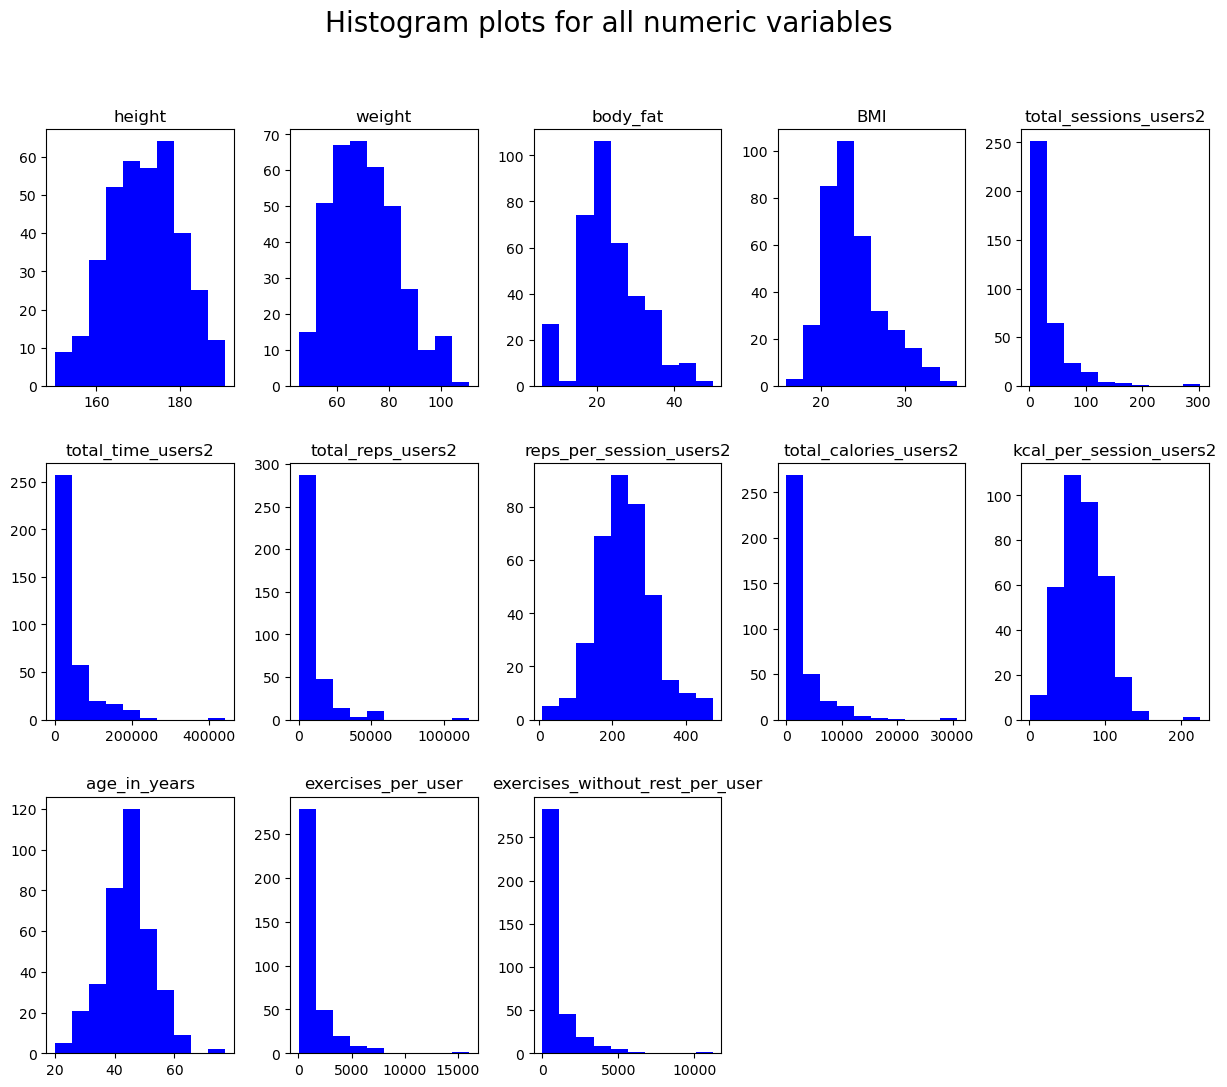

In [18]:
num_data.hist(layout=(3,5), color = 'blue', figsize = (15,12), grid = False)
plt.suptitle('Histogram plots for all numeric variables', fontsize = 20)

Text(0.5, 1.05, 'QQ plots for all numeric variables')

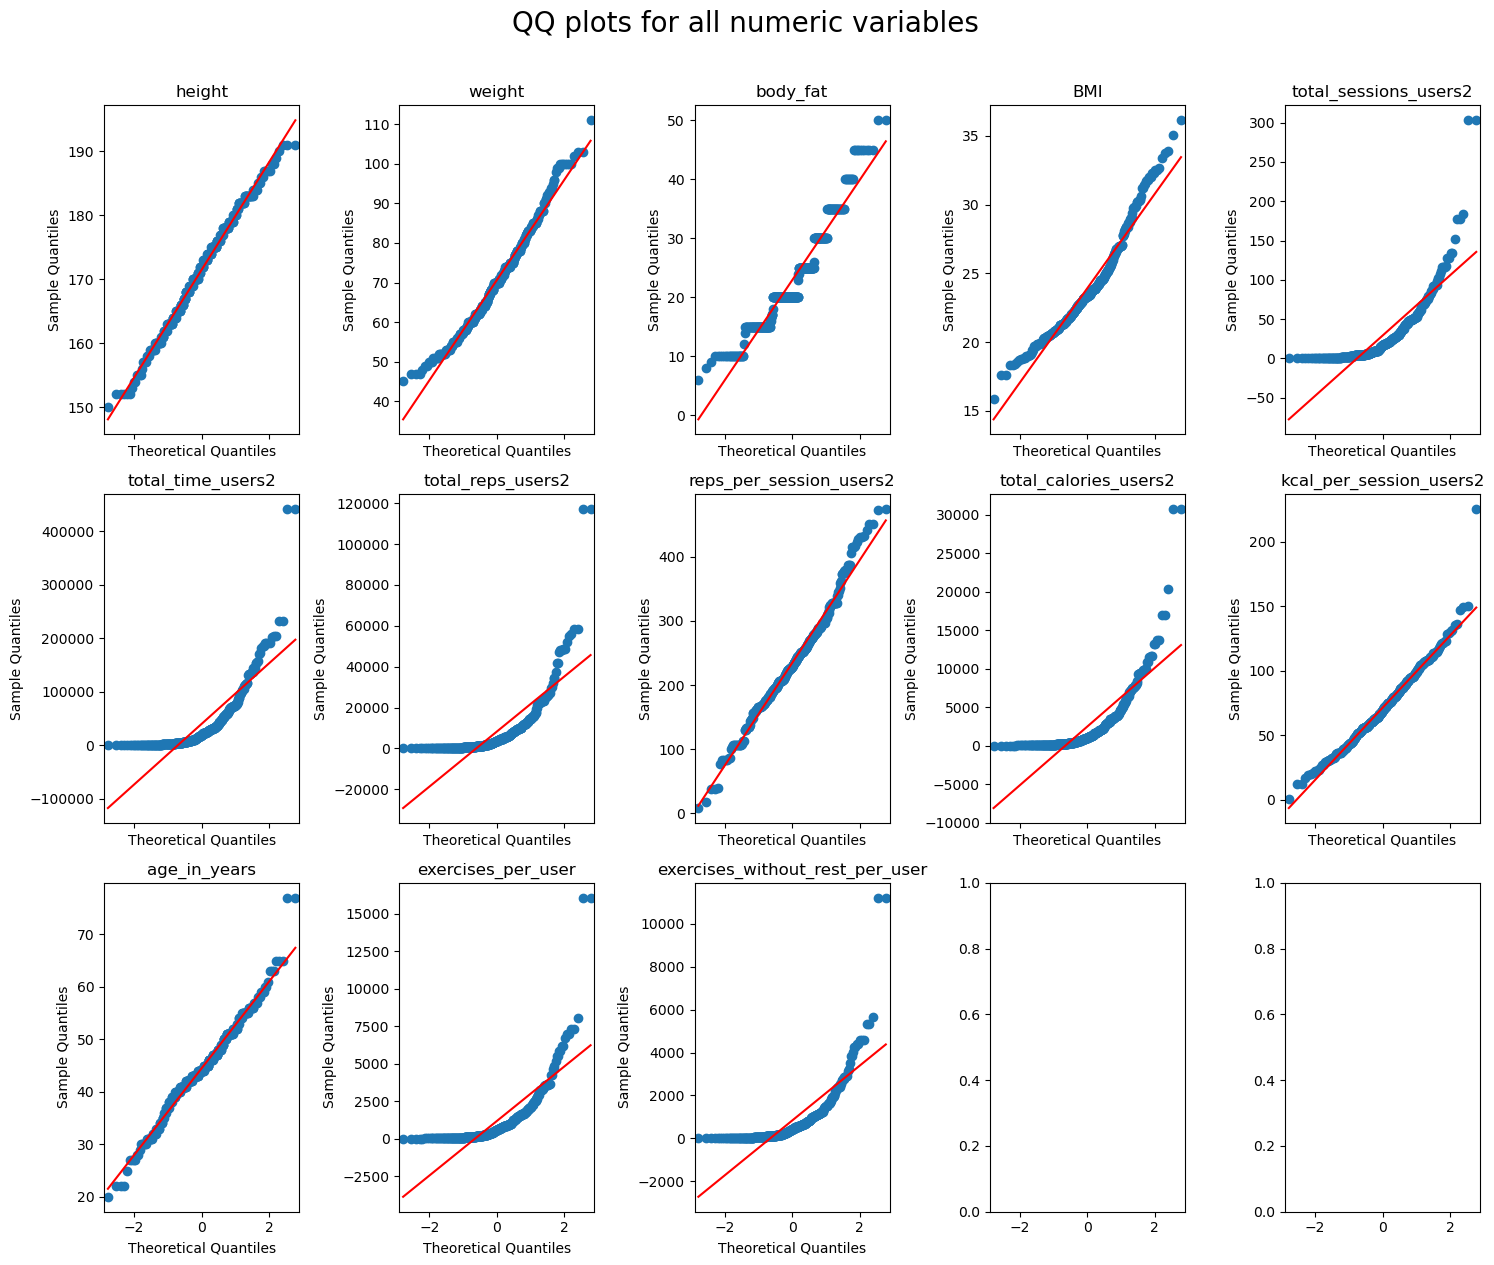

In [19]:
fig, axes = plt.subplots(ncols=5, nrows=3, sharex=True, figsize=(15, 12))
for k, ax in zip(num_data.columns, np.ravel(axes)):

        sm.qqplot(num_data[k], line='s', ax=ax)
        ax.set_title(f'{k}')
plt.tight_layout()
plt.suptitle('QQ plots for all numeric variables', fontsize = 20, y = 1.05)

### Count and density plots

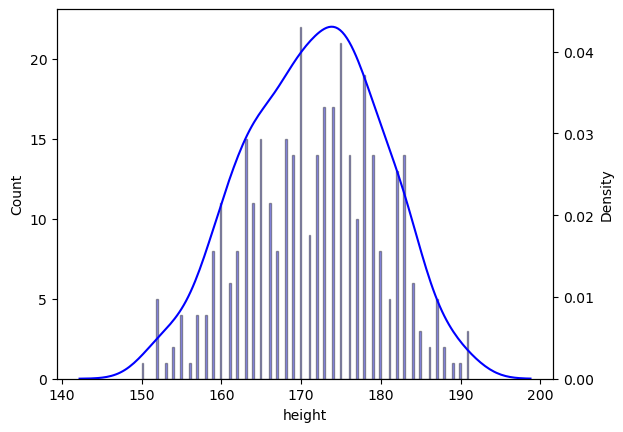

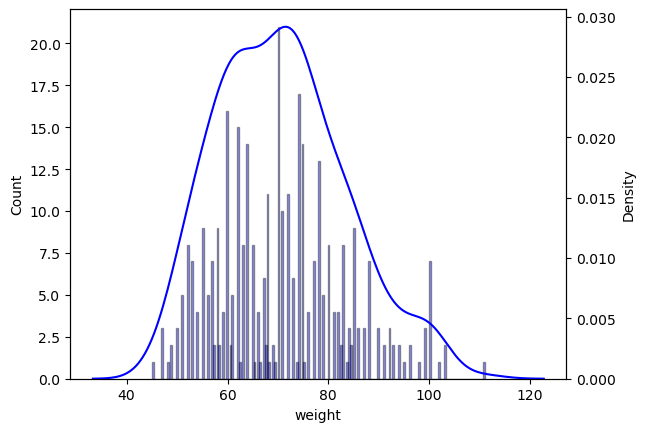

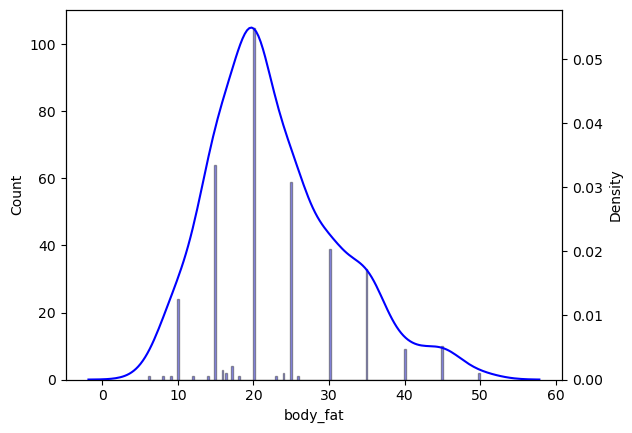

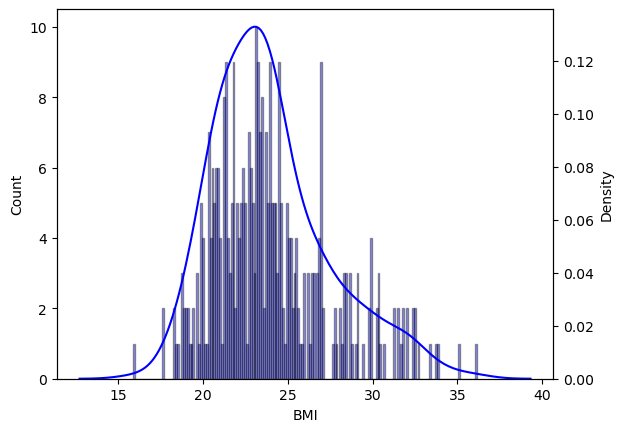

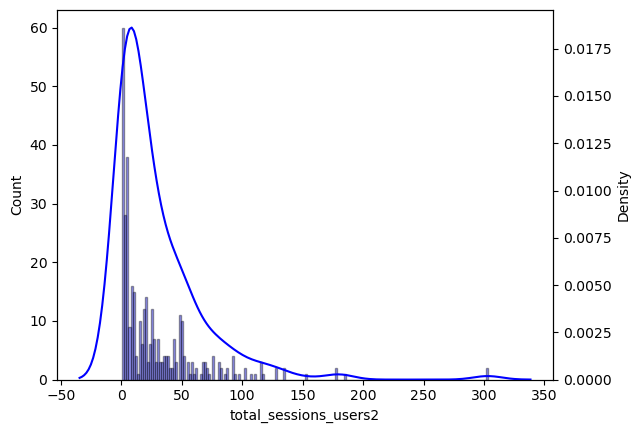

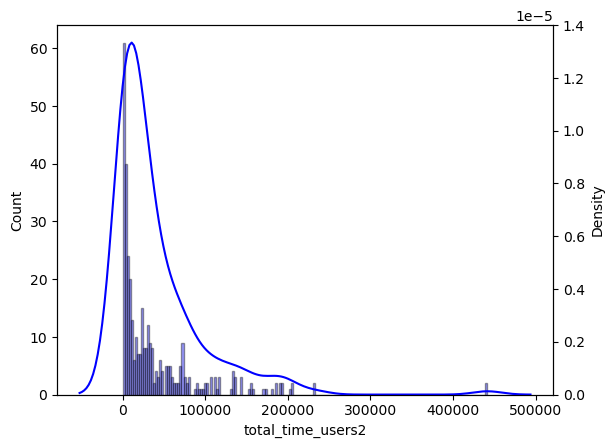

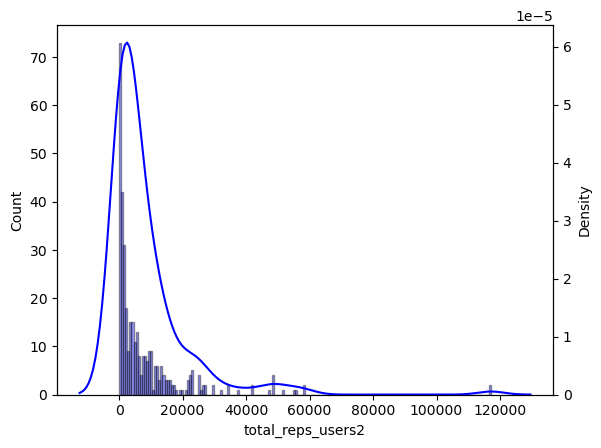

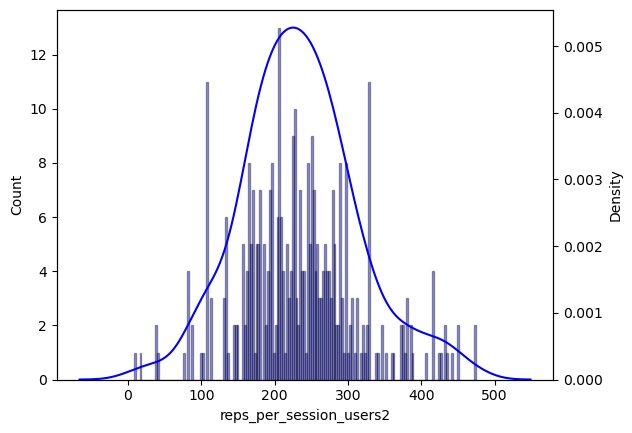

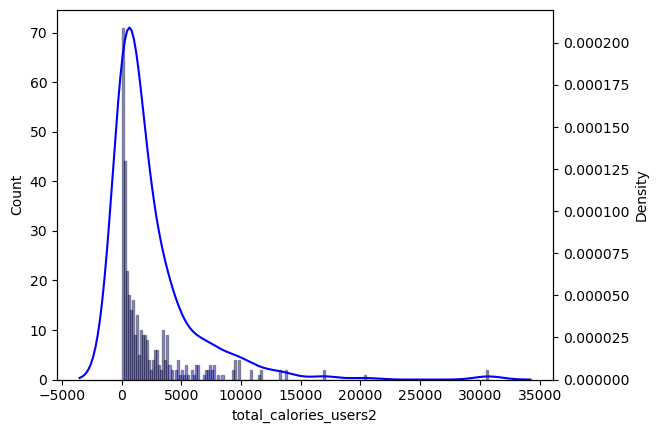

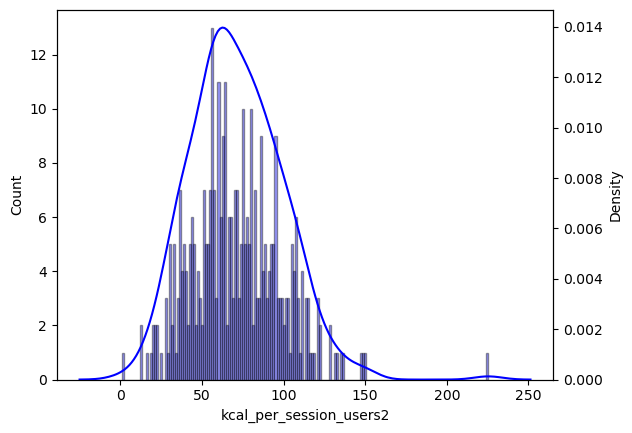

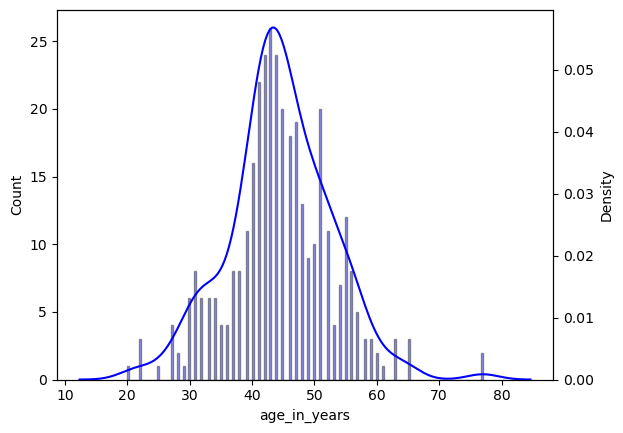

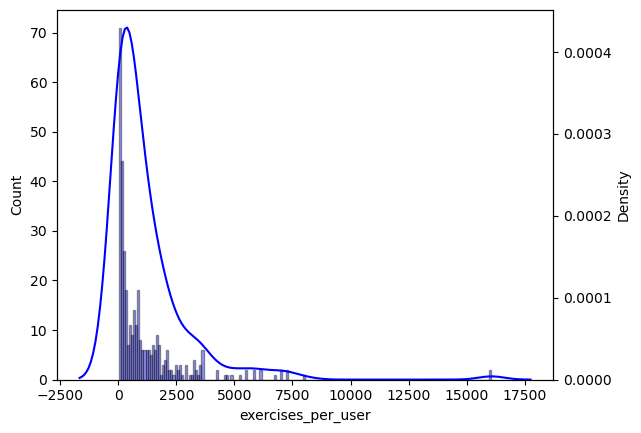

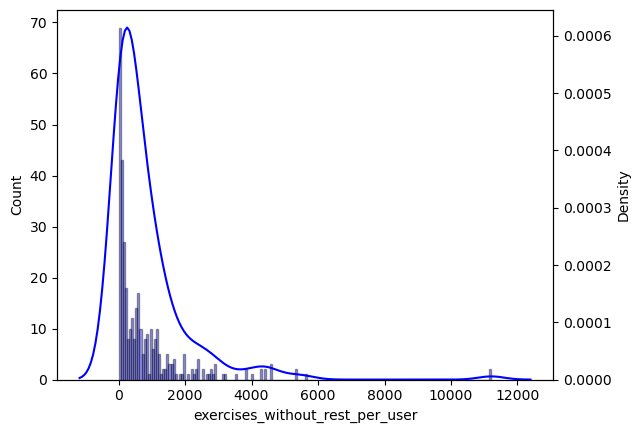

In [367]:
for i in range(len(num_data.columns)):
    density_count_plot(num_data, num_data.columns[i])

## Categorical data

### Demographic data

In [21]:
# freq table

gender = my_freq_table(df_questionnaire, var = 'gender', cumul_percent = True)
act_lvl = my_freq_table(df_questionnaire, var = 'activity_level', cumul_percent = True)
goal = my_freq_table(df_questionnaire, var = 'goal', cumul_percent = True)
body_type = my_freq_table(df_questionnaire, var = 'body_type', cumul_percent = True)
BMI_cate = my_freq_table(df_questionnaire, var = 'BMI_category', cumul_percent = True)
newsletter_subscription = my_freq_table(df_questionnaire, var = 'newsletter_subscription', cumul_percent = True)
notifications_setting = my_freq_table(df_questionnaire, var = 'notifications_setting', cumul_percent = True)
training_days_setting = my_freq_table(df_questionnaire, var = 'training_days_setting', cumul_percent = True)

empty_row = pd.DataFrame([''])
freq_cat_together = pd.concat([gender,empty_row, act_lvl,empty_row, goal,empty_row,
                               body_type,empty_row, BMI_cate, 
                               empty_row, newsletter_subscription, empty_row,
                               notifications_setting, empty_row,
                               training_days_setting], axis = 0)
freq_cat_together = freq_cat_together.reset_index()
freq_cat_together.insert(0, 'Variable', value=['' for i in range(freq_cat_together.shape[0])])
freq_cat_together = freq_cat_together.iloc[: , :-1]
freq_cat_together.loc[-1] = ['Gender', '', '','','']  # adding a row
freq_cat_together.index = freq_cat_together.index + 1  # shifting index
freq_cat_together = freq_cat_together.sort_index() 
freq_cat_together.loc[4] =  ['Activity_level', '', '', '', '']
freq_cat_together.loc[9] =  ['Goal', '', '', '', '']
freq_cat_together.loc[14] =  ['Body_type', '', '', '', '']
freq_cat_together.loc[19] =  ['BMI_category', '', '', '', '']
freq_cat_together.loc[25] =  ['Newsletter_subscription', '', '', '', '']
freq_cat_together.loc[29] =  ['Notifications_setting', '', '', '', '']
freq_cat_together.loc[33] =  ['Training_days_setting', '', '', '', '']
freq_cat_together.rename(columns = {'index': 'factors'}, inplace = True)
freq_cat_together.set_index(['Variable', 'factors'], inplace=True)
freq_cat_together


Frequency Percent Cumulative Percent
Variable                factors                                         
Gender                                                                  
                        female         143.00  39.29%             39.29%
                        male           221.00  60.71%             100.0%
                        Total          364.00  100.0%                  -
Activity_level                                                          
                        active         212.00  58.24%             58.24%
                        sedentary      102.00  28.02%             86.26%
                        very active     50.00  13.74%             100.0%
                        Total          364.00  100.0%                  -
Goal                                                                    
                        antiaging       66.00  18.13%             18.13%
                        gain           166.00   45.6%             63.74%
                        lose           132.00  36.26%             100.0%
                        Total          364.00  100.0%                  -
Body_type                                                               
                        mid            176.00  48.35%             48.35%
                        strong          33.00   9.07%             57.42%
                        thin           155.00  42.58%             100.0%
                        Total          364.00  100.0%                  -
BMI_category                                                            
                        Normal         252.00  69.23%             69.23%
                        Obesity         26.00   7.14%             76.37%
                        Overweight      80.00  21.98%             98.35%
                        Underweight      6.00   1.65%             100.0%
                        Total          364.00  100.0%                  -
Newsletter_subscription                                                 
                        False           22.00   6.04%              6.04%
                        True           342.00  93.96%             100.0%
                        Total          364.00  100.0%                  -
Notifications_setting                                                   
                        False            4.00    1.1%               1.1%
                        True           360.00   98.9%             100.0%
                        Total          364.00  100.0%                  -
Training_days_setting                                                   
                        True            12.00    3.3%               3.3%
                        2.0             23.00   6.32%              9.62%
                        3.0            150.00  41.21%             50.82%
                        4.0             86.00  23.63%             74.45%
                        5.0             73.00  20.05%             94.51%
                        6.0              8.00    2.2%              96.7%
                        7.0             12.00    3.3%             100.0%
                        Total          364.00  100.0%                  -

In [22]:
cat_data_demographics = df_questionnaire.loc[:, ['gender', 'activity_level', 'goal',
                                                 'body_type', 'BMI_category',
                                                 'newsletter_subscription',
                                                 'notifications_setting', 
                                                 'training_days_setting']]

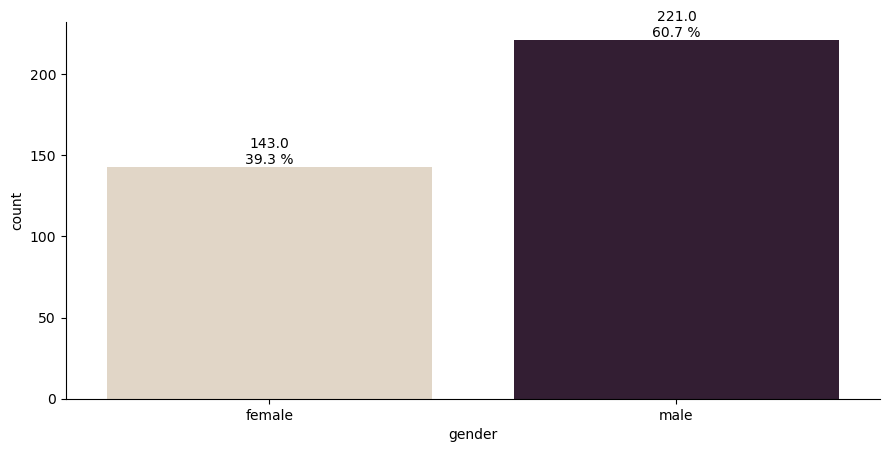

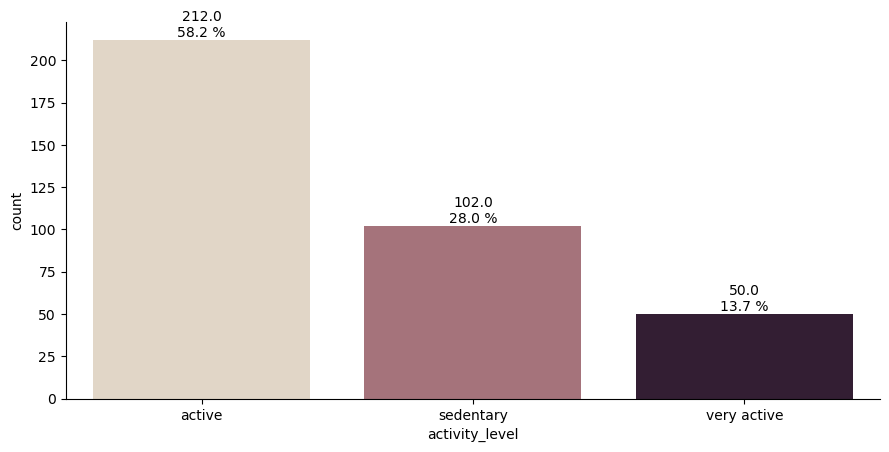

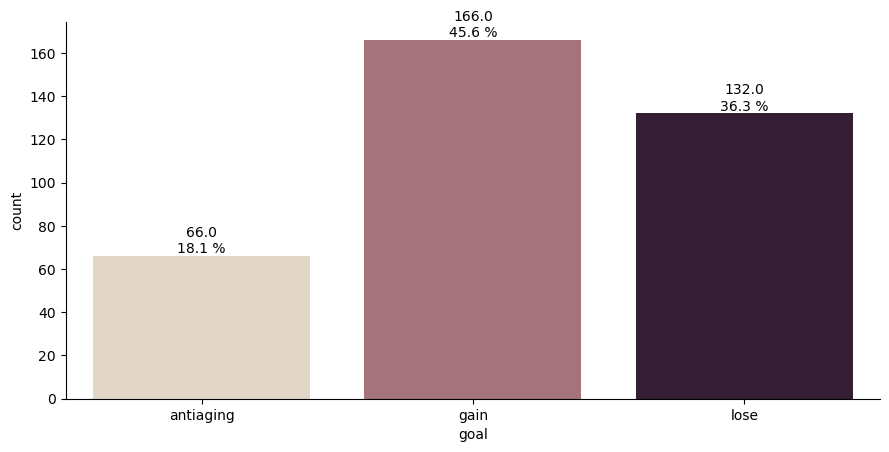

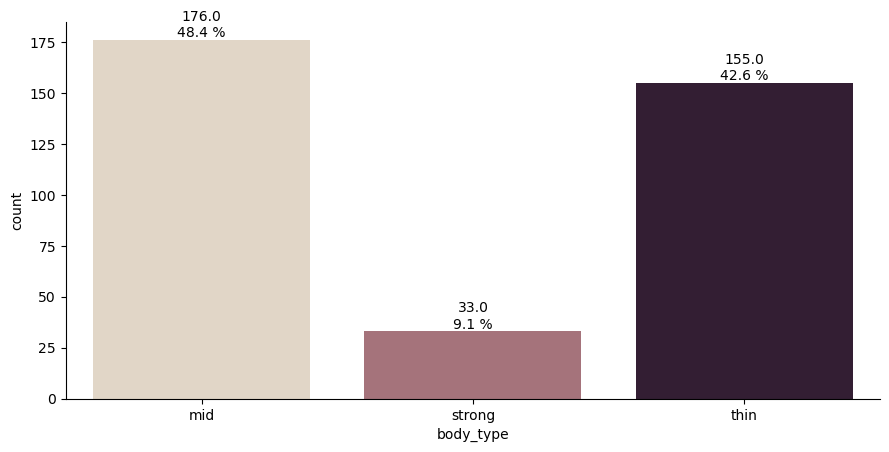

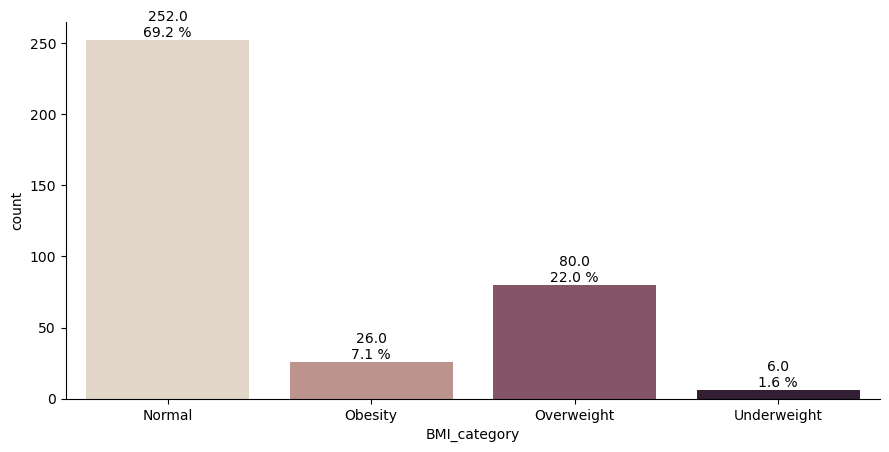

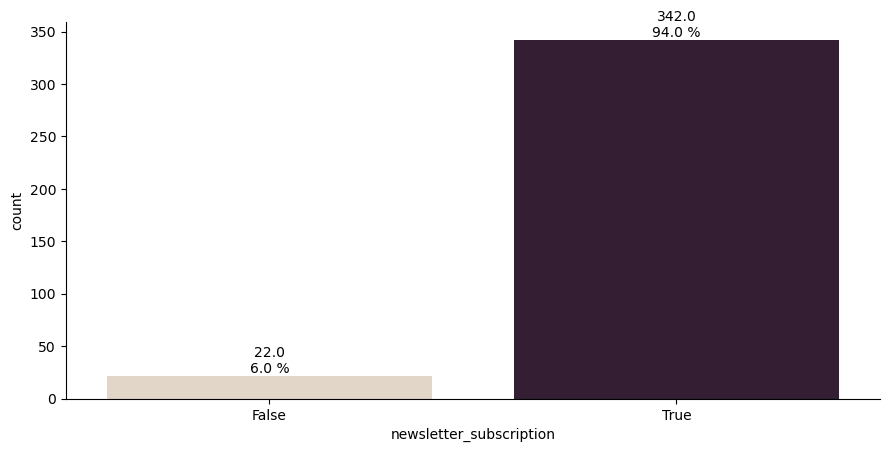

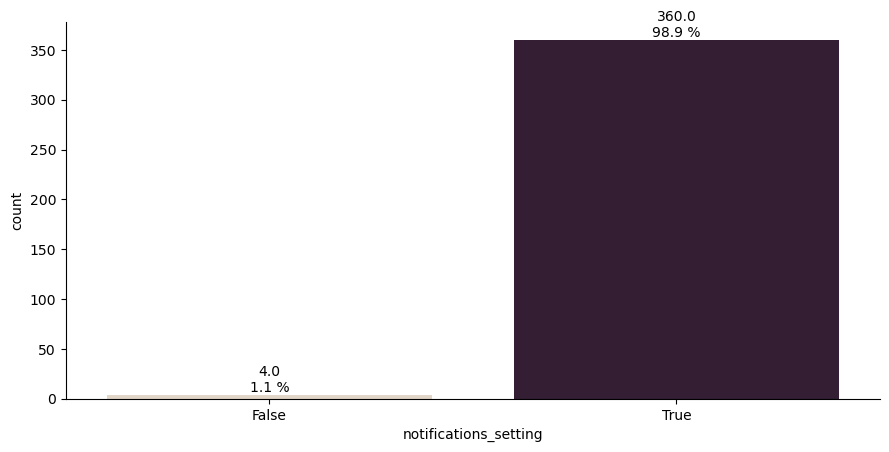

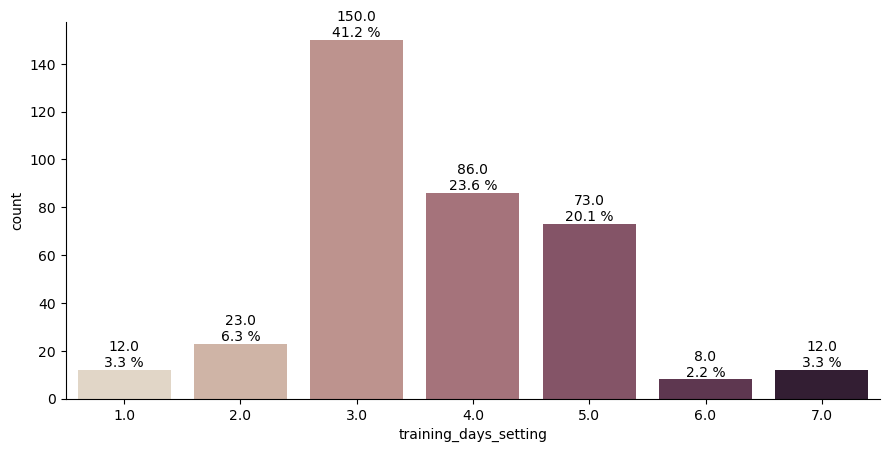

In [370]:
for i in range(len(cat_data_demographics.columns)):
    count_plot(cat_data_demographics, cat_data_demographics.columns[i])

### Questionnaire data

In [24]:
q1 = my_freq_table(df_questionnaire, var = df_questionnaire.columns[0], cumul_percent = True)
q2 = my_freq_table(df_questionnaire, var = df_questionnaire.columns[1], cumul_percent = True)
q3 = my_freq_table(df_questionnaire, var = df_questionnaire.columns[2], cumul_percent = True)
q4 = my_freq_table(df_questionnaire, var = df_questionnaire.columns[3], cumul_percent = True)
q5 = my_freq_table(df_questionnaire, var = df_questionnaire.columns[4], cumul_percent = True)
q6 = my_freq_table(df_questionnaire, var = df_questionnaire.columns[5], cumul_percent = True)
q7 = my_freq_table(df_questionnaire, var = df_questionnaire.columns[6], cumul_percent = True)
q8 = my_freq_table(df_questionnaire, var = df_questionnaire.columns[7], cumul_percent = True)
q9 = my_freq_table(df_questionnaire, var = df_questionnaire.columns[8], cumul_percent = True)
q10 = my_freq_table(df_questionnaire, var = df_questionnaire.columns[9], cumul_percent = True)
q11 = my_freq_table(df_questionnaire, var = df_questionnaire.columns[10], cumul_percent = True)
q12 = my_freq_table(df_questionnaire, var = df_questionnaire.columns[11], cumul_percent = True)
q13 = my_freq_table(df_questionnaire, var = df_questionnaire.columns[12], cumul_percent = True)
q14 = my_freq_table(df_questionnaire, var = df_questionnaire.columns[13], cumul_percent = True)
q15 = my_freq_table(df_questionnaire, var = df_questionnaire.columns[14], cumul_percent = True)
q16 = my_freq_table(df_questionnaire, var = df_questionnaire.columns[15], cumul_percent = True)

In [25]:
pd.set_option('display.max_rows', None)
empty_row = pd.DataFrame([''])
freq_cat_together = pd.concat([q1, empty_row, q2, empty_row, q3, empty_row,
                               q4, empty_row, q5, empty_row, q6, empty_row,
                               q7, empty_row, q8, empty_row, q9, empty_row,
                               q10, empty_row, q11, empty_row, q12, empty_row,
                               q13, empty_row, q14, empty_row, q15, empty_row, q16], axis = 0)
freq_cat_together = freq_cat_together.reset_index()
freq_cat_together.insert(0, 'Variable', value=['' for i in range(freq_cat_together.shape[0])])
freq_cat_together = freq_cat_together.iloc[: , :-1]
freq_cat_together.loc[-1] = ['Q1', '', '','','']  # adding a row
freq_cat_together.index = freq_cat_together.index + 1  # shifting index
freq_cat_together = freq_cat_together.sort_index() 
freq_cat_together.loc[7] =  ['Q2', '', '', '', '']
freq_cat_together.loc[13] =  ['Q3', '', '', '', '']
freq_cat_together.loc[20] =  ['Q4', '', '', '', '']
freq_cat_together.loc[27] =  ['Q5', '', '', '', '']
freq_cat_together.loc[34] =  ['Q6', '', '', '', '']
freq_cat_together.loc[41] =  ['Q7', '', '', '', '']
freq_cat_together.loc[48] =  ['Q8', '', '', '', '']
freq_cat_together.loc[55] =  ['Q9', '', '', '', '']
freq_cat_together.loc[61] =  ['Q10', '', '', '', '']
freq_cat_together.loc[68] =  ['Q11', '', '', '', '']
freq_cat_together.loc[74] =  ['Q12', '', '', '', '']
freq_cat_together.loc[81] =  ['Q13', '', '', '', '']
freq_cat_together.loc[88] =  ['Q14', '', '', '', '']
freq_cat_together.loc[95] =  ['Q15', '', '', '', '']
freq_cat_together.loc[102] =  ['Q16', '', '', '', '']
freq_cat_together.rename(columns = {'index': 'factors'}, inplace = True)
freq_cat_together.set_index(['Variable', 'factors'], inplace=True)
freq_cat_together


Frequency Percent Cumulative Percent
Variable factors                                     
Q1                                                   
         1           11.00   3.02%              3.02%
         2           14.00   3.85%              6.87%
         3           55.00  15.11%             21.98%
         4          137.00  37.64%             59.62%
         5          147.00  40.38%             100.0%
         Total      364.00  100.0%                  -
Q2                                                   
         2            8.00    2.2%               2.2%
         3           33.00   9.07%             11.26%
         4           91.00   25.0%             36.26%
         5          232.00  63.74%             100.0%
         Total      364.00  100.0%                  -
Q3                                                   
         1            4.00    1.1%               1.1%
         2           12.00    3.3%               4.4%
         3           46.00  12.64%             17.03%
         4          103.00   28.3%             45.33%
         5          199.00  54.67%             100.0%
         Total      364.00  100.0%                  -
Q4                                                   
         1            1.00   0.27%              0.27%
         2            6.00   1.65%              1.92%
         3           71.00  19.51%             21.43%
         4          121.00  33.24%             54.67%
         5          165.00  45.33%             100.0%
         Total      364.00  100.0%                  -
Q5                                                   
         1           11.00   3.02%              3.02%
         2           30.00   8.24%             11.26%
         3           94.00  25.82%             37.09%
         4          124.00  34.07%             71.15%
         5          105.00  28.85%             100.0%
         Total      364.00  100.0%                  -
Q6                                                   
         1           23.00   6.32%              6.32%
         2           27.00   7.42%             13.74%
         3           73.00  20.05%             33.79%
         4           91.00   25.0%             58.79%
         5          150.00  41.21%             100.0%
         Total      364.00  100.0%                  -
Q7                                                   
         1            3.00   0.82%              0.82%
         2           26.00   7.14%              7.97%
         3           70.00  19.23%              27.2%
         4          114.00  31.32%             58.52%
         5          151.00  41.48%             100.0%
         Total      364.00  100.0%                  -
Q8                                                   
         1            5.00   1.37%              1.37%
         2           19.00   5.22%              6.59%
         3           75.00   20.6%              27.2%
         4          120.00  32.97%             60.16%
         5          145.00  39.84%             100.0%
         Total      364.00  100.0%                  -
Q9                                                   
         2            1.00   0.27%              0.27%
         3           13.00   3.57%              3.85%
         4           58.00  15.93%             19.78%
         5          292.00  80.22%             100.0%
         Total      364.00  100.0%                  -
Q10                                                  
         1            5.00   1.37%              1.37%
         2           10.00   2.75%              4.12%
         3           52.00  14.29%             18.41%
         4          118.00  32.42%             50.82%
         5          179.00  49.18%             100.0%
         Total      364.00  100.0%                  -
Q11                                                  
         2            3.00   0.82%              0.82%
         3           30.00   8.24%              9.07%
         4          111.00  30.49%             39.56%
         5          2

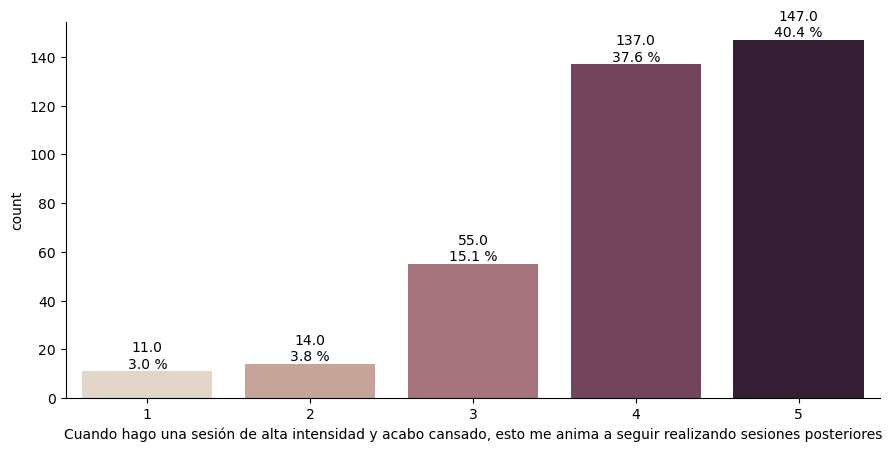

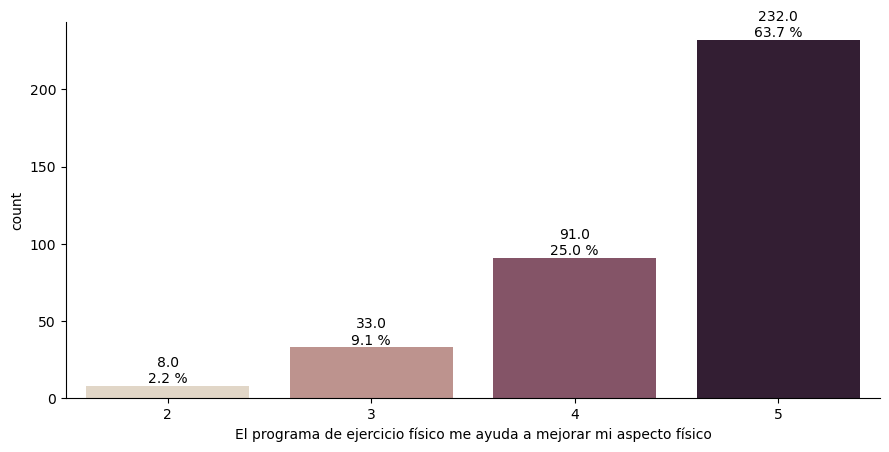

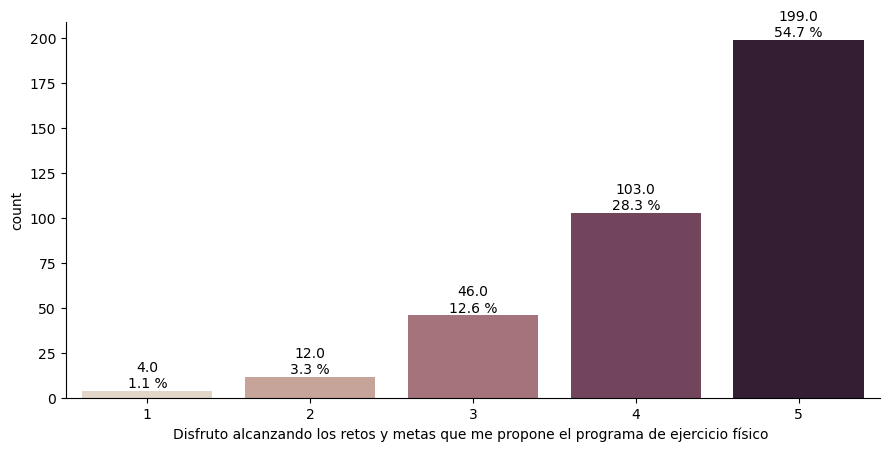

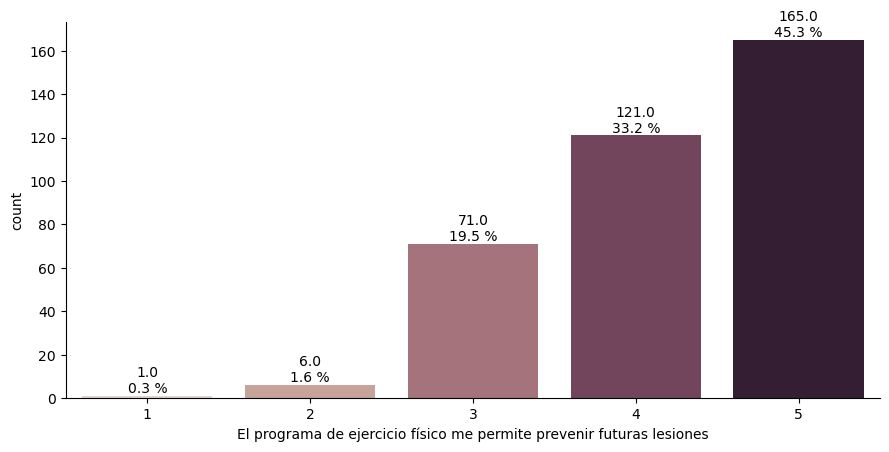

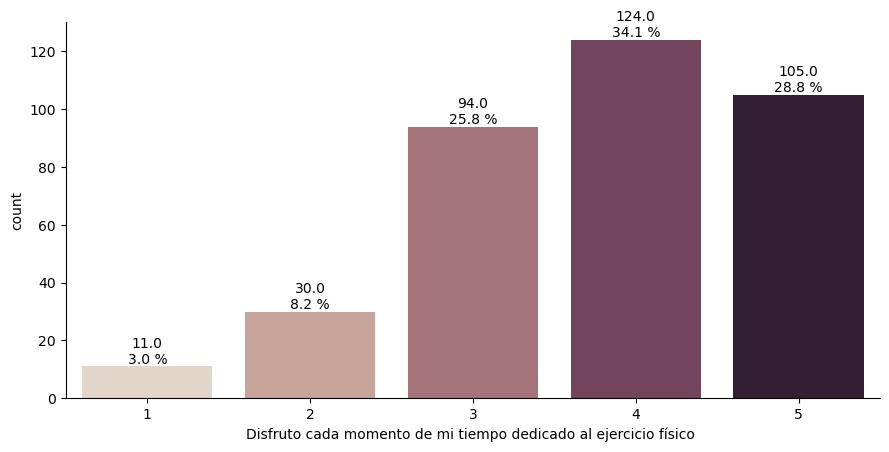

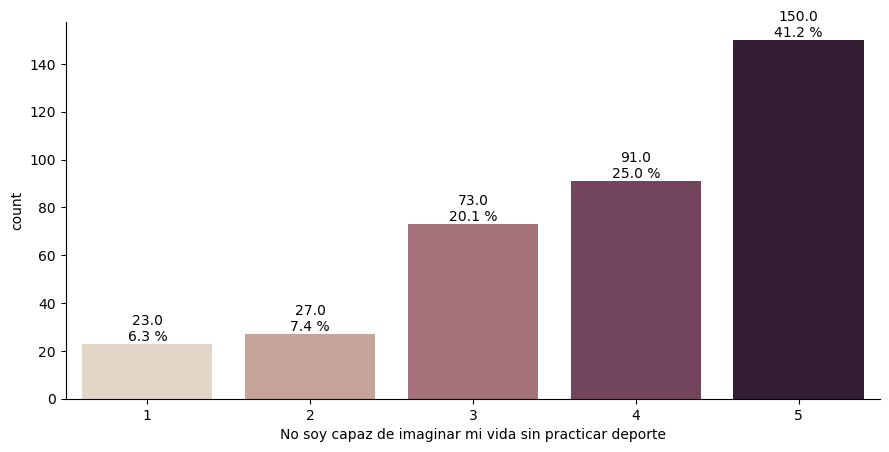

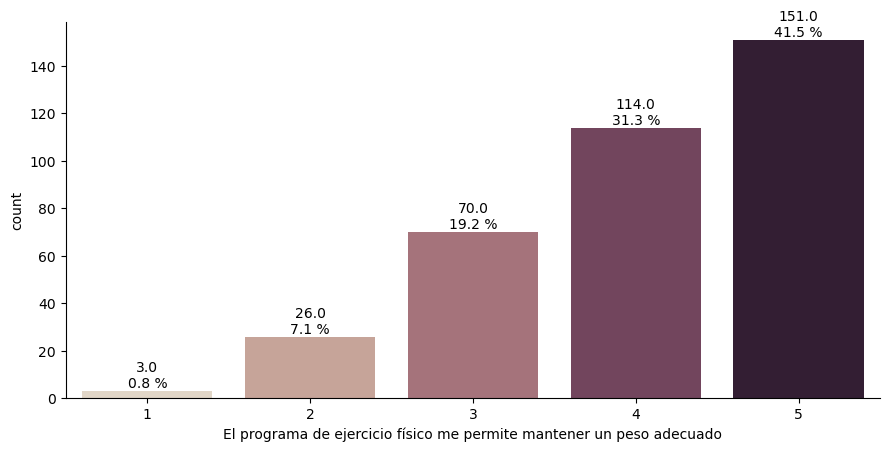

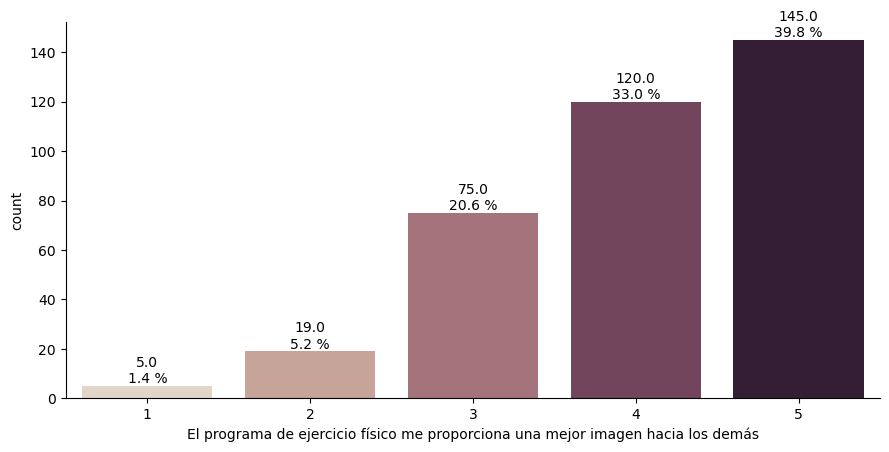

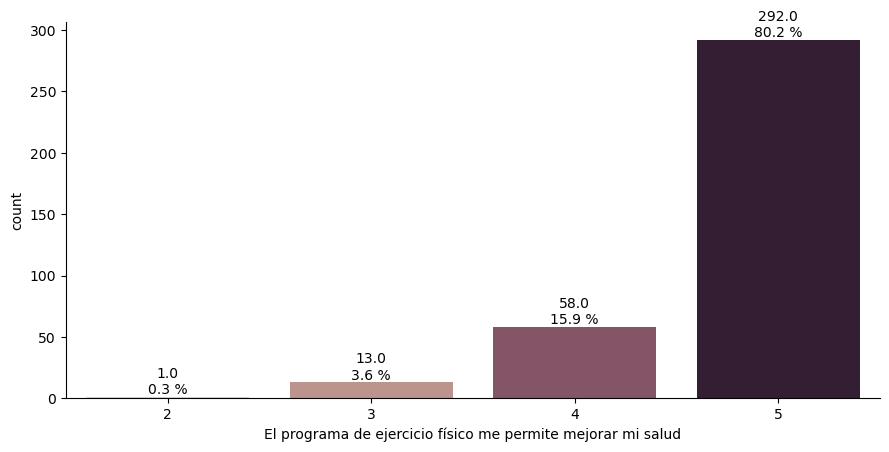

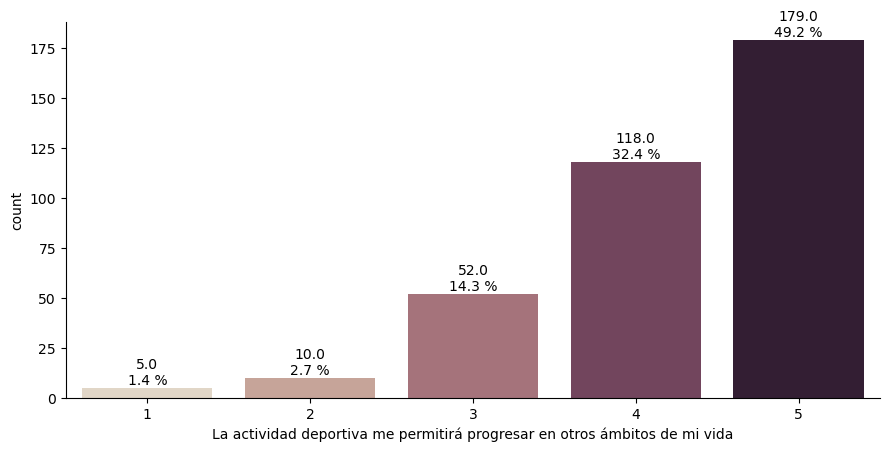

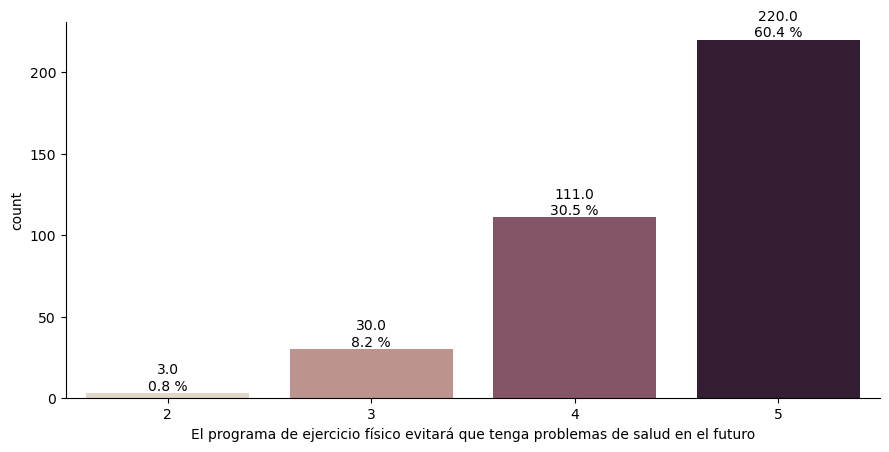

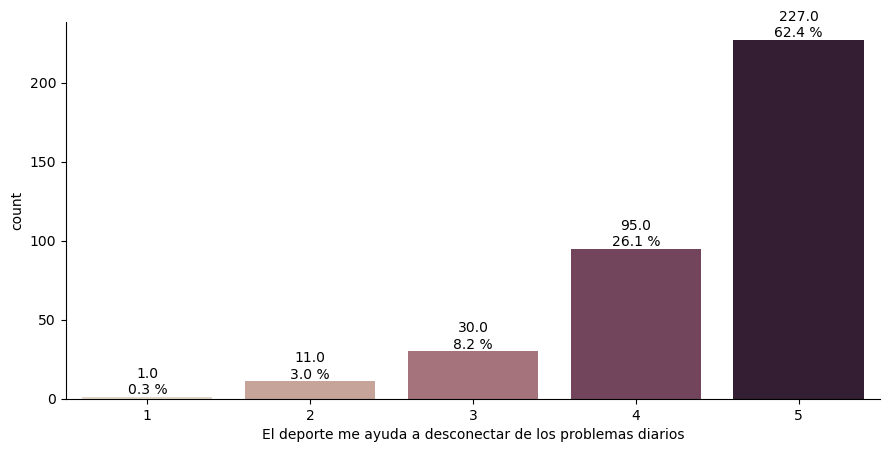

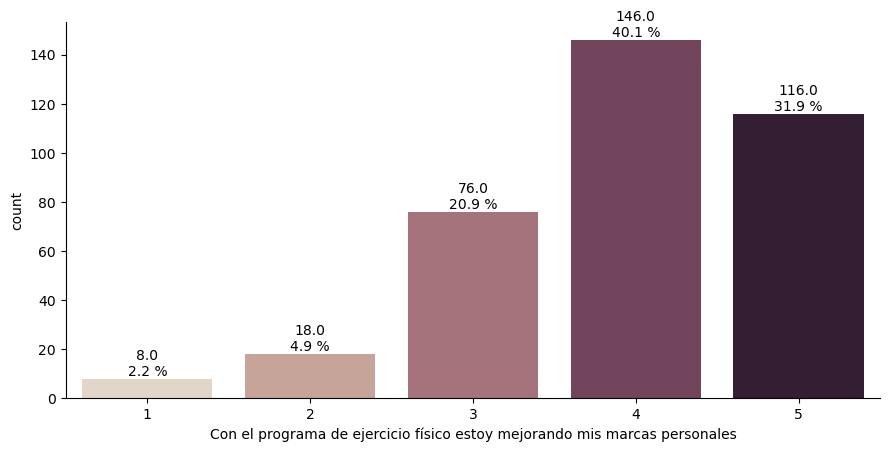

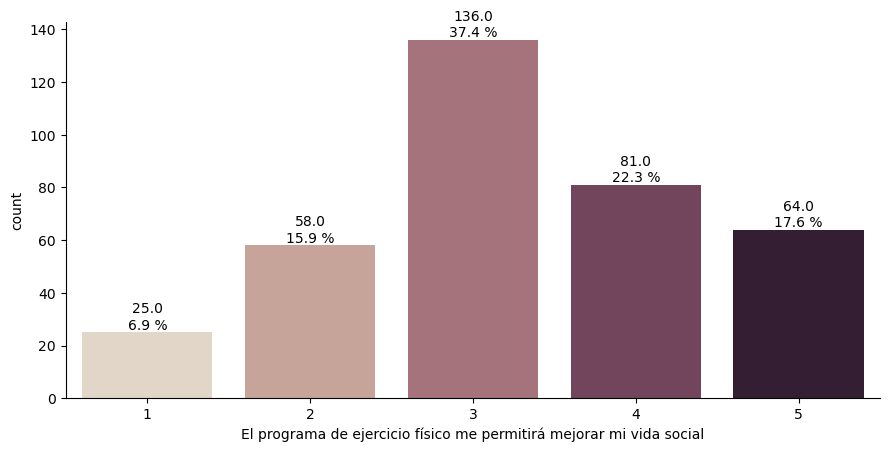

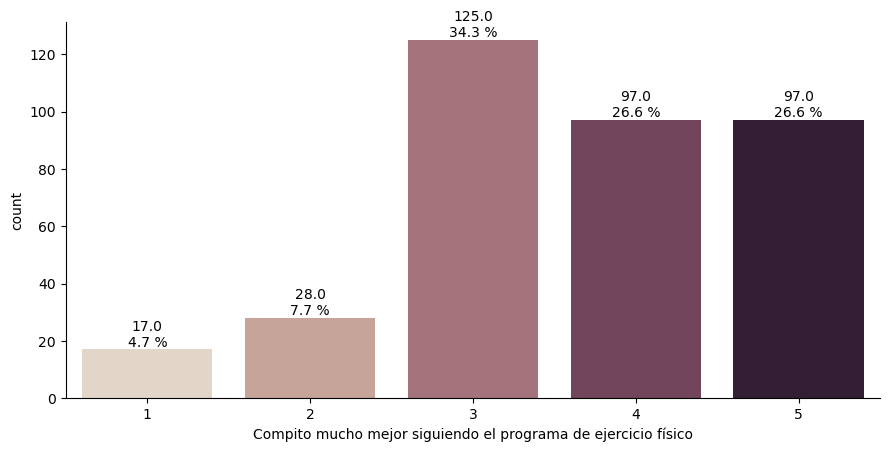

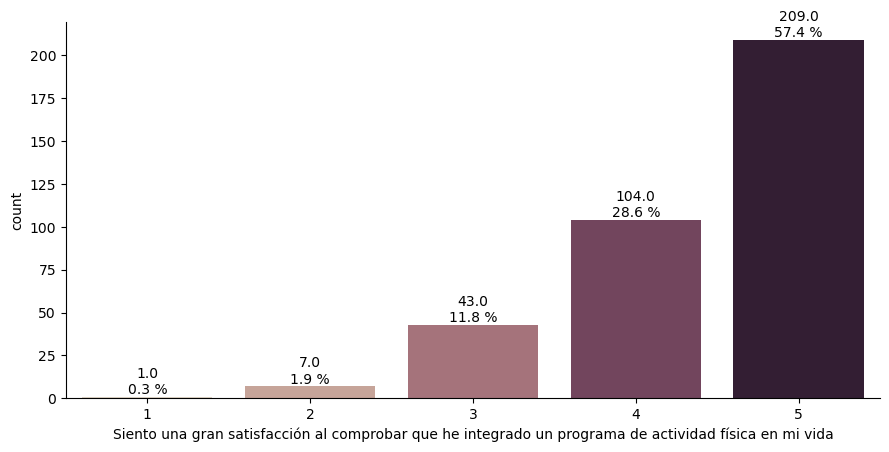

In [371]:
for i in range(16):
    count_plot(df_questionnaire, df_questionnaire.columns[i])

## Inferential analysis

In [27]:
from itertools import combinations
from statsmodels.sandbox.stats.multicomp import multipletests

In [28]:
# Kruskall Wallis and chi-square tests

def inf_analysis(df, var):
    levels = list(df[var].unique())
    if len(levels) == 5:
        
        q1_h_1 = df[df[var] == 1]['height']
        q1_h_2 = df[df[var] == 2]['height']
        q1_h_3 = df[df[var] == 3]['height']
        q1_h_4 = df[df[var] == 4]['height']
        q1_h_5 = df[df[var] == 5]['height']

        q1_w_1 = df[df[var] == 1]['weight']
        q1_w_2 = df[df[var] == 2]['weight']
        q1_w_3 = df[df[var] == 3]['weight']
        q1_w_4 = df[df[var] == 4]['weight']
        q1_w_5 = df[df[var] == 5]['weight']

        q1_bf_1 = df[df[var] == 1]['body_fat']
        q1_bf_2 = df[df[var] == 2]['body_fat']
        q1_bf_3 = df[df[var] == 3]['body_fat']
        q1_bf_4 = df[df[var] == 4]['body_fat']
        q1_bf_5 = df[df[var] == 5]['body_fat']

        q1_bmi_1 = df[df[var] == 1]['BMI']
        q1_bmi_2 = df[df[var] == 2]['BMI']
        q1_bmi_3 = df[df[var] == 3]['BMI']
        q1_bmi_4 = df[df[var] == 4]['BMI']
        q1_bmi_5 = df[df[var] == 5]['BMI']

        q1_ts_1 = df[df[var] == 1]['total_sessions_users2']
        q1_ts_2 = df[df[var] == 2]['total_sessions_users2']
        q1_ts_3 = df[df[var] == 3]['total_sessions_users2']
        q1_ts_4 = df[df[var] == 4]['total_sessions_users2']
        q1_ts_5 = df[df[var] == 5]['total_sessions_users2']

        q1_tr_1 = df[df[var] == 1]['total_sessions_users2']
        q1_tr_2 = df[df[var] == 2]['total_sessions_users2']
        q1_tr_3 = df[df[var] == 3]['total_sessions_users2']
        q1_tr_4 = df[df[var] == 4]['total_sessions_users2']
        q1_tr_5 = df[df[var] == 5]['total_sessions_users2']

        q1_tt_1 = df[df[var] == 1]['total_time_users2']
        q1_tt_2 = df[df[var] == 2]['total_time_users2']
        q1_tt_3 = df[df[var] == 3]['total_time_users2']
        q1_tt_4 = df[df[var] == 4]['total_time_users2']
        q1_tt_5 = df[df[var] == 5]['total_time_users2']

        q1_rps_1 = df[df[var] == 1]['reps_per_session_users2']
        q1_rps_2 = df[df[var] == 2]['reps_per_session_users2']
        q1_rps_3 = df[df[var] == 3]['reps_per_session_users2']
        q1_rps_4 = df[df[var] == 4]['reps_per_session_users2']
        q1_rps_5 = df[df[var] == 5]['reps_per_session_users2']

        q1_tc_1 = df[df[var] == 1]['total_calories_users2']
        q1_tc_2 = df[df[var] == 2]['total_calories_users2']
        q1_tc_3 = df[df[var] == 3]['total_calories_users2']
        q1_tc_4 = df[df[var] == 4]['total_calories_users2']
        q1_tc_5 = df[df[var] == 5]['total_calories_users2']

        q1_kpc_1 = df[df[var] == 1]['kcal_per_session_users2']
        q1_kpc_2 = df[df[var] == 2]['kcal_per_session_users2']
        q1_kpc_3 = df[df[var] == 3]['kcal_per_session_users2']
        q1_kpc_4 = df[df[var] == 4]['kcal_per_session_users2']
        q1_kpc_5 = df[df[var] == 5]['kcal_per_session_users2']

        q1_a_1 = df[df[var] == 1]['age_in_years']
        q1_a_2 = df[df[var] == 2]['age_in_years']
        q1_a_3 = df[df[var] == 3]['age_in_years']
        q1_a_4 = df[df[var] == 4]['age_in_years']
        q1_a_5 = df[df[var] == 5]['age_in_years']

        q1_epu_1 = df[df[var] == 1]['exercises_per_user']
        q1_epu_2 = df[df[var] == 2]['exercises_per_user']
        q1_epu_3 = df[df[var] == 3]['exercises_per_user']
        q1_epu_4 = df[df[var] == 4]['exercises_per_user']
        q1_epu_5 = df[df[var] == 5]['exercises_per_user']

        q1_ewrpu_1 = df[df[var] == 1]['exercises_without_rest_per_user']
        q1_ewrpu_2 = df[df[var] == 2]['exercises_without_rest_per_user']
        q1_ewrpu_3 = df[df[var] == 3]['exercises_without_rest_per_user']
        q1_ewrpu_4 = df[df[var] == 4]['exercises_without_rest_per_user']
        q1_ewrpu_5 = df[df[var] == 5]['exercises_without_rest_per_user']

        data_q1_k_w = {
            'Statistics': [stats.kruskal(q1_h_1, q1_h_2, q1_h_3, q1_h_4, q1_h_5)[0],
                           stats.kruskal(q1_w_1, q1_w_2, q1_w_3, q1_w_4, q1_w_5)[0],
                           stats.kruskal(q1_bf_1, q1_bf_2, q1_bf_3, q1_bf_4, q1_bf_5)[0],
                           stats.kruskal(q1_bmi_1, q1_bmi_2, q1_bmi_3, q1_bmi_4, q1_bmi_5)[0],
                           stats.kruskal(q1_ts_1, q1_ts_2, q1_ts_3, q1_ts_4, q1_ts_5)[0],
                           stats.kruskal(q1_tr_1, q1_tr_2, q1_tr_3, q1_tr_4, q1_tr_5)[0], 
                           stats.kruskal(q1_tt_1, q1_tt_2, q1_tt_3, q1_tt_4, q1_tt_5)[0],
                           stats.kruskal(q1_rps_1, q1_rps_2, q1_rps_3, q1_rps_4, q1_rps_5)[0],
                           stats.kruskal(q1_tc_1, q1_tc_2, q1_tc_3, q1_tc_4, q1_tc_5)[0],
                           stats.kruskal(q1_kpc_1, q1_kpc_2, q1_kpc_3, q1_kpc_4, q1_kpc_5)[0],
                           stats.kruskal(q1_a_1, q1_a_2, q1_a_3, q1_a_4, q1_a_5)[0],
                           stats.kruskal(q1_epu_1, q1_epu_2, q1_epu_3, q1_epu_4, q1_epu_5)[0],
                           stats.kruskal(q1_ewrpu_1, q1_ewrpu_2, q1_ewrpu_3, q1_ewrpu_4, q1_ewrpu_5)[0]],
            'p-value': [stats.kruskal(q1_h_1, q1_h_2, q1_h_3, q1_h_4, q1_h_5)[1],
                        stats.kruskal(q1_w_1, q1_w_2, q1_w_3, q1_w_4, q1_w_5)[1],
                        stats.kruskal(q1_bf_1, q1_bf_2, q1_bf_3, q1_bf_4, q1_bf_5)[1],
                        stats.kruskal(q1_bmi_1, q1_bmi_2, q1_bmi_3, q1_bmi_4, q1_bmi_5)[1],
                        stats.kruskal(q1_ts_1, q1_ts_2, q1_ts_3, q1_ts_4, q1_ts_5)[1],
                        stats.kruskal(q1_tr_1, q1_tr_2, q1_tr_3, q1_tr_4, q1_tr_5)[1], 
                        stats.kruskal(q1_tt_1, q1_tt_2, q1_tt_3, q1_tt_4, q1_tt_5)[1],
                        stats.kruskal(q1_rps_1, q1_rps_2, q1_rps_3, q1_rps_4, q1_rps_5)[1],
                        stats.kruskal(q1_tc_1, q1_tc_2, q1_tc_3, q1_tc_4, q1_tc_5)[1],
                        stats.kruskal(q1_kpc_1, q1_kpc_2, q1_kpc_3, q1_kpc_4, q1_kpc_5)[1],
                        stats.kruskal(q1_a_1, q1_a_2, q1_a_3, q1_a_4, q1_a_5)[1],
                        stats.kruskal(q1_epu_1, q1_epu_2, q1_epu_3, q1_epu_4, q1_epu_5)[1],
                        stats.kruskal(q1_ewrpu_1, q1_ewrpu_2, q1_ewrpu_3, q1_ewrpu_4, q1_ewrpu_5)[1]]
        }

        q1_kruskal_wallis = pd.DataFrame(data_q1_k_w)
        row_names_q1_k_w = ['Height', 'Weight', 'Body fat', 'BMI', 'Total sessions',
                                'Total reps', 'Total time', 'Reps per session', 'Total calories',
                                'Calories per session', 'Age',
                                'Exercises per user', 'Exercises without rest per user']
        q1_kruskal_wallis.set_index(pd.Index(row_names_q1_k_w), inplace = True)
    
    elif len(levels) == 4:
        
        q1_h_2 = df[df[var] == 2]['height']
        q1_h_3 = df[df[var] == 3]['height']
        q1_h_4 = df[df[var] == 4]['height']
        q1_h_5 = df[df[var] == 5]['height']

        q1_w_2 = df[df[var] == 2]['weight']
        q1_w_3 = df[df[var] == 3]['weight']
        q1_w_4 = df[df[var] == 4]['weight']
        q1_w_5 = df[df[var] == 5]['weight']
        
        q1_bf_2 = df[df[var] == 2]['body_fat']
        q1_bf_3 = df[df[var] == 3]['body_fat']
        q1_bf_4 = df[df[var] == 4]['body_fat']
        q1_bf_5 = df[df[var] == 5]['body_fat']

        q1_bmi_2 = df[df[var] == 2]['BMI']
        q1_bmi_3 = df[df[var] == 3]['BMI']
        q1_bmi_4 = df[df[var] == 4]['BMI']
        q1_bmi_5 = df[df[var] == 5]['BMI']

        q1_ts_2 = df[df[var] == 2]['total_sessions_users2']
        q1_ts_3 = df[df[var] == 3]['total_sessions_users2']
        q1_ts_4 = df[df[var] == 4]['total_sessions_users2']
        q1_ts_5 = df[df[var] == 5]['total_sessions_users2']

        q1_tr_2 = df[df[var] == 2]['total_sessions_users2']
        q1_tr_3 = df[df[var] == 3]['total_sessions_users2']
        q1_tr_4 = df[df[var] == 4]['total_sessions_users2']
        q1_tr_5 = df[df[var] == 5]['total_sessions_users2']

        q1_tt_2 = df[df[var] == 2]['total_time_users2']
        q1_tt_3 = df[df[var] == 3]['total_time_users2']
        q1_tt_4 = df[df[var] == 4]['total_time_users2']
        q1_tt_5 = df[df[var] == 5]['total_time_users2']

        q1_rps_2 = df[df[var] == 2]['reps_per_session_users2']
        q1_rps_3 = df[df[var] == 3]['reps_per_session_users2']
        q1_rps_4 = df[df[var] == 4]['reps_per_session_users2']
        q1_rps_5 = df[df[var] == 5]['reps_per_session_users2']

        q1_tc_2 = df[df[var] == 2]['total_calories_users2']
        q1_tc_3 = df[df[var] == 3]['total_calories_users2']
        q1_tc_4 = df[df[var] == 4]['total_calories_users2']
        q1_tc_5 = df[df[var] == 5]['total_calories_users2']

        q1_kpc_2 = df[df[var] == 2]['kcal_per_session_users2']
        q1_kpc_3 = df[df[var] == 3]['kcal_per_session_users2']
        q1_kpc_4 = df[df[var] == 4]['kcal_per_session_users2']
        q1_kpc_5 = df[df[var] == 5]['kcal_per_session_users2']

        q1_a_2 = df[df[var] == 2]['age_in_years']
        q1_a_3 = df[df[var] == 3]['age_in_years']
        q1_a_4 = df[df[var] == 4]['age_in_years']
        q1_a_5 = df[df[var] == 5]['age_in_years']

        q1_epu_2 = df[df[var] == 2]['exercises_per_user']
        q1_epu_3 = df[df[var] == 3]['exercises_per_user']
        q1_epu_4 = df[df[var] == 4]['exercises_per_user']
        q1_epu_5 = df[df[var] == 5]['exercises_per_user']

        q1_ewrpu_2 = df[df[var] == 2]['exercises_without_rest_per_user']
        q1_ewrpu_3 = df[df[var] == 3]['exercises_without_rest_per_user']
        q1_ewrpu_4 = df[df[var] == 4]['exercises_without_rest_per_user']
        q1_ewrpu_5 = df[df[var] == 5]['exercises_without_rest_per_user']

        data_q1_k_w = {
            'Statistics': [stats.kruskal(q1_h_2, q1_h_3, q1_h_4, q1_h_5)[0],
                           stats.kruskal(q1_w_2, q1_w_3, q1_w_4, q1_w_5)[0],
                           stats.kruskal(q1_bf_2, q1_bf_3, q1_bf_4, q1_bf_5)[0],
                           stats.kruskal(q1_bmi_2, q1_bmi_3, q1_bmi_4, q1_bmi_5)[0],
                           stats.kruskal(q1_ts_2, q1_ts_3, q1_ts_4, q1_ts_5)[0],
                           stats.kruskal(q1_tr_2, q1_tr_3, q1_tr_4, q1_tr_5)[0], 
                           stats.kruskal(q1_tt_2, q1_tt_3, q1_tt_4, q1_tt_5)[0],
                           stats.kruskal(q1_rps_2, q1_rps_3, q1_rps_4, q1_rps_5)[0],
                           stats.kruskal(q1_tc_2, q1_tc_3, q1_tc_4, q1_tc_5)[0],
                           stats.kruskal(q1_kpc_2, q1_kpc_3, q1_kpc_4, q1_kpc_5)[0],
                           stats.kruskal(q1_a_2, q1_a_3, q1_a_4, q1_a_5)[0],
                           stats.kruskal(q1_epu_2, q1_epu_3, q1_epu_4, q1_epu_5)[0],
                           stats.kruskal(q1_ewrpu_2, q1_ewrpu_3, q1_ewrpu_4, q1_ewrpu_5)[0]],
            'p-value': [stats.kruskal(q1_h_2, q1_h_3, q1_h_4, q1_h_5)[1],
                        stats.kruskal(q1_w_2, q1_w_3, q1_w_4, q1_w_5)[1],
                        stats.kruskal(q1_bf_2, q1_bf_3, q1_bf_4, q1_bf_5)[1],
                        stats.kruskal(q1_bmi_2, q1_bmi_3, q1_bmi_4, q1_bmi_5)[1],
                        stats.kruskal(q1_ts_2, q1_ts_3, q1_ts_4, q1_ts_5)[1],
                        stats.kruskal(q1_tr_2, q1_tr_3, q1_tr_4, q1_tr_5)[1], 
                        stats.kruskal(q1_tt_2, q1_tt_3, q1_tt_4, q1_tt_5)[1],
                        stats.kruskal(q1_rps_2, q1_rps_3, q1_rps_4, q1_rps_5)[1],
                        stats.kruskal(q1_tc_2, q1_tc_3, q1_tc_4, q1_tc_5)[1],
                        stats.kruskal(q1_kpc_2, q1_kpc_3, q1_kpc_4, q1_kpc_5)[1],
                        stats.kruskal(q1_a_2, q1_a_3, q1_a_4, q1_a_5)[1],
                        stats.kruskal(q1_epu_2, q1_epu_3, q1_epu_4, q1_epu_5)[1],
                        stats.kruskal(q1_ewrpu_2, q1_ewrpu_3, q1_ewrpu_4, q1_ewrpu_5)[1]]
        }

        q1_kruskal_wallis = pd.DataFrame(data_q1_k_w)
        row_names_q1_k_w = ['Height', 'Weight', 'Body fat', 'BMI', 'Total sessions',
                                'Total reps', 'Total time', 'Reps per session', 'Total calories',
                                'Calories per session', 'Age',
                                'Exercises per user', 'Exercises without rest per user']
        q1_kruskal_wallis.set_index(pd.Index(row_names_q1_k_w), inplace = True)
            
            
    gender_cont = pd.crosstab(df[var], df['gender'])
    act_lvl_cont = pd.crosstab(df[var], df['activity_level'])
    goal_cont = pd.crosstab(df[var], df['goal'])
    body_type_cont = pd.crosstab(df[var], df['body_type'])
    not_sett_cont = pd.crosstab(df[var], df['notifications_setting'])
    news_sub_cont = pd.crosstab(df[var], df['newsletter_subscription'])
    #tr_d_cont = pd.crosstab(df[var], df['training_days_setting'])

    data_q1_chi_sq = {
            'Statistics': [stats.chi2_contingency(gender_cont)[0],
                           stats.chi2_contingency(act_lvl_cont)[0],
                           stats.chi2_contingency(goal_cont)[0],
                           stats.chi2_contingency(body_type_cont)[0],
                           stats.chi2_contingency(not_sett_cont)[0],
                           stats.chi2_contingency(news_sub_cont)[0]],
                           #stats.chi2_contingency(tr_d_cont)[0]],
            'p-value': [stats.chi2_contingency(gender_cont)[1],
                           stats.chi2_contingency(act_lvl_cont)[1],
                           stats.chi2_contingency(goal_cont)[1],
                           stats.chi2_contingency(body_type_cont)[1],
                           stats.chi2_contingency(not_sett_cont)[1],
                           stats.chi2_contingency(news_sub_cont)[1]]
                           #stats.chi2_contingency(tr_d_cont)[1]]
    }

    q1_chi_sq = pd.DataFrame(data_q1_chi_sq)

    row_names_q1_chi_sq = ['Gender', 'Activity level', 'Goal', 
                           'Body type', 'Notifications seeing',
                           'Newsletter subscription']
                           #'Training days setting']

    q1_chi_sq.set_index(pd.Index(row_names_q1_chi_sq), inplace = True)
    
    empty_row = pd.DataFrame([''])
    q_tests = pd.concat([q1_kruskal_wallis, empty_row, q1_chi_sq], axis = 0)
    q_tests = q_tests.reset_index()
    q_tests.insert(0, 'Test', value=['' for i in range(q_tests.shape[0])])
    q_tests = q_tests.iloc[: , :-1]
    q_tests.loc[-1] = ['Kruskall-Wallis', '','','']  # adding a row
    q_tests.index = q_tests.index + 1  # shifting index
    q_tests = q_tests.sort_index() 
    q_tests.loc[14] =  ['Chi-square', '', '', '']
    q_tests.rename(columns = {'index': 'Variable'}, inplace = True)
    q_tests.set_index(['Test', 'Variable'], inplace=True)
    
    return q_tests

In [29]:
def dot_plot(crosstab):
    crosstab_transposed = crosstab.transpose().reset_index()
    vals_vars = []
    for i in range(1,len(np.unique(crosstab_transposed.columns))):
        vals_vars.append(crosstab_transposed.columns[i])
    melted = pd.melt(crosstab_transposed, id_vars = [crosstab_transposed.columns[0]], value_vars = vals_vars)
    fig = px.scatter(melted, y="value", x=melted.columns[0], color=melted.columns[1])
    fig.update_traces(marker_size=10)
    fig.show()

In [30]:
def get_asterisks_for_pval(p_val):
    """Receives the p-value and returns asterisks string."""
    if p_val > 0.05:
        p_text = "ns"  # above threshold => not significant
    elif p_val < 1e-4:  
        p_text = '****'
    elif p_val < 1e-3:
        p_text = '***'
    elif p_val < 1e-2:
        p_text = '**'
    else:
        p_text = '*'
    
    return p_text


In [359]:
def post_hoc_check(df, var, var_checked, plot=True):
    if var_checked in num_data.columns:
        
        levels = list(df[var].unique())
        
        if len(levels) == 5:
            q_1 = df[df[var] == 1][var_checked]
            q_2 = df[df[var] == 2][var_checked]
            q_3 = df[df[var] == 3][var_checked]
            q_4 = df[df[var] == 4][var_checked]
            q_5 = df[df[var] == 5][var_checked]

            post_hoc = sp.posthoc_dunn([q_1, q_2, q_3, q_4, q_5], p_adjust = 'fdr_bh')

            q_data = pd.DataFrame(q_1).describe()
            q_data.rename(columns = {var_checked: '1'}, inplace = True)
            q_data['2'] = pd.DataFrame(q_2).describe()
            q_data['3'] = pd.DataFrame(q_3).describe()
            q_data['4'] = pd.DataFrame(q_4).describe()
            q_data['5'] = pd.DataFrame(q_5).describe()
            q_data = q_data.transpose()
        
        elif len(levels) == 4:
            
            q_2 = df[df[var] == 2][var_checked]
            q_3 = df[df[var] == 3][var_checked]
            q_4 = df[df[var] == 4][var_checked]
            q_5 = df[df[var] == 5][var_checked]
            
            post_hoc = sp.posthoc_dunn([q_2, q_3, q_4, q_5], p_adjust = 'fdr_bh')
            post_hoc.rename(columns = {4: 5, 3: 4, 2: 3, 1: 2},
                            index = {4: 5, 3: 4, 2: 3, 1: 2}, inplace = True)

            q_data = pd.DataFrame(q_2).describe()
            q_data.rename(columns = {var_checked: '2'}, inplace = True)
            q_data['3'] = pd.DataFrame(q_3).describe()
            q_data['4'] = pd.DataFrame(q_4).describe()
            q_data['5'] = pd.DataFrame(q_5).describe()
            q_data = q_data.transpose()
            
        if plot == True:
            sns.violinplot(x=var, y=var_checked, data=df)
            plt.xlabel('{}'.format(var), wrap = True)
            plt.tight_layout()
            
        return post_hoc, q_data
            
    elif var_checked in cat_data_demographics.columns:
        
        crosstb = pd.crosstab(index = df[var_checked], columns = df[var])
        
        levels = list(df[var].unique())
        levels_checked = list(df[var_checked].unique())
        
        all_combinations = list(combinations(crosstb.transpose().index, 2))
        p_vals = []
        
        for comb in all_combinations:
            new_df = crosstb.transpose()[(crosstb.transpose().index == comb[0]) | (crosstb.transpose().index == comb[1])]
            chi2, p, dof, ex = stats.chi2_contingency(new_df, correction=True)
            p_vals.append(p)
        
        reject_list, corrected_p_vals = multipletests(p_vals, method='fdr_bh')[:2]
        
        for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
            print(f"{comb}: corrected p_value: {corr_p_val:5f} ({get_asterisks_for_pval(corr_p_val)})")
        
        if plot == True:
            dot_plot(crosstb)
        
        return crosstb.transpose()

### Q1

In [32]:
inf_analysis(df_questionnaire, df_questionnaire.columns[0])

Statistics p-value
Test            Variable                                          
Kruskall-Wallis                                                   
                Height                               13.92    0.01
                Weight                               10.52    0.03
                Body fat                              2.86    0.58
                BMI                                   4.82    0.31
                Total sessions                       10.36    0.03
                Total reps                           10.36    0.03
                Total time                           13.47    0.01
                Reps per session                     22.68    0.00
                Total calories                       15.35    0.00
                Calories per session                 25.11    0.00
                Age                                   6.00    0.20
                Exercises per user                   13.70    0.01
                Exercises without rest per user      12.08    0.02
Chi-square                                                        
                Gender                               12.90    0.01
                Activity level                       23.14    0.00
                Goal                                 21.93    0.01
                Body type                            11.63    0.17
                Notifications seeing                  2.26    0.69
                Newsletter subscription               2.52    0.64

* **height**

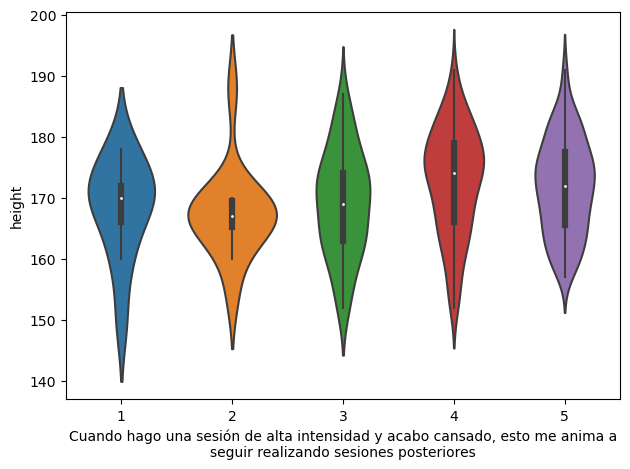

In [360]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[0], 'height')

In [361]:
posthocDunn

1    2    3    4    5
1 1.00 0.60 0.86 0.22 0.36
2 0.60 1.00 0.39 0.04 0.10
3 0.86 0.39 1.00 0.04 0.14
4 0.22 0.04 0.04 1.00 0.36
5 0.36 0.10 0.14 0.36 1.00

In [35]:
descr

count   mean  std    min    25%    50%    75%    max
1  11.00 168.27 8.13 150.00 166.00 170.00 172.00 178.00
2  14.00 167.36 7.38 154.00 165.25 167.00 169.50 188.00
3  55.00 169.11 8.64 152.00 163.00 169.00 174.00 187.00
4 137.00 172.69 8.81 152.00 166.00 174.00 179.00 191.00
5 147.00 171.90 7.83 157.00 165.50 172.00 177.50 191.00

There are significant differences between height for responses:
* 2 and 4 (p = 0.04), median respectively 167 (IQR 165.25 - 169.5) and 174 (IQR 166 - 179),
* 3 and 4 (p = 0.04), median respectively 169 (IQR 163 - 174) and 174 (IQR 166 - 179),

* **total_time**

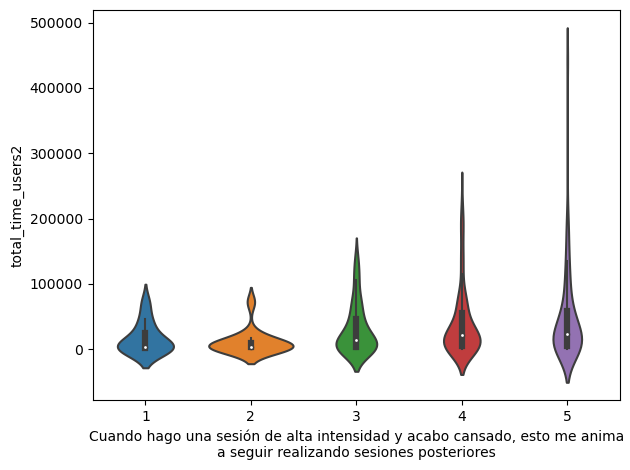

In [372]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[0], 'total_time_users2')

In [373]:
posthocDunn


1    2    3    4    5
1 1.00 0.62 0.33 0.16 0.14
2 0.62 1.00 0.14 0.04 0.03
3 0.33 0.14 1.00 0.33 0.16
4 0.16 0.04 0.33 1.00 0.54
5 0.14 0.03 0.16 0.54 1.00

In [374]:
descr

count     mean      std    min     25%      50%      75%       max
1  11.00 16969.50 23240.36 602.00 2595.50  3511.00 25777.25  70897.50
2  14.00 11278.32 18832.32 306.00 2908.25  4007.00 10034.25  72605.00
3  55.00 31285.93 37784.43 328.00 3644.00 13603.00 45814.50 136622.00
4 137.00 39884.16 51399.76  18.00 5731.00 22648.00 55738.00 232835.00
5 147.00 48037.15 68708.01 238.00 5549.50 23817.80 59151.50 441454.00

There are significant differences between total time for responses:
* 2 and 4 (p = 0.04), median respectively 4007 (IQR 2908.25 - 10034.25) seconds and 22648 (IQR 5731 - 55738) seconds,
* 2 and 5 (p = 0.03), median respectively 4007 (IQR 2908.25 - 10034.25) seconds and 23817.5 (IQR 5549.5 - 59151.5) seconds.

* **reps_per_session**

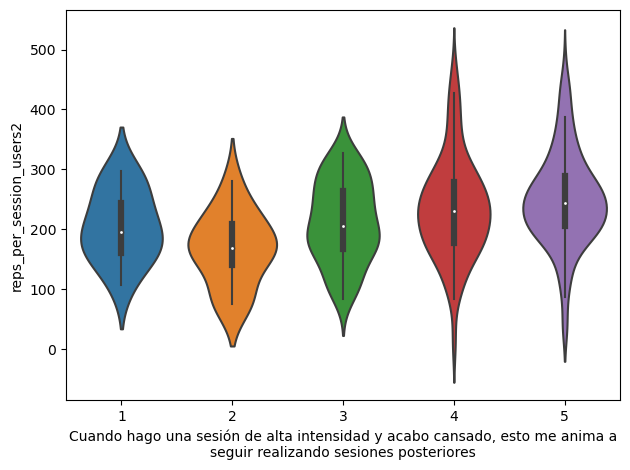

In [375]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[0], 'reps_per_session_users2')

In [376]:
posthocDunn

1    2    3    4    5
1 1.00 0.26 0.66 0.24 0.10
2 0.26 1.00 0.09 0.01 0.00
3 0.66 0.09 1.00 0.14 0.01
4 0.24 0.01 0.14 1.00 0.14
5 0.10 0.00 0.01 0.14 1.00

In [377]:
descr

count   mean   std    min    25%    50%    75%    max
1  11.00 205.13 58.98 107.00 160.90 196.00 244.26 297.60
2  14.00 167.63 59.88  76.00 140.44 168.18 208.54 281.00
3  55.00 212.15 67.01  83.00 166.93 206.00 263.24 327.36
4 137.00 236.09 84.56   8.00 177.30 230.40 279.43 473.11
5 147.00 249.41 78.98  38.00 206.13 244.26 288.54 474.76

There are significant differences between variable for responses:
* 2 and 4 (p = 0.01), median respectively 168.18 (IQR 140.44 - 208.54) and 230.4 (IQR 177.3 - 279.43),
* 2 and 5 (p < 0.005), median respectively 168.18 (IQR 140.44 - 208.54) and 244.26 (IQR 206.13 - 288.54),
* 3 and 5 (p = 0.01), median respectively 206 (IQR 166.93 - 263.24) and 244.26 (IQR 206.13 - 288.54),

* **total calories**

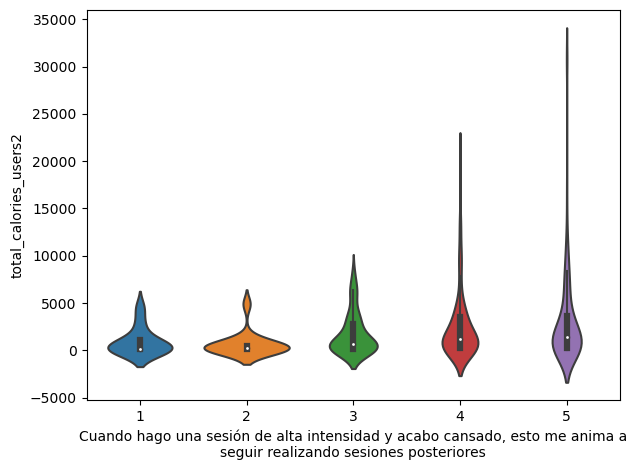

In [378]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[0], 'total_calories_users2')

In [379]:
posthocDunn

1    2    3    4    5
1 1.00 0.71 0.24 0.09 0.08
2 0.71 1.00 0.10 0.02 0.02
3 0.24 0.10 1.00 0.24 0.14
4 0.09 0.02 0.24 1.00 0.71
5 0.08 0.02 0.14 0.71 1.00

In [380]:
descr

count    mean     std   min    25%     50%     75%      max
1  11.00  933.12 1425.31 38.09 121.34  183.06 1077.84  4476.74
2  14.00  667.78 1271.69 19.05 163.86  245.05  420.60  4905.75
3  55.00 1761.74 2168.16 16.58 183.67  710.42 2782.96  8183.89
4 137.00 2539.13 3584.59  0.87 294.91 1168.92 3490.86 20341.14
5 147.00 2984.92 4607.34 12.22 274.29 1396.15 3636.12 30715.99

There are significant differences between variable for responses:
* 2 and 4 (p = 0.02), median respectively 245.05 (IQR 163.86 - 420.6) and 1168.92 (IQR 249.91 - 3490.86),
* 2 and 5 (p = 0.02), median respectively 245.05 (IQR 163.86 - 420.6) and 1396.15 (IQR 274.29 - 3636.12).

* **calories per session**

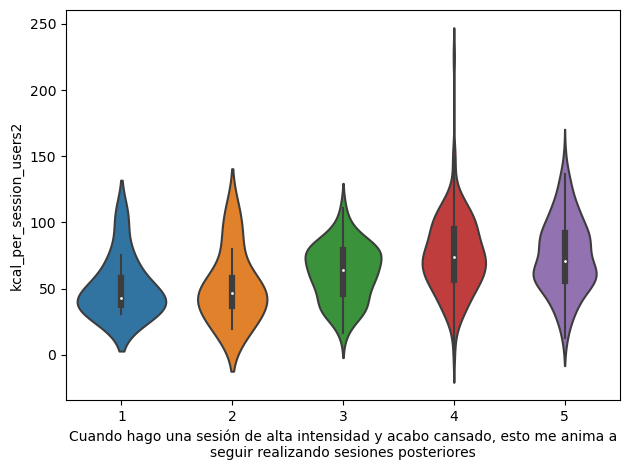

In [381]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[0], 'kcal_per_session_users2')

In [382]:
posthocDunn

1    2    3    4    5
1 1.00 0.87 0.18 0.01 0.01
2 0.87 1.00 0.18 0.01 0.01
3 0.18 0.18 1.00 0.01 0.01
4 0.01 0.01 0.01 1.00 0.87
5 0.01 0.01 0.01 0.87 1.00

In [383]:
descr

count  mean   std   min   25%   50%   75%    max
1  11.00 50.68 22.46 30.51 37.78 42.51 58.32 104.11
2  14.00 51.11 26.75 19.05 36.45 46.65 58.15 109.02
3  55.00 62.02 20.99 16.58 45.81 64.08 79.21 110.69
4 137.00 75.31 29.12  0.87 56.45 73.46 94.66 225.40
5 147.00 74.40 27.81 12.22 55.58 70.59 91.94 149.92

There are significant differences between variable for responses:
* 1 and 4 (p = 0.01), median respectively 42.51 (IQR 37.78 - 58.32) and 73.46 (IQR 56.45 - 94.66),
* 1 and 5 (p = 0.01), median respectively 42.51 (IQR 37.78 - 58.32) and 70.59 (IQR 55.58 - 91.94),
* 2 and 4 (p = 0.02), median respectively 46.65 (IQR 36.45 - 58.15) and 73.46 (IQR 56.45 - 94.66),
* 2 and 5 (p = 0.02), median respectively 46.65 (IQR 36.45 - 58.15) and 70.59 (IQR 55.58 - 91.94),
* 3 and 4 (p = 0.01), median respectively 64.08 (IQR 45.81 - 79.21) and 73.46 (IQR 56.45 - 94.66),
* 3 and 5 (p = 0.01), median respectively 64.08 (IQR 45.81 - 79.21) and 70.59 (IQR 55.58 - 91.94).

* **exercises per user**

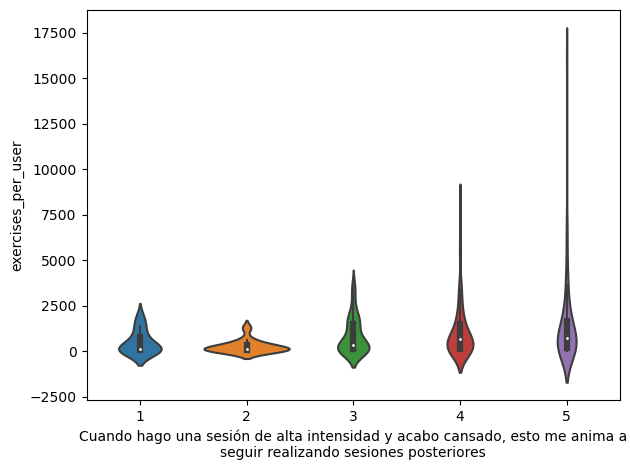

In [384]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[0], 'exercises_per_user')

In [385]:
posthocDunn

1    2    3    4    5
1 1.00 0.53 0.40 0.18 0.12
2 0.53 1.00 0.12 0.03 0.02
3 0.40 0.12 1.00 0.40 0.18
4 0.18 0.03 0.40 1.00 0.40
5 0.12 0.02 0.18 0.40 1.00

In [386]:
descr

count    mean     std   min    25%    50%     75%      max
1  11.00  502.18  631.77 23.00  81.00 158.00  778.50  1859.00
2  14.00  283.21  345.94 19.00  85.25 149.50  348.50  1303.00
3  55.00  876.91  985.81 20.00 124.00 366.00 1531.50  3583.00
4 137.00 1151.93 1549.07 15.00 160.00 685.00 1517.00  8039.00
5 147.00 1469.42 2318.97 15.00 177.00 754.00 1672.50 16069.00

There are significant differences between variable for responses:
* 2 and 4 (p = 0.03), median respectively 149.5 (IQR 85.25 - 348.5) and 685 (IQR 160 - 1517),
* 2 and 5 (p = 0.02), median respectively 149.5 (IQR 85.25 - 348.5) and 754 (IQR 177 - 1672.5).

* **exercises per user without rest**

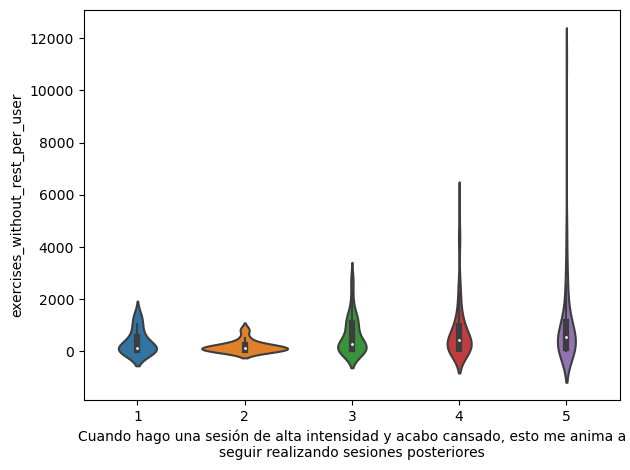

In [387]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[0], 'exercises_without_rest_per_user')

In [388]:
posthocDunn

1    2    3    4    5
1 1.00 0.52 0.40 0.27 0.16
2 0.52 1.00 0.14 0.05 0.03
3 0.40 0.14 1.00 0.52 0.27
4 0.27 0.05 0.52 1.00 0.44
5 0.16 0.03 0.27 0.44 1.00

In [389]:
descr

count    mean     std   min    25%    50%     75%      max
1  11.00  369.82  462.44 23.00  58.00 117.00  568.00  1356.00
2  14.00  198.86  223.85 19.00  58.75 121.50  247.75   832.00
3  55.00  629.24  712.09 13.00  98.00 278.00 1073.50  2773.00
4 137.00  813.57 1113.17  8.00 109.00 427.00  990.00  5665.00
5 147.00 1016.80 1612.72  8.00 125.50 548.00 1137.00 11211.00

There are significant differences between variable for responses:
* 2 and 4 (p = 0.05 - borderline), median respectively 121.5 (IQR 58.75 - 247.75) and 427 (IQR 109 - 990),
* 2 and 5 (p = 0.03), median respectively 121.5 (IQR 58.75 - 247.75) and 548 (IQR 125.5 - 1137).

* **gender**

In [390]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[0], 'gender')

(1, 2): corrected p_value: 1.000000 (ns)
(1, 3): corrected p_value: 0.646462 (ns)
(1, 4): corrected p_value: 0.190020 (ns)
(1, 5): corrected p_value: 0.349505 (ns)
(2, 3): corrected p_value: 0.592092 (ns)
(2, 4): corrected p_value: 0.126252 (ns)
(2, 5): corrected p_value: 0.307169 (ns)
(3, 4): corrected p_value: 0.126252 (ns)
(3, 5): corrected p_value: 0.403623 (ns)
(4, 5): corrected p_value: 0.307169 (ns)


In [391]:
crstab

gender                                              female  male
Cuando hago una sesión de alta intensidad y aca...              
1                                                        7     4
2                                                        9     5
3                                                       27    28
4                                                       42    95
5                                                       58    89

There are no significant differences in gender after post-hoc chi-square test with Hochberg-Bonferonni correction.

* **activity_level**

In [641]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[0], 'activity_level')

(1, 2): corrected p_value: 0.443300 (ns)
(1, 3): corrected p_value: 0.359692 (ns)
(1, 4): corrected p_value: 0.185963 (ns)
(1, 5): corrected p_value: 0.014632 (*)
(2, 3): corrected p_value: 0.971297 (ns)
(2, 4): corrected p_value: 0.952972 (ns)
(2, 5): corrected p_value: 0.359692 (ns)
(3, 4): corrected p_value: 0.497324 (ns)
(3, 5): corrected p_value: 0.019331 (*)
(4, 5): corrected p_value: 0.049155 (*)


In [393]:
crstab

activity_level                                      active  sedentary  \
Cuando hago una sesión de alta intensidad y aca...                      
1                                                        4          7   
2                                                        8          5   
3                                                       32         20   
4                                                       78         43   
5                                                       90         27   

activity_level                                      very active  
Cuando hago una sesión de alta intensidad y aca...               
1                                                             0  
2                                                             1  
3                                                             3  
4                                                            16  
5                                                            30

There are differences between activity level of users that gave the answers
* 1 and 5,
* 3 and 5,
* 4 and 5.

So the answers differ from each other.

* **goal**

In [394]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[0], 'goal')

(1, 2): corrected p_value: 0.193878 (ns)
(1, 3): corrected p_value: 0.770766 (ns)
(1, 4): corrected p_value: 0.770766 (ns)
(1, 5): corrected p_value: 0.770766 (ns)
(2, 3): corrected p_value: 0.094173 (ns)
(2, 4): corrected p_value: 0.001202 (**)
(2, 5): corrected p_value: 0.001266 (**)
(3, 4): corrected p_value: 0.310642 (ns)
(3, 5): corrected p_value: 0.370784 (ns)
(4, 5): corrected p_value: 0.770766 (ns)


In [395]:
crstab

goal                                                antiaging  gain  lose
Cuando hago una sesión de alta intensidad y aca...                       
1                                                           2     4     5
2                                                           8     1     5
3                                                          14    22    19
4                                                          19    65    53
5                                                          23    74    50

The answers differ from each other between goal for answers
* 2 and 4,
* 2 and 5.

### Q2

In [396]:
inf_analysis(df_questionnaire, df_questionnaire.columns[1])

Statistics p-value
Test            Variable                                          
Kruskall-Wallis                                                   
                Height                                5.54    0.14
                Weight                                4.18    0.24
                Body fat                              4.15    0.25
                BMI                                   2.87    0.41
                Total sessions                        6.39    0.09
                Total reps                            6.39    0.09
                Total time                            9.05    0.03
                Reps per session                     17.77    0.00
                Total calories                        8.21    0.04
                Calories per session                  6.87    0.08
                Age                                   2.30    0.51
                Exercises per user                    8.28    0.04
                Exercises without rest per user       7.34    0.06
Chi-square                                                        
                Gender                                0.80    0.85
                Activity level                       15.00    0.02
                Goal                                  4.93    0.55
                Body type                             2.09    0.91
                Notifications seeing                  3.18    0.36
                Newsletter subscription               5.42    0.14

* **reps_per_session**

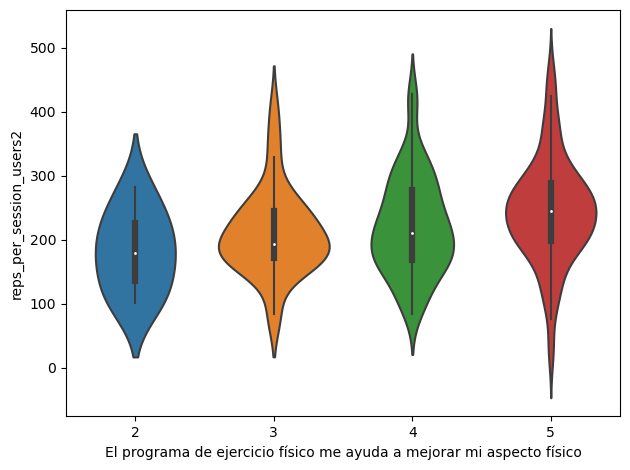

In [397]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[1], 'reps_per_session_users2')

In [398]:
posthocDunn

2    3    4    5
2 1.00 0.44 0.27 0.04
3 0.44 1.00 0.42 0.01
4 0.27 0.42 1.00 0.01
5 0.04 0.01 0.01 1.00

In [399]:
descr

count   mean   std    min    25%    50%    75%    max
2   8.00 181.25 63.41 100.33 135.14 179.17 226.54 281.68
3  33.00 210.23 66.59  83.00 171.00 193.29 244.37 405.38
4  91.00 221.24 77.06  83.00 167.41 210.00 277.12 427.72
5 232.00 244.65 82.00   8.00 197.04 245.03 289.08 474.76

There are significant differences between variable for responses:
* 2 and 5 (p = 0.04), median respectively 179.17 (IQR 135.14 - 226.54) and 245.03 (IQR 197.04 - 289.08),
* 3 and 5 (p = 0.01), median respectively 193.29 (IQR 171 - 244.37) and 245.03 (IQR 197.04 - 289.08),
* 4 and 5 (p = 0.01), median respectively 210 (IQR 167.41 - 277.12) and 245.03 (IQR 197.04 - 289.08).

* **total calories**

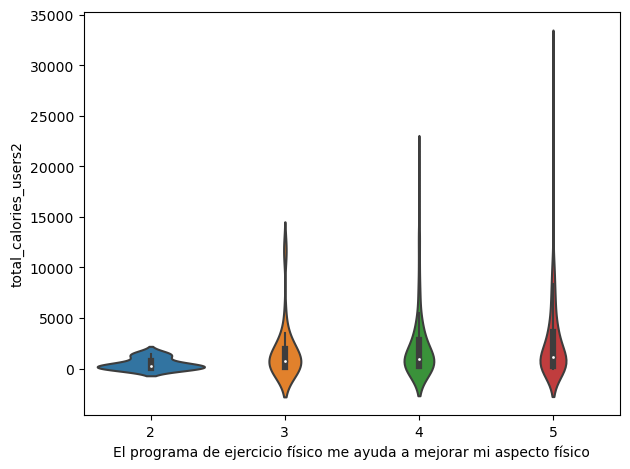

In [400]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[1], 'total_calories_users2')

In [401]:
posthocDunn

2    3    4    5
2 1.00 0.26 0.15 0.11
3 0.26 1.00 0.36 0.19
4 0.15 0.36 1.00 0.36
5 0.11 0.19 0.36 1.00

In [402]:
descr

count    mean     std   min    25%     50%     75%      max
2   8.00  487.45  570.20 38.09  78.60  213.06  738.80  1442.08
3  33.00 1714.67 2844.13 22.04 187.38  710.42 1893.34 11687.71
4  91.00 2180.47 3348.98 24.65 254.37  961.15 2809.25 20341.14
5 232.00 2776.92 4124.84  0.87 260.19 1165.93 3634.89 30715.99

There are no significant changes between responses, even though KW test shows significance. The reason is that the adjustment for multiple comparisons is such that a 'raw' p value may be significant, but after controlling for the number of comparisons, the adjusted p value is not significant.

* **activity_level**

In [403]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[1], 'activity_level')

(2, 3): corrected p_value: 0.122520 (ns)
(2, 4): corrected p_value: 0.122520 (ns)
(2, 5): corrected p_value: 0.020070 (*)
(3, 4): corrected p_value: 0.798074 (ns)
(3, 5): corrected p_value: 0.594969 (ns)
(4, 5): corrected p_value: 0.122520 (ns)


In [404]:
crstab

activity_level                                      active  sedentary  \
El programa de ejercicio físico me ayuda a mejo...                      
2                                                        1          6   
3                                                       20         10   
4                                                       49         32   
5                                                      142         54   

activity_level                                      very active  
El programa de ejercicio físico me ayuda a mejo...               
2                                                             1  
3                                                             3  
4                                                            10  
5                                                            36

The answers differ from each other between activity level for answers
* 2 and 5.

### Q3

In [405]:
inf_analysis(df_questionnaire, df_questionnaire.columns[2])

Statistics p-value
Test            Variable                                          
Kruskall-Wallis                                                   
                Height                               16.33    0.00
                Weight                                8.29    0.08
                Body fat                              5.55    0.24
                BMI                                   1.79    0.77
                Total sessions                       13.28    0.01
                Total reps                           13.28    0.01
                Total time                           15.27    0.00
                Reps per session                     16.84    0.00
                Total calories                       15.63    0.00
                Calories per session                  9.93    0.04
                Age                                   3.99    0.41
                Exercises per user                   16.53    0.00
                Exercises without rest per user      15.21    0.00
Chi-square                                                        
                Gender                               19.59    0.00
                Activity level                       16.61    0.03
                Goal                                 20.75    0.01
                Body type                            10.27    0.25
                Notifications seeing                  1.01    0.91
                Newsletter subscription              16.83    0.00

* **height**

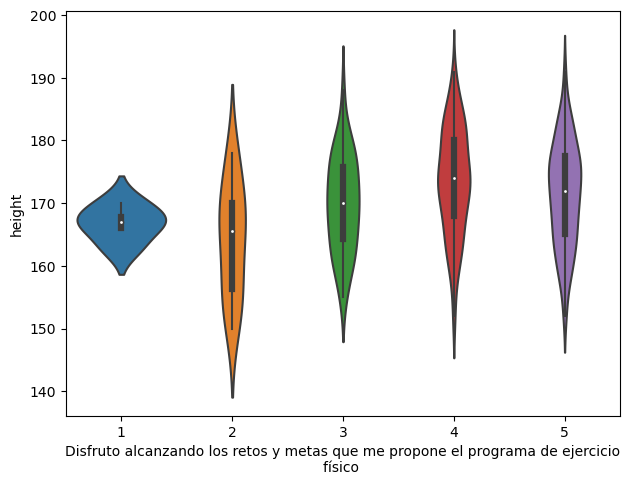

In [406]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[2], 'height')

In [407]:
posthocDunn

1    2    3    4    5
1 1.00 0.90 0.41 0.15 0.24
2 0.90 1.00 0.16 0.01 0.04
3 0.41 0.16 1.00 0.04 0.24
4 0.15 0.01 0.04 1.00 0.14
5 0.24 0.04 0.24 0.14 1.00

In [408]:
descr

count   mean  std    min    25%    50%    75%    max
1   4.00 166.75 2.87 163.00 166.00 167.00 167.75 170.00
2  12.00 164.08 9.00 150.00 156.25 165.50 170.00 178.00
3  46.00 169.78 7.63 155.00 164.25 170.00 175.75 188.00
4 103.00 173.44 8.43 152.00 168.00 174.00 180.00 191.00
5 199.00 171.42 8.33 152.00 165.00 172.00 177.50 191.00

There are significant differences between height for responses:
* 2 and 4 (p = 0.01), median respectively 165.5 (IQR 156.25 - 170) and 174 (IQR 168 - 180),
* 2 and 5 (p = 0.04), median respectively 165.5 (IQR 156.25 - 170) and 172 (IQR 165 - 177.5),
* 3 and 4 (p = 0.04), median respectively 170 (IQR 164.25 - 175.75) and 174 (IQR 168 - 180).

* **total_sessions**

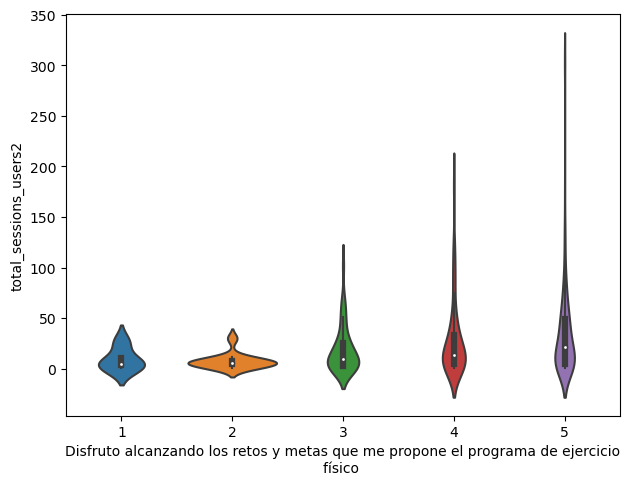

In [409]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[2], 'total_sessions_users2')

In [410]:
posthocDunn

1    2    3    4    5
1 1.00 0.97 0.51 0.32 0.24
2 0.97 1.00 0.38 0.12 0.07
3 0.51 0.38 1.00 0.24 0.07
4 0.32 0.12 0.24 1.00 0.40
5 0.24 0.07 0.07 0.40 1.00

In [411]:
descr

count  mean   std  min  25%   50%   75%    max
1   4.00  9.25 11.32 1.00 4.00  5.00 10.25  26.00
2  12.00  7.58  7.63 1.00 4.25  6.00  7.50  30.00
3  46.00 18.70 22.39 1.00 3.00  9.00 25.00 102.00
4 103.00 28.72 37.09 1.00 5.00 13.00 33.00 184.00
5 199.00 33.34 42.38 1.00 5.00 21.00 49.00 303.00

There are no significant changes between responses, even though KW test shows significance. The reason is that the adjustment for multiple comparisons is such that a 'raw' p value may be significant, but after controlling for the number of comparisons, the adjusted p value is not significant.

* **total_reps**

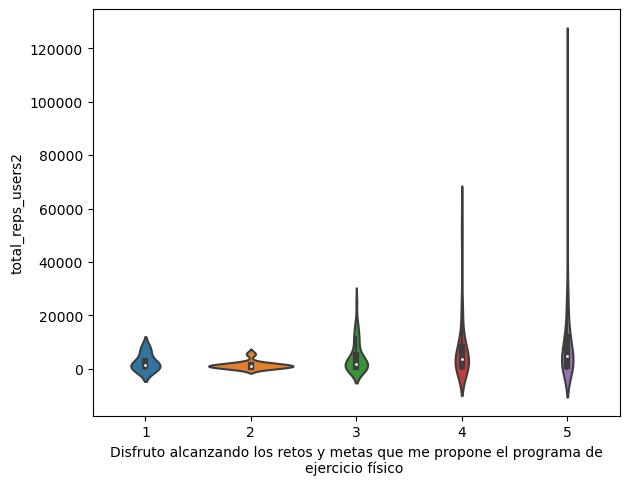

In [412]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[2], 'total_reps_users2')

In [413]:
posthocDunn

1    2    3    4    5
1 1.00 0.77 0.64 0.35 0.26
2 0.77 1.00 0.26 0.06 0.03
3 0.64 0.26 1.00 0.26 0.05
4 0.35 0.06 0.26 1.00 0.26
5 0.26 0.03 0.05 0.26 1.00

In [414]:
descr

count    mean      std   min     25%     50%      75%       max
1   4.00 2501.50  3189.18 83.00 1042.25 1362.00  2821.25   7199.00
2  12.00 1412.50  1425.30 76.00  745.00 1040.00  1565.00   5576.00
3  46.00 4629.30  5807.01 83.00  592.75 1799.50  5261.75  24926.00
4 103.00 8035.93 12687.90 18.00 1039.00 3613.00  8197.50  58468.00
5 199.00 9729.30 15302.48  8.00 1098.50 4763.00 12000.00 117137.00

There are significant differences between variable by responses:
* 2 and 5 (p = 0.03), median respectively 1040 (IQR 745 - 1565) and 4763 (IQR 1098.5 - 12000),
* 3 and 5 (p = 0.05 - borderline), median respectively 1799.5 (IQR 592.75 - 5261.75) and 4763 (IQR 1098.5 - 12000).

* **total_time**

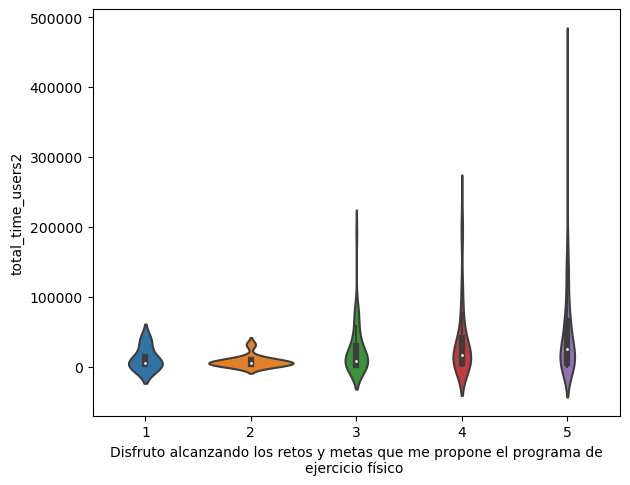

In [415]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[2], 'total_time_users2')

In [416]:
posthocDunn

1    2    3    4    5
1 1.00 0.87 0.57 0.31 0.26
2 0.87 1.00 0.26 0.09 0.04
3 0.57 0.26 1.00 0.26 0.05
4 0.31 0.09 0.26 1.00 0.26
5 0.26 0.04 0.05 0.26 1.00

In [417]:
descr

count     mean      std    min     25%      50%      75%       max
1   4.00 11839.75 16345.26 707.00 4116.50  5253.00 12976.25  36146.00
2  12.00  7599.62  8262.12 363.00 3215.00  4793.50  9372.75  31556.50
3  46.00 25057.84 35395.56 570.00 2437.25  8150.00 29717.00 191445.00
4 103.00 37664.74 52812.07 306.00 5068.00 17111.00 40588.50 232835.00
5 199.00 47337.66 63044.22  18.00 5332.00 25771.00 65614.75 441454.00

There are significant differences between total time for responses:
* 2 and 5 (p = 0.04), median respectively 4793.5 (IQR 3215 - 9372.75) seconds and 25771 (IQR 5332 - 65614.75) seconds,
* 3 and 5 (p = 0.05 - borderline), median respectively 8150 (IQR 2437.25 - 29717) seconds and 25771 (IQR 5332 - 65614.75) seconds.

* **reps_per_session**

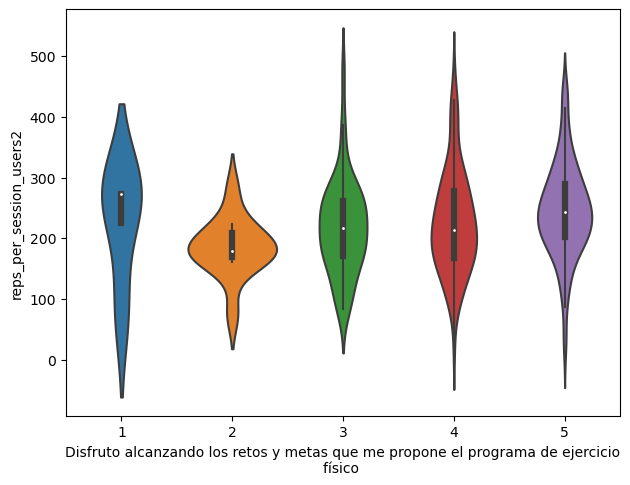

In [418]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[2], 'reps_per_session_users2')

In [419]:
posthocDunn

1    2    3    4    5
1 1.00 0.22 0.64 0.66 0.99
2 0.22 1.00 0.22 0.14 0.03
3 0.64 0.22 1.00 0.66 0.04
4 0.66 0.14 0.66 1.00 0.04
5 0.99 0.03 0.04 0.04 1.00

In [420]:
descr

count   mean   std   min    25%    50%    75%    max
1   4.00 226.17 95.47 83.00 225.05 272.40 273.52 276.88
2  12.00 184.72 47.80 76.00 168.83 178.63 208.48 281.00
3  46.00 217.35 77.43 83.00 170.17 216.73 261.90 474.76
4 103.00 226.18 84.80 18.00 167.86 214.17 278.00 473.11
5 199.00 245.55 78.14  8.00 201.46 244.00 289.39 451.33

There are significant differences between variable for responses:
* 2 and 5 (p = 0.03), median respectively 178.63 (IQR 168.83 - 208.43) and 244 (IQR 201.46 - 289.39),
* 3 and 5 (p = 0.04), median respectively 216.73 (IQR 170.17 - 261.9) and 244 (IQR 201.46 - 289.39),
* 4 and 5 (p = 0.04), median respectively 214.17 (IQR 167.86 - 278) and 244 (IQR 201.46 - 289.39),

* **total calories**

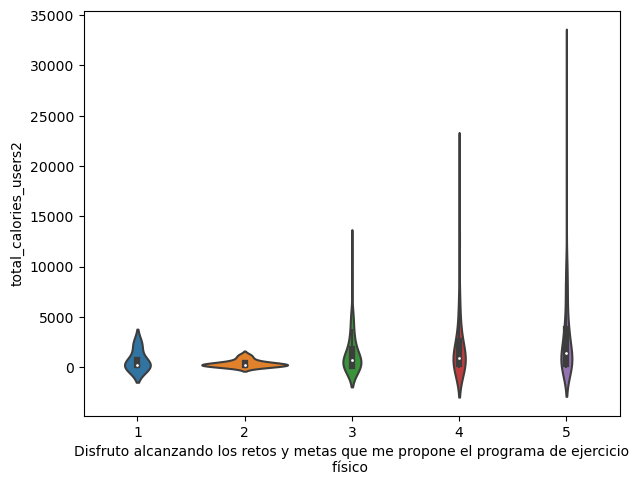

In [421]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[2], 'total_calories_users2')

In [422]:
posthocDunn

1    2    3    4    5
1 1.00 0.80 0.56 0.30 0.23
2 0.80 1.00 0.23 0.04 0.02
3 0.56 0.23 1.00 0.23 0.04
4 0.30 0.04 0.23 1.00 0.30
5 0.23 0.02 0.04 0.30 1.00

In [423]:
descr

count    mean     std   min    25%     50%     75%      max
1   4.00  702.67 1024.74 57.21 209.45  260.19  753.41  2233.07
2  12.00  383.81  341.79 19.05 187.34  254.88  439.92  1194.53
3  46.00 1477.39 2141.64 30.14 155.06  710.42 1858.34 11687.71
4 103.00 2450.72 3785.86 22.04 289.02  961.15 2643.67 20341.14
5 199.00 2891.22 4181.75  0.87 277.60 1396.15 3795.91 30715.99

There are significant differences between variable for responses:
* 2 and 4 (p = 0.04), median respectively 254.88 (IQR 187.34 - 439.92) and 961.15 (IQR 289.02 - 2643.67),
* 2 and 5 (p = 0.02), median respectively 254.88 (IQR 187.34 - 439.92) and 1396.15 (IQR 277.6 - 3795.91),
* 3 and 5 (p = 0.04), median respectively 710.42 (IQR 155.06 - 1858.34) and 1396.15 (IQR 277.6 - 3795.91).

* **calories per session**

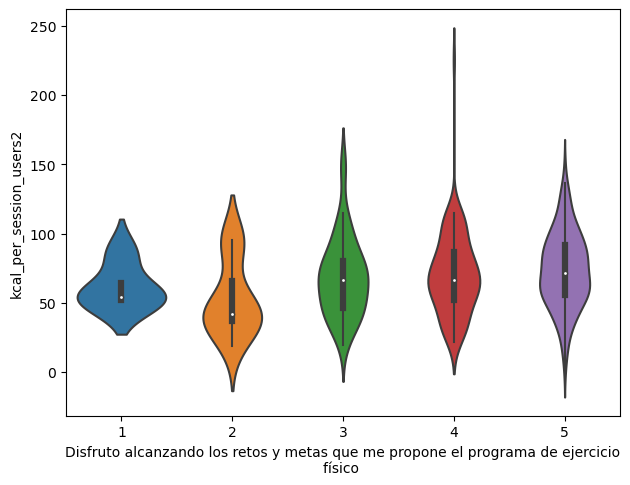

In [424]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[2], 'kcal_per_session_users2')

In [425]:
posthocDunn

1    2    3    4    5
1 1.00 0.66 0.66 0.66 0.49
2 0.66 1.00 0.32 0.21 0.08
3 0.66 0.32 1.00 0.66 0.32
4 0.66 0.21 0.66 1.00 0.32
5 0.49 0.08 0.32 0.32 1.00

In [426]:
descr

count  mean   std   min   25%   50%   75%    max
1   4.00 61.79 16.25 52.04 52.04 54.63 64.38  85.89
2  12.00 52.98 26.66 19.05 37.01 41.72 65.88  95.52
3  46.00 68.45 28.44 19.78 46.67 66.30 79.95 149.92
4 103.00 69.99 29.35 22.04 52.17 66.61 86.65 225.40
5 199.00 73.86 27.15  0.87 55.42 71.87 91.94 149.18

There are no significant changes between responses, even though KW test shows significance. The reason is that the adjustment for multiple comparisons is such that a 'raw' p value may be significant, but after controlling for the number of comparisons, the adjusted p value is not significant.

* **exercises per user**

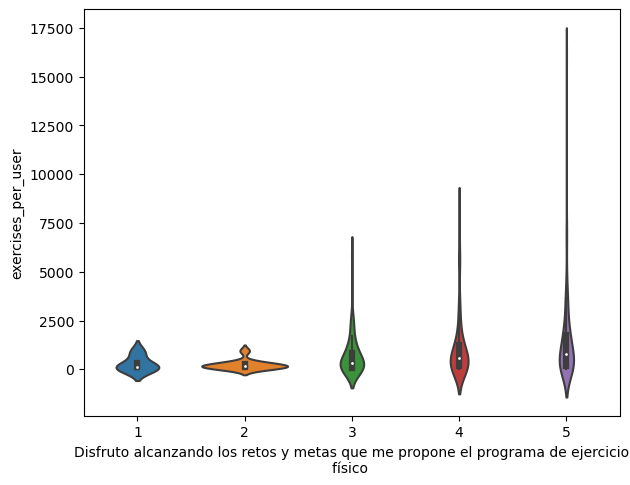

In [427]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[2], 'exercises_per_user')

In [428]:
posthocDunn

1    2    3    4    5
1 1.00 0.90 0.37 0.22 0.16
2 0.90 1.00 0.23 0.07 0.04
3 0.37 0.23 1.00 0.22 0.05
4 0.22 0.07 0.22 1.00 0.23
5 0.16 0.04 0.05 0.23 1.00

In [429]:
descr

count    mean     std   min    25%    50%     75%      max
1   4.00  289.75  393.72 20.00 104.00 132.00  317.75   875.00
2  12.00  235.92  245.89 19.00 117.75 149.00  292.50   949.00
3  46.00  731.98 1045.60 20.00  88.75 301.00  839.75  5828.00
4 103.00 1130.30 1623.45 23.00 166.00 568.00 1266.00  8039.00
5 199.00 1394.25 2073.95 15.00 161.00 802.00 1759.00 16069.00

There are significant differences between variable for responses:
* 2 and 5 (p = 0.04), median respectively 149 (IQR 117.75 - 292.5) and 802 (IQR 161 - 1759),
* 3 and 5 (p = 0.05 - borderline), median respectively 301 (IQR 88.75 - 839.75) and 802 (IQR 161 - 1759).

* **exercises per user without rest**

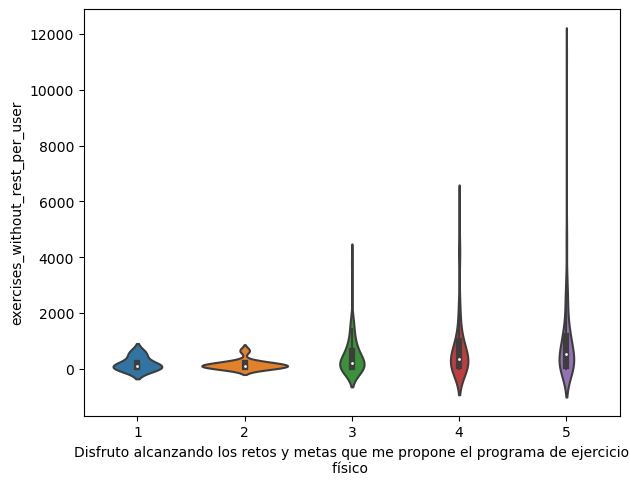

In [430]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[2], 'exercises_without_rest_per_user')

In [431]:
posthocDunn

1    2    3    4    5
1 1.00 0.98 0.42 0.25 0.22
2 0.98 1.00 0.25 0.08 0.04
3 0.42 0.25 1.00 0.25 0.07
4 0.25 0.08 0.25 1.00 0.25
5 0.22 0.04 0.07 0.25 1.00

In [432]:
descr

count   mean     std   min    25%    50%     75%      max
1   4.00 202.50  240.06 20.00  92.75 117.00  226.75   556.00
2  12.00 171.75  171.93 19.00  90.75 113.50  213.25   668.00
3  46.00 507.76  693.41 13.00  65.75 219.00  634.25  3839.00
4 103.00 809.86 1174.66 13.00 113.00 370.00  994.50  5665.00
5 199.00 968.56 1448.48  8.00 124.50 548.00 1182.00 11211.00

There are significant differences between variable for responses:
* 2 and 5 (p = 0.04), median respectively 113.5 (IQR 90.75 - 213.25) and 548 (IQR 124.5 - 1182).

* **gender**

In [433]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[2], 'gender')

(1, 2): corrected p_value: 1.000000 (ns)
(1, 3): corrected p_value: 0.734688 (ns)
(1, 4): corrected p_value: 0.209033 (ns)
(1, 5): corrected p_value: 0.497911 (ns)
(2, 3): corrected p_value: 0.367673 (ns)
(2, 4): corrected p_value: 0.013104 (*)
(2, 5): corrected p_value: 0.114985 (ns)
(3, 4): corrected p_value: 0.026938 (*)
(3, 5): corrected p_value: 0.497911 (ns)
(4, 5): corrected p_value: 0.029550 (*)


In [434]:
crstab

gender                                              female  male
Disfruto alcanzando los retos y metas que me pr...              
1                                                        3     1
2                                                        9     3
3                                                       23    23
4                                                       26    77
5                                                       82   117

There are differences in gender between people that gave the answers
* 2 and 4,
* 3 and 4,
* 4 and 5.

* **activity_level**

In [435]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[2], 'activity_level')

(1, 2): corrected p_value: 0.574282 (ns)
(1, 3): corrected p_value: 0.911732 (ns)
(1, 4): corrected p_value: 0.469383 (ns)
(1, 5): corrected p_value: 0.911732 (ns)
(2, 3): corrected p_value: 0.469383 (ns)
(2, 4): corrected p_value: 0.329161 (ns)
(2, 5): corrected p_value: 0.119015 (ns)
(3, 4): corrected p_value: 0.329161 (ns)
(3, 5): corrected p_value: 0.469383 (ns)
(4, 5): corrected p_value: 0.119015 (ns)


In [436]:
crstab

activity_level                                      active  sedentary  \
Disfruto alcanzando los retos y metas que me pr...                      
1                                                        2          1   
2                                                        4          7   
3                                                       23         16   
4                                                       65         32   
5                                                      118         46   

activity_level                                      very active  
Disfruto alcanzando los retos y metas que me pr...               
1                                                             1  
2                                                             1  
3                                                             7  
4                                                             6  
5                                                            35

There are no significant differences between activity level of users for the answers.

* **goal**

In [437]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[2], 'goal')

(1, 2): corrected p_value: 0.336494 (ns)
(1, 3): corrected p_value: 0.943227 (ns)
(1, 4): corrected p_value: 0.943227 (ns)
(1, 5): corrected p_value: 0.943227 (ns)
(2, 3): corrected p_value: 0.046219 (*)
(2, 4): corrected p_value: 0.059078 (ns)
(2, 5): corrected p_value: 0.059078 (ns)
(3, 4): corrected p_value: 0.046219 (*)
(3, 5): corrected p_value: 0.043926 (*)
(4, 5): corrected p_value: 0.950865 (ns)


In [438]:
crstab

goal                                                antiaging  gain  lose
Disfruto alcanzando los retos y metas que me pr...                       
1                                                           1     2     1
2                                                           1     2     9
3                                                          17    16    13
4                                                          16    51    36
5                                                          31    95    73

The answers differ from each other between goal for answers
* 2 and 3,
* 3 and 4,
* 3 and 5.

* **newsletter subscription**

In [439]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[2], 'newsletter_subscription', plot = False)

(1, 2): corrected p_value: 0.841642 (ns)
(1, 3): corrected p_value: 0.186518 (ns)
(1, 4): corrected p_value: 0.099844 (ns)
(1, 5): corrected p_value: 0.042025 (*)
(2, 3): corrected p_value: 0.844044 (ns)
(2, 4): corrected p_value: 0.841642 (ns)
(2, 5): corrected p_value: 0.605753 (ns)
(3, 4): corrected p_value: 1.000000 (ns)
(3, 5): corrected p_value: 0.946131 (ns)
(4, 5): corrected p_value: 0.946131 (ns)


In [440]:
crstab

newsletter_subscription                             False  True
Disfruto alcanzando los retos y metas que me pr...             
1                                                       2     2
2                                                       2    10
3                                                       3    43
4                                                       6    97
5                                                       9   190

The answers differ from each other between goal for answers
* 1 and 5.

### Q4

In [441]:
inf_analysis(df_questionnaire, df_questionnaire.columns[3])

Statistics p-value
Test            Variable                                          
Kruskall-Wallis                                                   
                Height                                1.00    0.91
                Weight                                5.04    0.28
                Body fat                              4.94    0.29
                BMI                                   6.83    0.15
                Total sessions                       11.18    0.02
                Total reps                           11.18    0.02
                Total time                           11.96    0.02
                Reps per session                      6.56    0.16
                Total calories                       11.67    0.02
                Calories per session                  6.03    0.20
                Age                                   6.19    0.19
                Exercises per user                   10.86    0.03
                Exercises without rest per user      10.34    0.04
Chi-square                                                        
                Gender                                3.31    0.51
                Activity level                        7.21    0.51
                Goal                                  5.44    0.71
                Body type                             6.06    0.64
                Notifications seeing                  2.27    0.69
                Newsletter subscription               0.54    0.97

* **total_sessions**

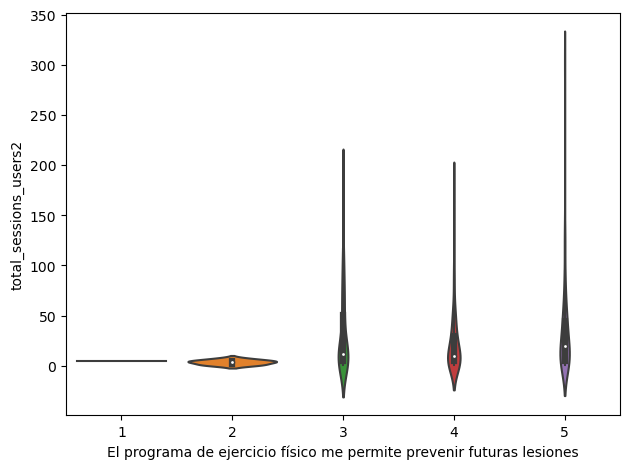

In [442]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[3], 'total_sessions_users2')

In [443]:
posthocDunn

1    2    3    4    5
1 1.00 0.81 0.59 0.63 0.59
2 0.81 1.00 0.05 0.09 0.05
3 0.59 0.05 1.00 0.59 0.63
4 0.63 0.09 0.59 1.00 0.13
5 0.59 0.05 0.63 0.13 1.00

In [444]:
descr

count  mean   std  min  25%   50%   75%    max
1   1.00  5.00   NaN 5.00 5.00  5.00  5.00   5.00
2   6.00  3.67  2.34 1.00 1.75  4.00  4.75   7.00
3  71.00 31.31 37.59 1.00 5.00 12.00 51.00 184.00
4 121.00 24.42 32.71 1.00 5.00 10.00 30.00 178.00
5 165.00 32.58 42.66 1.00 5.00 20.00 45.00 303.00

There are significant differences between variable by responses:
* 2 and 3 (p = 0.05 - borderline), median respectively 4 (IQR 1.75 - 4.75) and 12 (IQR 5 - 51),
* 2 and 5 (p = 0.05 - borderline), median respectively 4 (IQR 1.75 - 4.75) and 20 (IQR 5 - 45).

* **total_reps**

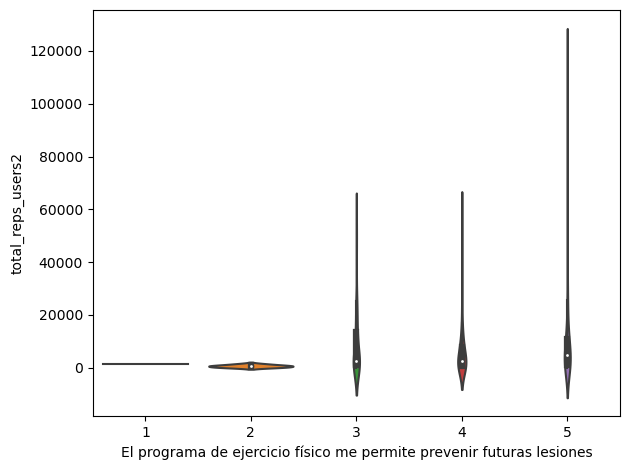

In [445]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[3], 'total_reps_users2')

In [446]:
posthocDunn

1    2    3    4    5
1 1.00 0.67 0.67 0.67 0.67
2 0.67 1.00 0.05 0.09 0.05
3 0.67 0.05 1.00 0.57 0.67
4 0.67 0.09 0.57 1.00 0.10
5 0.67 0.05 0.67 0.10 1.00

In [447]:
descr

count    mean      std     min     25%     50%      75%       max
1   1.00 1362.00      NaN 1362.00 1362.00 1362.00  1362.00   1362.00
2   6.00  690.50   486.92  145.00  309.75  698.50   900.50   1453.00
3  71.00 8776.87 12232.21   83.00  924.50 2572.00 13379.00  55761.00
4 121.00 6674.28 10746.19   18.00  809.00 2572.00  7824.00  58468.00
5 165.00 9499.91 15771.01    8.00 1117.00 4787.00 11087.00 117137.00

There are significant differences between variable by responses:
* 2 and 3 (p = 0.05 - borderline), median respectively 698.5 (IQR 309.75 - 900.5) and 2572 (IQR 924.5 - 13379),
* 2 and 5 (p = 0.05 - borderline), median respectively 698.5 (IQR 309.75 - 900.5) and 4787 (IQR 1117 - 11087).

* **total_time**

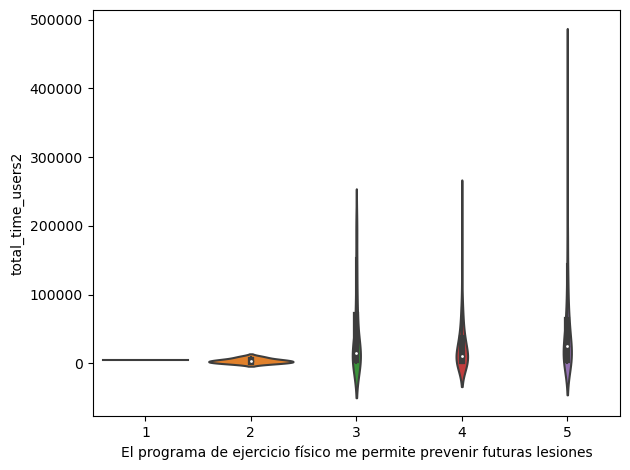

In [448]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[3], 'total_time_users2')

In [449]:
posthocDunn

1    2    3    4    5
1 1.00 0.81 0.59 0.59 0.59
2 0.81 1.00 0.07 0.08 0.05
3 0.59 0.07 1.00 0.54 0.59
4 0.59 0.08 0.54 1.00 0.08
5 0.59 0.05 0.59 0.08 1.00

In [450]:
descr

count     mean      std     min     25%      50%      75%       max
1   1.00  5253.00      NaN 5253.00 5253.00  5253.00  5253.00   5253.00
2   6.00  3873.83  3280.80  541.00 1389.75  3521.50  5077.25   9384.00
3  71.00 44786.03 58940.49  306.00 5594.50 15526.00 70436.00 203712.00
4 121.00 31471.07 44448.14  306.00 3389.00 11200.00 37664.00 232835.00
5 165.00 45906.51 63494.29   18.00 4870.00 25347.00 62865.00 441454.00

There are significant differences between total time for responses:
* 2 and 5 (p = 0.05 - borderline), median respectively 3521.5 (IQR 1389.75 - 5077.25) seconds and 25347 (IQR 4870 - 62865) seconds.

* **total calories**

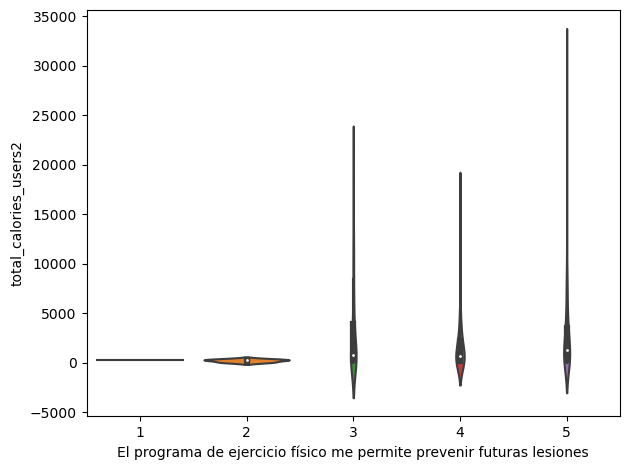

In [451]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[3], 'total_calories_users2')

In [452]:
posthocDunn

1    2    3    4    5
1 1.00 0.86 0.57 0.60 0.57
2 0.86 1.00 0.07 0.09 0.06
3 0.57 0.07 1.00 0.50 0.60
4 0.60 0.09 0.50 1.00 0.09
5 0.57 0.06 0.60 0.09 1.00

In [453]:
descr

count    mean     std    min    25%     50%     75%      max
1   1.00  260.19     NaN 260.19 260.19  260.19  260.19   260.19
2   6.00  219.20  143.55  29.33 111.31  249.78  306.02   396.39
3  71.00 2886.82 4173.91  22.04 282.50  808.94 3888.74 20341.14
4 121.00 1942.29 2962.98  16.58 217.10  710.42 2193.09 16964.55
5 165.00 2797.55 4211.24   0.87 266.38 1295.74 3548.86 30715.99

There are no significant changes between responses, even though KW test shows significance. The reason is that the adjustment for multiple comparisons is such that a 'raw' p value may be significant, but after controlling for the number of comparisons, the adjusted p value is not significant.

* **exercises per user**

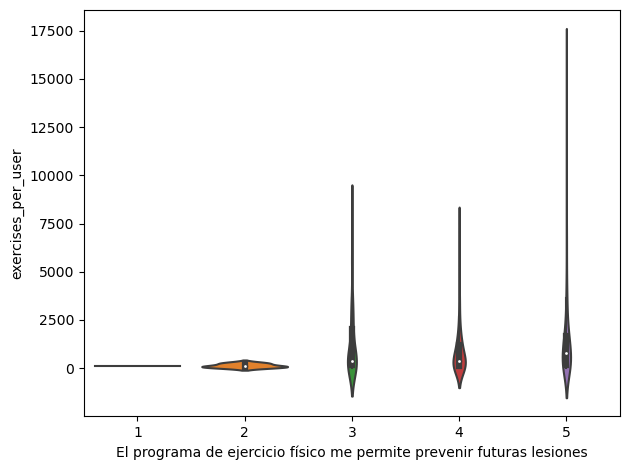

In [454]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[3], 'exercises_per_user')

In [455]:
posthocDunn

1    2    3    4    5
1 1.00 1.00 0.48 0.48 0.48
2 1.00 1.00 0.11 0.12 0.09
3 0.48 0.11 1.00 0.48 0.48
4 0.48 0.12 0.48 1.00 0.12
5 0.48 0.09 0.48 0.12 1.00

In [456]:
descr

count    mean     std    min    25%    50%     75%      max
1   1.00  132.00     NaN 132.00 132.00 132.00  132.00   132.00
2   6.00  139.33  101.70  39.00  61.75 112.00  210.25   285.00
3  71.00 1277.38 1723.01  23.00 146.50 391.00 2036.00  8039.00
4 121.00  930.74 1341.94  20.00 136.00 371.00 1227.00  7326.00
5 165.00 1377.31 2148.63  15.00 166.00 799.00 1663.00 16069.00

There are no significant changes between responses, even though KW test shows significance. The reason is that the adjustment for multiple comparisons is such that a 'raw' p value may be significant, but after controlling for the number of comparisons, the adjusted p value is not significant.

* **exercises per user without rest**

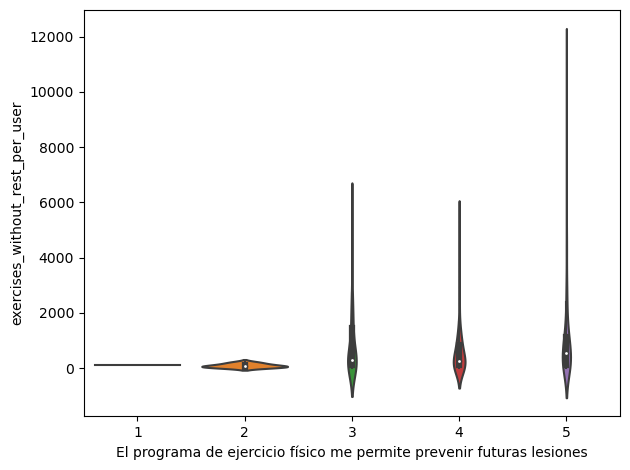

In [457]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[3], 'exercises_without_rest_per_user')

In [458]:
posthocDunn

1    2    3    4    5
1 1.00 0.84 0.55 0.57 0.55
2 0.84 1.00 0.10 0.12 0.08
3 0.55 0.10 1.00 0.55 0.55
4 0.57 0.12 0.55 1.00 0.13
5 0.55 0.08 0.55 0.13 1.00

In [459]:
descr

count   mean     std    min    25%    50%     75%      max
1   1.00 117.00     NaN 117.00 117.00 117.00  117.00   117.00
2   6.00  95.17   71.00  24.00  44.25  77.50  129.50   212.00
3  71.00 896.52 1219.39  13.00 109.00 299.00 1454.00  5665.00
4 121.00 660.25  958.82  13.00 108.00 272.00  823.00  5324.00
5 165.00 958.53 1500.03   8.00 117.00 546.00 1124.00 11211.00

There are no significant changes between responses, even though KW test shows significance. The reason is that the adjustment for multiple comparisons is such that a 'raw' p value may be significant, but after controlling for the number of comparisons, the adjusted p value is not significant.

### Q5

In [460]:
inf_analysis(df_questionnaire, df_questionnaire.columns[4])

Statistics p-value
Test            Variable                                          
Kruskall-Wallis                                                   
                Height                                5.93    0.20
                Weight                                1.79    0.78
                Body fat                              9.33    0.05
                BMI                                   6.16    0.19
                Total sessions                        6.03    0.20
                Total reps                            6.03    0.20
                Total time                            8.16    0.09
                Reps per session                     22.18    0.00
                Total calories                        8.26    0.08
                Calories per session                 11.87    0.02
                Age                                   8.30    0.08
                Exercises per user                    8.02    0.09
                Exercises without rest per user       6.77    0.15
Chi-square                                                        
                Gender                                4.85    0.30
                Activity level                       28.45    0.00
                Goal                                 12.20    0.14
                Body type                            13.19    0.11
                Notifications seeing                  5.51    0.24
                Newsletter subscription               8.38    0.08

* **reps_per_session**

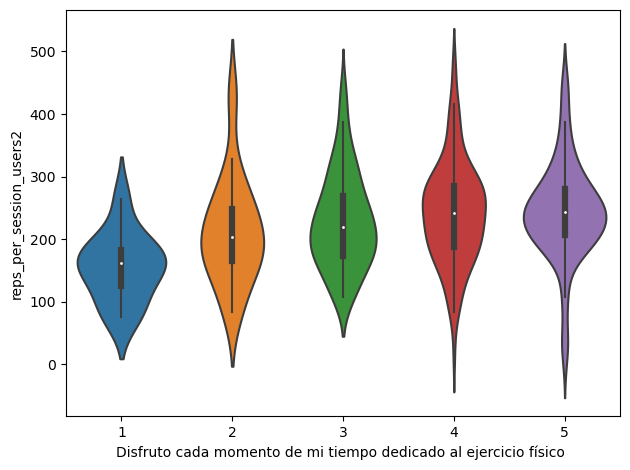

In [461]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[4], 'reps_per_session_users2')

In [462]:
posthocDunn

1    2    3    4    5
1 1.00 0.07 0.01 0.00 0.00
2 0.07 1.00 0.27 0.04 0.03
3 0.01 0.27 1.00 0.13 0.07
4 0.00 0.04 0.13 1.00 0.68
5 0.00 0.03 0.07 0.68 1.00

In [463]:
descr

count   mean   std    min    25%    50%    75%    max
1  11.00 155.23 54.17  76.00 125.76 162.33 183.15 264.53
2  30.00 212.17 84.95  83.00 165.35 204.02 248.05 433.32
3  94.00 228.81 77.06 107.00 172.45 219.00 269.54 441.77
4 124.00 242.82 81.36  18.00 187.96 241.80 284.55 474.76
5 105.00 243.70 77.85   8.00 207.46 244.26 279.58 451.33

There are significant differences between variable for responses:
* 1 and 3 (p = 0.01), median respectively 162.33 (IQR 125.76 - 183.15) and 219 (IQR 172.45 - 269.54),
* 1 and 4 (p < 0.005), median respectively 162.33 (IQR 125.76 - 183.15) and 241.8 (IQR 187.96 - 284.55),
* 1 and 5 (p < 0.005), median respectively 162.33 (IQR 125.76 - 183.15) and 244.26 (IQR 207.46 - 279.58),
* 2 and 4 (p = 0.04), median respectively 204.02 (IQR 165.35 - 248.05) and 241.8 (IQR 187.96 - 284.55),
* 2 and 5 (p = 0.03), median respectively 204.02 (IQR 165.35 - 248.05) and 244.26 (IQR 207.46 - 279.58).

* **calories per session**

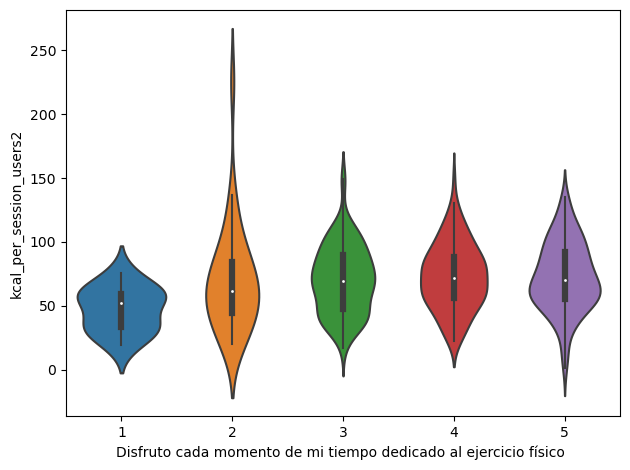

In [464]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[4], 'kcal_per_session_users2')

In [465]:
posthocDunn

1    2    3    4    5
1 1.00 0.12 0.02 0.01 0.01
2 0.12 1.00 0.48 0.28 0.28
3 0.02 0.48 1.00 0.62 0.62
4 0.01 0.28 0.62 1.00 0.95
5 0.01 0.28 0.62 0.95 1.00

In [466]:
descr

count  mean   std   min   25%   50%   75%    max
1  11.00 47.20 17.48 19.05 33.21 52.56 59.33  75.35
2  30.00 69.66 41.31 19.78 44.52 61.56 83.92 225.40
3  94.00 70.64 26.71 16.58 47.48 69.63 90.04 149.18
4 124.00 72.99 26.01 22.04 55.86 71.82 88.48 149.92
5 105.00 72.75 27.02  0.87 54.93 70.24 91.79 135.27

There are significant differences between variable for responses:
* 1 and 3 (p = 0.02), median respectively 52.56 (IQR 33.21 - 59.33) and 69.63 (IQR 47.48 - 90.04),
* 1 and 4 (p = 0.01), median respectively 52.56 (IQR 33.21 - 59.33) and 71.82 (IQR 55.86 - 88.48),
* 1 and 5 (p = 0.01), median respectively 52.56 (IQR 33.21 - 59.33) and 70.24 (IQR 54.93 - 91.79).

* **activity_level**

In [467]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[4], 'activity_level')

(1, 2): corrected p_value: 0.292675 (ns)
(1, 3): corrected p_value: 0.292675 (ns)
(1, 4): corrected p_value: 0.024878 (*)
(1, 5): corrected p_value: 0.009246 (**)
(2, 3): corrected p_value: 0.781175 (ns)
(2, 4): corrected p_value: 0.279984 (ns)
(2, 5): corrected p_value: 0.074103 (ns)
(3, 4): corrected p_value: 0.029302 (*)
(3, 5): corrected p_value: 0.008165 (**)
(4, 5): corrected p_value: 0.279984 (ns)


In [468]:
crstab

activity_level                                      active  sedentary  \
Disfruto cada momento de mi tiempo dedicado al ...                      
1                                                        4          7   
2                                                       17         11   
3                                                       47         38   
4                                                       81         27   
5                                                       63         19   

activity_level                                      very active  
Disfruto cada momento de mi tiempo dedicado al ...               
1                                                             0  
2                                                             2  
3                                                             9  
4                                                            16  
5                                                            23

There are differences between activity level of users that gave the answers
* 1 and 4,
* 1 and 5,
* 3 and 4,
* 3 and 5.

### Q6

In [469]:
inf_analysis(df_questionnaire, df_questionnaire.columns[5])

Statistics p-value
Test            Variable                                          
Kruskall-Wallis                                                   
                Height                                4.54    0.34
                Weight                                5.60    0.23
                Body fat                             18.47    0.00
                BMI                                   9.59    0.05
                Total sessions                        7.07    0.13
                Total reps                            7.07    0.13
                Total time                           10.95    0.03
                Reps per session                     33.36    0.00
                Total calories                       11.28    0.02
                Calories per session                 20.19    0.00
                Age                                   4.30    0.37
                Exercises per user                   10.17    0.04
                Exercises without rest per user       8.92    0.06
Chi-square                                                        
                Gender                               15.33    0.00
                Activity level                       62.93    0.00
                Goal                                 22.33    0.00
                Body type                            13.65    0.09
                Notifications seeing                  6.32    0.18
                Newsletter subscription               2.43    0.66

* **body fat**

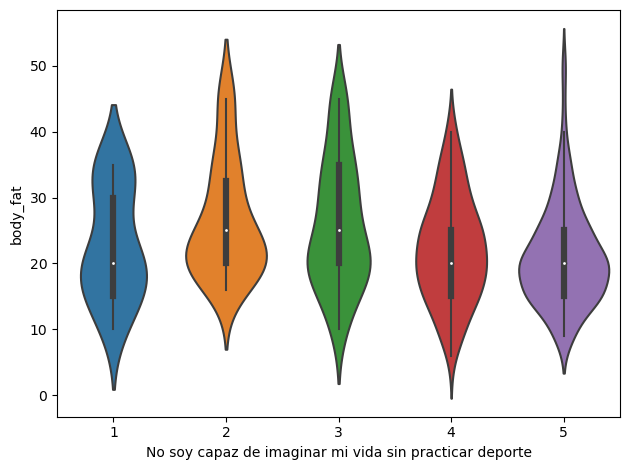

In [470]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[5], 'body_fat')

In [471]:
posthocDunn

1    2    3    4    5
1 1.00 0.24 0.27 0.92 0.47
2 0.24 1.00 0.64 0.09 0.01
3 0.27 0.64 1.00 0.09 0.00
4 0.92 0.09 0.09 1.00 0.27
5 0.47 0.01 0.00 0.27 1.00

In [472]:
descr

count  mean  std   min   25%   50%   75%   max
1  23.00 22.83 8.50 10.00 15.00 20.00 30.00 35.00
2  27.00 26.52 8.70 16.00 20.00 25.00 32.50 45.00
3  73.00 25.86 9.68 10.00 20.00 25.00 35.00 45.00
4  91.00 22.20 7.93  6.00 15.00 20.00 25.00 40.00
5 150.00 21.16 7.67  9.00 15.00 20.00 25.00 50.00

There are significant differences between body fat for responses:
* 2 and 5 (p = 0.01), median respectively 25 (IQR 20 - 32.5) and 20 (IQR 15 - 25),
* 3 and 5 (p < 0.005), median respectively 25 (IQR 20 - 35) and 20 (IQR 15 - 25).

* **total_time**

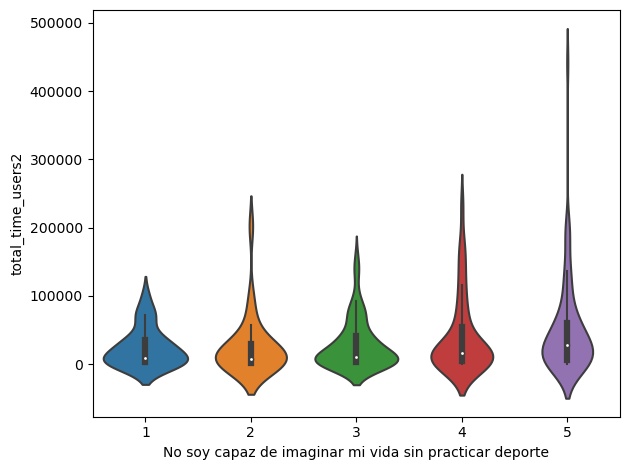

In [473]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[5], 'total_time_users2')

In [474]:
posthocDunn

1    2    3    4    5
1 1.00 0.63 0.82 0.56 0.25
2 0.63 1.00 0.56 0.25 0.10
3 0.82 0.56 1.00 0.56 0.11
4 0.56 0.25 0.56 1.00 0.25
5 0.25 0.10 0.11 0.25 1.00

In [475]:
descr

count     mean      std    min     25%      50%      75%       max
1  23.00 24807.89 28235.11 602.00 3450.00  9369.00 35033.00  98388.00
2  27.00 25738.61 42903.47 328.00 2238.00  7047.00 29460.25 202128.00
3  73.00 28967.87 35894.69 391.00 2912.00 11200.00 41328.00 157233.00
4  91.00 40753.64 55817.63  18.00 5009.50 16436.00 54062.50 232835.00
5 150.00 50014.11 68215.71 238.00 6286.00 28189.00 60631.00 441454.00

There are no significant changes between responses, even though KW test shows significance. The reason is that the adjustment for multiple comparisons is such that a 'raw' p value may be significant, but after controlling for the number of comparisons, the adjusted p value is not significant.

* **reps_per_session**

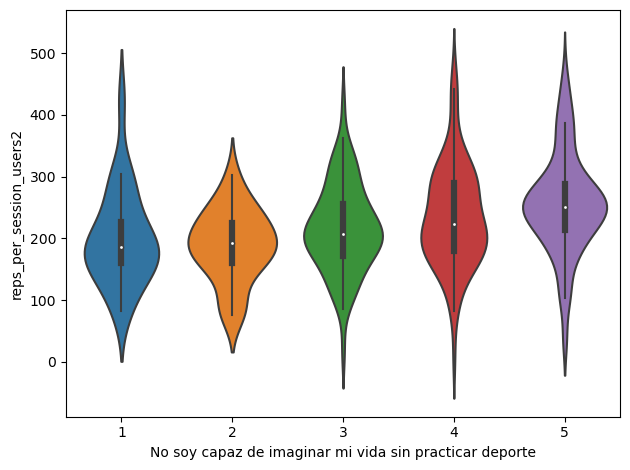

In [476]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[5], 'reps_per_session_users2')

In [477]:
posthocDunn

1    2    3    4    5
1 1.00 0.76 0.25 0.05 0.00
2 0.76 1.00 0.14 0.02 0.00
3 0.25 0.14 1.00 0.19 0.00
4 0.05 0.02 0.19 1.00 0.05
5 0.00 0.00 0.00 0.05 1.00

In [478]:
descr

count   mean   std   min    25%    50%    75%    max
1  23.00 200.44 76.72 83.00 160.57 185.87 226.00 423.83
2  27.00 188.88 57.81 76.00 161.00 192.67 225.00 303.05
3  73.00 216.19 71.07 18.00 171.17 206.50 256.14 417.60
4  91.00 235.43 82.19  8.00 178.83 223.00 289.33 473.11
5 150.00 255.75 80.95 38.00 212.95 251.26 288.69 474.76

There are significant differences between variable for responses:
* 1 and 4 (p = 0.05 - borderline), median respectively 185.87 (IQR 160.57 - 226) and 223 (IQR 178.83 - 289.33),
* 1 and 5 (p < 0.005), median respectively 185.87 (IQR 160.57 - 226) and 251.26 (IQR 212.95 - 288.69),
* 2 and 4 (p = 0.02), median respectively 192.67 (IQR 161 - 225) and 223 (IQR 178.83 - 289.33),
* 2 and 5 (p < 0.005), median respectively 192.67 (IQR 161 - 225) and 251.26 (IQR 212.95 - 288.69),
* 3 and 5 (p < 0.005), median respectively 206.5 (IQR 171.17 - 256.14) and 251.26 (IQR 212.95 - 288.69),
* 4 and 5 (p = 0.05 - borderline), median respectively 223 (IQR 178.83 - 289.33) and 251.26 (IQR 212.95 - 288.69).

* **total calories**

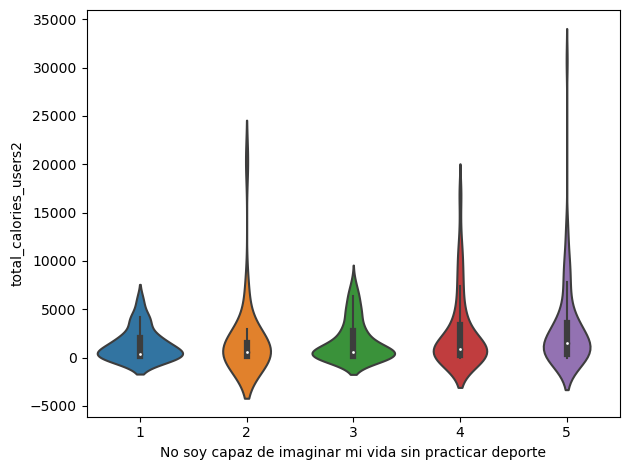

In [479]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[5], 'total_calories_users2')

In [480]:
posthocDunn

1    2    3    4    5
1 1.00 0.65 0.66 0.49 0.22
2 0.65 1.00 0.41 0.22 0.07
3 0.66 0.41 1.00 0.58 0.16
4 0.49 0.22 0.58 1.00 0.30
5 0.22 0.07 0.16 0.30 1.00

In [481]:
descr

count    mean     std   min    25%     50%     75%      max
1  23.00 1392.92 1625.34 38.09 200.51  391.56 2026.41  5840.28
2  27.00 1863.10 4075.53 16.58 117.57  562.96 1545.33 20341.14
3  73.00 1744.08 2073.90 27.07 188.45  632.16 2770.51  7810.16
4  91.00 2587.38 3798.68  0.87 272.29  880.72 3398.83 16964.55
5 150.00 3053.62 4527.92 12.22 348.12 1498.92 3613.38 30715.99

There are no significant changes between responses, even though KW test shows significance. The reason is that the adjustment for multiple comparisons is such that a 'raw' p value may be significant, but after controlling for the number of comparisons, the adjusted p value is not significant.

* **calories per session**

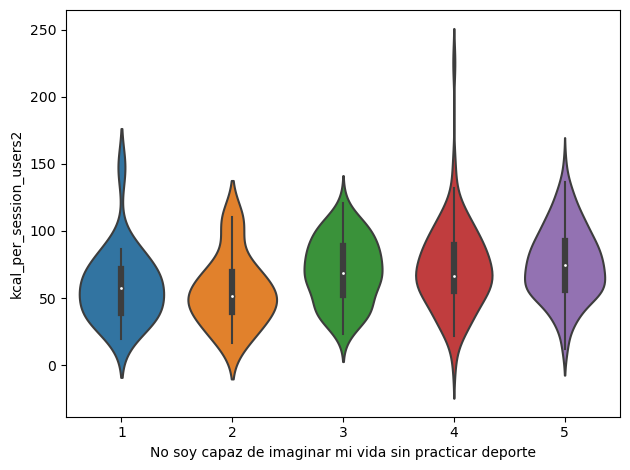

In [482]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[5], 'kcal_per_session_users2')

In [483]:
posthocDunn

1    2    3    4    5
1 1.00 0.85 0.05 0.05 0.01
2 0.85 1.00 0.02 0.02 0.00
3 0.05 0.02 1.00 0.93 0.30
4 0.05 0.02 0.93 1.00 0.30
5 0.01 0.00 0.30 0.30 1.00

In [484]:
descr

count  mean   std   min   25%   50%   75%    max
1  23.00 58.76 27.07 19.78 38.96 57.68 71.62 147.46
2  27.00 55.51 25.98 16.58 39.58 51.59 69.72 110.76
3  73.00 70.24 24.06 23.06 52.56 68.90 88.53 120.88
4  91.00 72.18 31.48  0.87 55.38 66.50 89.22 225.40
5 150.00 75.95 26.78 12.22 55.90 74.57 92.30 149.92

There are significant differences between variable for responses:
* 1 and 3 (p = 0.05 - borderline), median respectively 57.68 (IQR 28.96 - 71.62) and 68.9 (IQR 52.56 - 88.53),
* 1 and 4 (p = 0.05 - borderline), median respectively 57.68 (IQR 28.96 - 71.62) and 66.5 (IQR 55.38 - 89.22),
* 1 and 5 (p = 0.01), median respectively 57.68 (IQR 28.96 - 71.62) and 74.57 (IQR 55.9 - 92.3),
* 2 and 3 (p = 0.02), median respectively 51.59 (IQR 39.58) and 68.9 (IQR 52.56 - 88.53),
* 2 and 4 (p = 0.02), median respectively 51.59 (IQR 39.58) and 66.5 (IQR 55.38 - 89.22),
* 2 and 5 (p < 0.005), median respectively 51.59 (IQR 39.58) and 74.57 (IQR 55.9 - 92.3).

* **exercises per user**

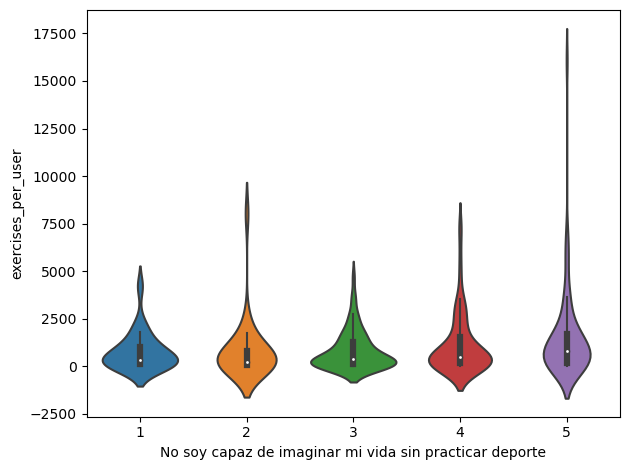

In [485]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[5], 'exercises_per_user')

In [486]:
posthocDunn

1    2    3    4    5
1 1.00 0.62 0.93 0.62 0.29
2 0.62 1.00 0.59 0.29 0.11
3 0.93 0.59 1.00 0.59 0.11
4 0.62 0.29 0.59 1.00 0.29
5 0.29 0.11 0.11 0.29 1.00

In [487]:
descr

count    mean     std   min    25%    50%     75%      max
1  23.00  789.09  989.99 20.00 135.00 344.00  994.00  4222.00
2  27.00  823.48 1580.12 19.00  82.00 235.00  819.50  8039.00
3  73.00  828.66  995.78 23.00 116.00 368.00 1303.00  4681.00
4  91.00 1138.40 1573.52 15.00 152.00 468.00 1543.00  7326.00
5 150.00 1513.79 2302.25 15.00 170.25 832.50 1680.75 16069.00

There are no significant changes between responses, even though KW test shows significance. The reason is that the adjustment for multiple comparisons is such that a 'raw' p value may be significant, but after controlling for the number of comparisons, the adjusted p value is not significant.

* **gender**

In [488]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[5], 'gender')

(1, 2): corrected p_value: 0.699015 (ns)
(1, 3): corrected p_value: 0.248744 (ns)
(1, 4): corrected p_value: 0.427822 (ns)
(1, 5): corrected p_value: 0.099285 (ns)
(2, 3): corrected p_value: 0.053832 (ns)
(2, 4): corrected p_value: 0.099285 (ns)
(2, 5): corrected p_value: 0.013134 (*)
(3, 4): corrected p_value: 0.652491 (ns)
(3, 5): corrected p_value: 0.699015 (ns)
(4, 5): corrected p_value: 0.272054 (ns)


In [489]:
crstab

gender                                              female  male
No soy capaz de imaginar mi vida sin practicar ...              
1                                                       13    10
2                                                       18     9
3                                                       26    47
4                                                       38    53
5                                                       48   102

There are differences in gender between people that gave the answers
* 2 and 5.

* **activity_level**

In [490]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[5], 'activity_level')

(1, 2): corrected p_value: 0.746867 (ns)
(1, 3): corrected p_value: 0.039631 (*)
(1, 4): corrected p_value: 0.027129 (*)
(1, 5): corrected p_value: 0.000001 (****)
(2, 3): corrected p_value: 0.022195 (*)
(2, 4): corrected p_value: 0.004583 (**)
(2, 5): corrected p_value: 0.000000 (****)
(3, 4): corrected p_value: 0.284963 (ns)
(3, 5): corrected p_value: 0.000036 (****)
(4, 5): corrected p_value: 0.002252 (**)


In [491]:
crstab

activity_level                                      active  sedentary  \
No soy capaz de imaginar mi vida sin practicar ...                      
1                                                        7         14   
2                                                        8         18   
3                                                       45         25   
4                                                       54         27   
5                                                       98         18   

activity_level                                      very active  
No soy capaz de imaginar mi vida sin practicar ...               
1                                                             2  
2                                                             1  
3                                                             3  
4                                                            10  
5                                                            34

There are differences between activity level of users that gave the answers
* 1 and 3,
* 1 and 4,
* 1 and 5,
* 2 and 3,
* 2 and 4,
* 2 and 5,
* 3 and 5,
* 4 and 5.

* **goal**

In [492]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[5], 'goal')

(1, 2): corrected p_value: 0.566679 (ns)
(1, 3): corrected p_value: 0.592755 (ns)
(1, 4): corrected p_value: 0.938444 (ns)
(1, 5): corrected p_value: 0.592755 (ns)
(2, 3): corrected p_value: 0.938444 (ns)
(2, 4): corrected p_value: 0.420870 (ns)
(2, 5): corrected p_value: 0.041545 (*)
(3, 4): corrected p_value: 0.420870 (ns)
(3, 5): corrected p_value: 0.015453 (*)
(4, 5): corrected p_value: 0.065239 (ns)


In [493]:
crstab

goal                                                antiaging  gain  lose
No soy capaz de imaginar mi vida sin practicar ...                       
1                                                           5    10     8
2                                                           4     8    15
3                                                          12    25    36
4                                                          22    36    33
5                                                          23    87    40

The answers differ from each other between goal for answers
* 2 and 5,
* 3 and 5.

### Q7

In [494]:
inf_analysis(df_questionnaire, df_questionnaire.columns[6])

Statistics p-value
Test            Variable                                          
Kruskall-Wallis                                                   
                Height                                2.35    0.67
                Weight                                2.11    0.72
                Body fat                              6.36    0.17
                BMI                                   6.52    0.16
                Total sessions                        3.91    0.42
                Total reps                            3.91    0.42
                Total time                            4.43    0.35
                Reps per session                     17.94    0.00
                Total calories                        4.48    0.35
                Calories per session                  3.52    0.47
                Age                                   4.17    0.38
                Exercises per user                    4.72    0.32
                Exercises without rest per user       4.43    0.35
Chi-square                                                        
                Gender                                1.67    0.80
                Activity level                       12.32    0.14
                Goal                                 18.98    0.01
                Body type                             7.39    0.50
                Notifications seeing                  4.98    0.29
                Newsletter subscription               5.60    0.23

* **reps_per_session**

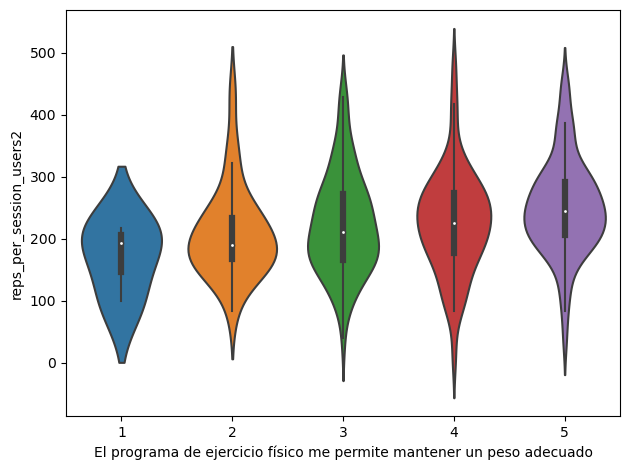

In [495]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[6], 'reps_per_session_users2')

In [496]:
posthocDunn

1    2    3    4    5
1 1.00 0.50 0.33 0.30 0.16
2 0.50 1.00 0.33 0.19 0.02
3 0.33 0.33 1.00 0.50 0.02
4 0.30 0.19 0.50 1.00 0.05
5 0.16 0.02 0.02 0.05 1.00

In [497]:
descr

count   mean   std    min    25%    50%    75%    max
1   3.00 170.39 61.88 100.33 146.81 193.29 205.42 217.56
2  26.00 208.86 73.22  83.00 166.95 189.71 233.32 433.32
3  70.00 223.52 80.01  40.00 165.56 210.83 272.10 427.72
4 114.00 226.43 82.56   8.00 176.99 226.00 274.28 474.76
5 151.00 250.85 77.48  38.00 206.07 244.37 292.12 451.33

There are significant differences between variable for responses:
* 2 and 5 (p = 0.02), median respectively 193.29 (IQR 146.81 - 205.42) and 244.37 (IQR 206.07 - 292.12),
* 3 and 5 (p = 0.02), median respectively 210.83 (IQR 165.56 - 272.1) and 244.37 (IQR 206.07 - 292.12),
* 4 and 5 (p = 0.05 - borderline), median respectively 226 (IQR 206.07 - 292.12) and 244.37 (IQR 206.07 - 292.12).

* **goal**

In [498]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[6], 'goal')

(1, 2): corrected p_value: 0.025691 (*)
(1, 3): corrected p_value: 0.096671 (ns)
(1, 4): corrected p_value: 0.166861 (ns)
(1, 5): corrected p_value: 0.158790 (ns)
(2, 3): corrected p_value: 0.314252 (ns)
(2, 4): corrected p_value: 0.082530 (ns)
(2, 5): corrected p_value: 0.082530 (ns)
(3, 4): corrected p_value: 0.082530 (ns)
(3, 5): corrected p_value: 0.082530 (ns)
(4, 5): corrected p_value: 0.972481 (ns)


In [499]:
crstab

goal                                                antiaging  gain  lose
El programa de ejercicio físico me permite mant...                       
1                                                           2     1     0
2                                                           1    11    14
3                                                          11    24    35
4                                                          23    56    35
5                                                          29    74    48

The answers differ from each other between goal for answers
* 1 and 2.

### Q8

In [500]:
inf_analysis(df_questionnaire, df_questionnaire.columns[7])

Statistics p-value
Test            Variable                                          
Kruskall-Wallis                                                   
                Height                                6.99    0.14
                Weight                               11.31    0.02
                Body fat                              8.82    0.07
                BMI                                   9.70    0.05
                Total sessions                        4.20    0.38
                Total reps                            4.20    0.38
                Total time                            4.62    0.33
                Reps per session                      4.95    0.29
                Total calories                        5.63    0.23
                Calories per session                  6.84    0.14
                Age                                   3.00    0.56
                Exercises per user                    4.42    0.35
                Exercises without rest per user       4.40    0.35
Chi-square                                                        
                Gender                                3.14    0.53
                Activity level                       11.71    0.16
                Goal                                  9.26    0.32
                Body type                             6.87    0.55
                Notifications seeing                  2.26    0.69
                Newsletter subscription               1.08    0.90

* **weight**

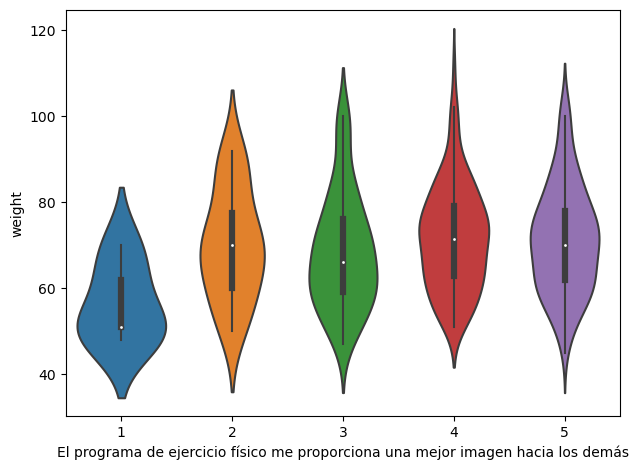

In [501]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[7], 'weight')

In [502]:
posthocDunn

1    2    3    4    5
1 1.00 0.09 0.09 0.04 0.04
2 0.09 1.00 0.71 0.71 0.73
3 0.09 0.71 1.00 0.09 0.10
4 0.04 0.71 0.09 1.00 0.78
5 0.04 0.73 0.10 0.78 1.00

In [503]:
descr

count  mean   std   min   25%   50%   75%    max
1   5.00 56.40  9.29 48.00 51.00 51.00 62.00  70.00
2  19.00 70.03 12.68 50.00 60.00 70.00 77.50  92.00
3  75.00 68.46 13.36 47.00 59.00 66.00 76.10 100.00
4 120.00 71.73 12.20 51.00 62.85 71.50 79.00 111.00
5 145.00 71.39 12.56 45.00 62.00 70.00 78.00 103.00

There are significant differences between weight for responses:
* 1 and 4 (p = 0.04), median respectively 51 (IQR 51 - 62) and 71.5 (IQR 62.85 - 79),
* 1 and 5 (p = 0.04), median respectively 51 (IQR 51 - 62) and 70 (IQR 62 - 78).

### Q9

In [504]:
inf_analysis(df_questionnaire, df_questionnaire.columns[8])

Statistics p-value
Test            Variable                                          
Kruskall-Wallis                                                   
                Height                                8.34    0.04
                Weight                               15.22    0.00
                Body fat                              3.47    0.33
                BMI                                  11.16    0.01
                Total sessions                        1.09    0.78
                Total reps                            1.09    0.78
                Total time                            2.26    0.52
                Reps per session                      9.24    0.03
                Total calories                        1.55    0.67
                Calories per session                 10.37    0.02
                Age                                   1.95    0.58
                Exercises per user                    2.10    0.55
                Exercises without rest per user       1.96    0.58
Chi-square                                                        
                Gender                                9.63    0.02
                Activity level                        6.65    0.35
                Goal                                  4.63    0.59
                Body type                             5.66    0.46
                Notifications seeing                  1.00    0.80
                Newsletter subscription              18.26    0.00

* **height**

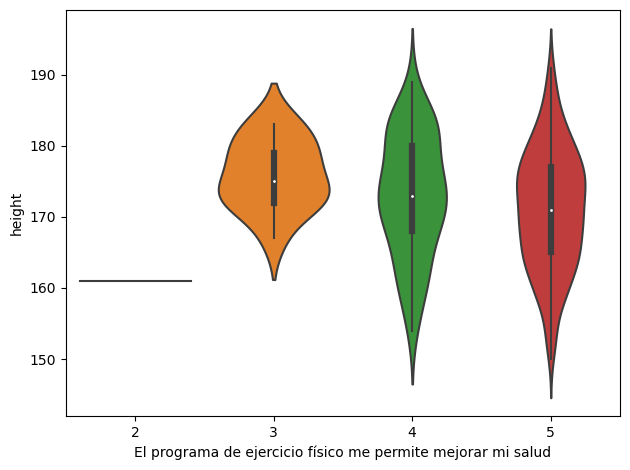

In [505]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[8], 'height')

In [506]:
posthocDunn

2    3    4    5
2 1.00 0.21 0.21 0.21
3 0.21 1.00 0.21 0.18
4 0.21 0.21 1.00 0.21
5 0.21 0.18 0.21 1.00

In [507]:
descr

count   mean  std    min    25%    50%    75%    max
2   1.00 161.00  NaN 161.00 161.00 161.00 161.00 161.00
3  13.00 175.92 4.86 167.00 172.00 175.00 179.00 183.00
4  58.00 172.91 8.45 154.00 168.00 173.00 180.00 189.00
5 292.00 171.05 8.47 150.00 165.00 171.00 177.00 191.00

There are no significant changes between responses, even though KW test shows significance. The reason is that the adjustment for multiple comparisons is such that a 'raw' p value may be significant, but after controlling for the number of comparisons, the adjusted p value is not significant.

* **weight**

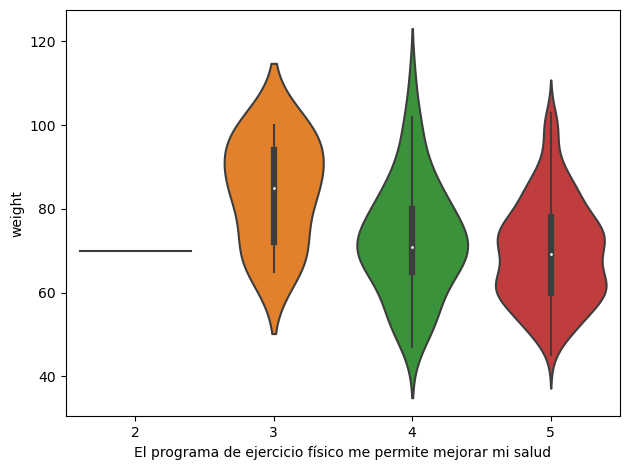

In [508]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[8], 'weight')

In [509]:
posthocDunn

2    3    4    5
2 1.00 0.52 0.95 0.95
3 0.52 1.00 0.03 0.00
4 0.95 0.03 1.00 0.21
5 0.95 0.00 0.21 1.00

In [510]:
descr

count  mean   std   min   25%   50%   75%    max
2   1.00 70.00   NaN 70.00 70.00 70.00 70.00  70.00
3  13.00 84.38 12.35 65.00 72.00 85.00 94.00 100.00
4  58.00 72.77 13.64 47.00 65.00 71.00 80.00 111.00
5 292.00 69.59 12.16 45.00 60.00 69.20 78.00 103.00

There are significant differences between the variable for responses:
* 3 and 4 (p = 0.03), median respectively 85 (IQR 72 - 94) and 71 (IQR 65 - 80),
* 3 and 5 (p < 0.005), median respectively 85 (IQR 72 - 94) and 69.2 (IQR 60 - 78).

* **BMI**

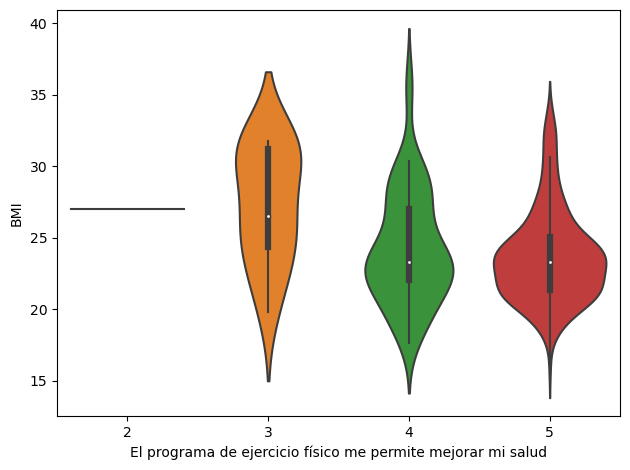

In [511]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[8], 'BMI')

In [512]:
posthocDunn

2    3    4    5
2 1.00 0.73 0.40 0.40
3 0.73 1.00 0.04 0.01
4 0.40 0.04 1.00 0.51
5 0.40 0.01 0.51 1.00

In [513]:
descr

count  mean  std   min   25%   50%   75%   max
2   1.00 27.01  NaN 27.01 27.01 27.01 27.01 27.01
3  13.00 27.30 4.04 19.84 24.34 26.53 31.20 31.77
4  58.00 24.28 3.95 17.65 22.06 23.30 26.99 36.14
5 292.00 23.69 3.22 15.89 21.32 23.33 25.07 33.87

There are significant differences between variable by responses:
* 3 and 4 (p = 0.04), median respectively 26.53 (IQR 24.34 - 31.2) and 23.3 (IQR 22.06 - 26.99),
* 3 and 5 (p = 0.01), median respectively 26.53 (IQR 24.34 - 31.2) and 23.33 (IQR 21.32 - 25.07).

* **reps_per_session**

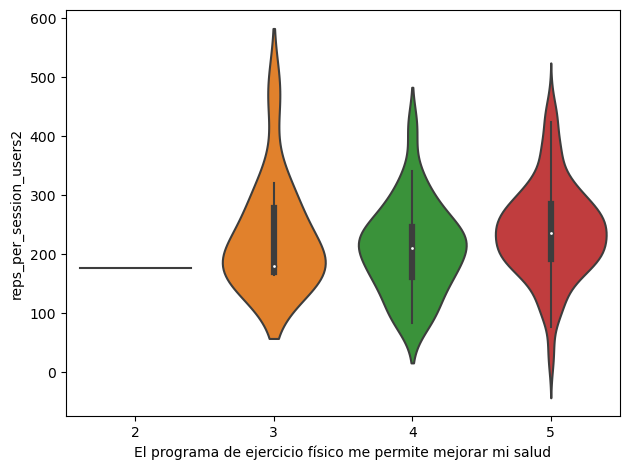

In [514]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[8], 'reps_per_session_users2')

In [515]:
posthocDunn

2    3    4    5
2 1.00 0.63 0.63 0.61
3 0.63 1.00 0.75 0.61
4 0.63 0.75 1.00 0.03
5 0.61 0.61 0.03 1.00

In [516]:
descr

count   mean   std    min    25%    50%    75%    max
2   1.00 176.83   NaN 176.83 176.83 176.83 176.83 176.83
3  13.00 231.11 90.43 165.41 169.83 180.62 278.00 474.76
4  58.00 209.70 75.85  83.00 161.93 209.83 246.49 415.96
5 292.00 239.50 80.10   8.00 192.12 236.56 285.71 473.11

There are significant differences between variable for responses:
* 4 and 5 (p = 0.03), median respectively 209.83 (IQR 161.93 - 246.49) and 236.56 (IQR 192.12 - 285.71).

* **calories per session**

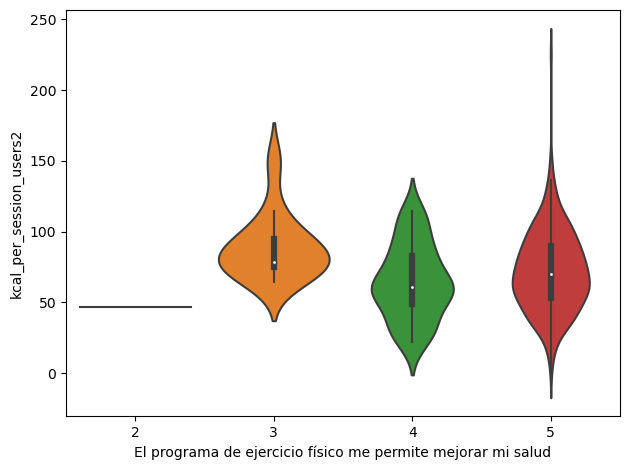

In [517]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[8], 'kcal_per_session_users2')

In [518]:
posthocDunn

2    3    4    5
2 1.00 0.15 0.42 0.34
3 0.15 1.00 0.02 0.06
4 0.42 0.02 1.00 0.15
5 0.34 0.06 0.15 1.00

In [519]:
descr

count  mean   std   min   25%   50%   75%    max
2   1.00 46.80   NaN 46.80 46.80 46.80 46.80  46.80
3  13.00 88.92 22.67 64.30 74.84 78.94 95.09 149.92
4  58.00 64.42 26.10 22.04 49.08 60.96 82.84 114.59
5 292.00 71.92 28.28  0.87 53.12 70.28 89.96 225.40

There are significant differences between variable for responses:
* 3 and 4 (p = 0.02), median respectively 78.94 (IQR 74.84 - 95.09) and 60.96 (IQR 49.08 - 82.84).

* **gender**

In [520]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[8], 'gender')

(2, 3): corrected p_value: 0.434298 (ns)
(2, 4): corrected p_value: 0.841046 (ns)
(2, 5): corrected p_value: 0.876275 (ns)
(3, 4): corrected p_value: 0.340349 (ns)
(3, 5): corrected p_value: 0.173601 (ns)
(4, 5): corrected p_value: 0.340349 (ns)


In [521]:
crstab

gender                                              female  male
El programa de ejercicio físico me permite mejo...              
2                                                        1     0
3                                                        1    12
4                                                       18    40
5                                                      123   169

There are no significant differences in gender after post-hoc chi-square test with Hochberg-Bonferonni correction.

* **newsletter subscription**

In [522]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[8], 'newsletter_subscription', plot = False)

(2, 3): corrected p_value: 0.563914 (ns)
(2, 4): corrected p_value: 0.201954 (ns)
(2, 5): corrected p_value: 0.201954 (ns)
(3, 4): corrected p_value: 0.563914 (ns)
(3, 5): corrected p_value: 0.563914 (ns)
(4, 5): corrected p_value: 0.680710 (ns)


In [523]:
crstab

newsletter_subscription                             False  True
El programa de ejercicio físico me permite mejo...             
2                                                       1     0
3                                                       2    11
4                                                       2    56
5                                                      17   275

There are no significant differences in gender after post-hoc chi-square test with Hochberg-Bonferonni correction.

### Q10

In [524]:
inf_analysis(df_questionnaire, df_questionnaire.columns[9])

Statistics p-value
Test            Variable                                          
Kruskall-Wallis                                                   
                Height                                6.86    0.14
                Weight                                3.23    0.52
                Body fat                              1.01    0.91
                BMI                                   3.05    0.55
                Total sessions                        1.15    0.89
                Total reps                            1.15    0.89
                Total time                            1.19    0.88
                Reps per session                      4.85    0.30
                Total calories                        1.06    0.90
                Calories per session                  5.67    0.23
                Age                                   6.37    0.17
                Exercises per user                    1.18    0.88
                Exercises without rest per user       1.12    0.89
Chi-square                                                        
                Gender                               12.72    0.01
                Activity level                        8.50    0.39
                Goal                                  4.54    0.81
                Body type                             5.08    0.75
                Notifications seeing                  1.13    0.89
                Newsletter subscription              49.33    0.00

* **gender**

In [525]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[9], 'gender')

(1, 2): corrected p_value: 0.110341 (ns)
(1, 3): corrected p_value: 0.067186 (ns)
(1, 4): corrected p_value: 0.067186 (ns)
(1, 5): corrected p_value: 0.110341 (ns)
(2, 3): corrected p_value: 1.000000 (ns)
(2, 4): corrected p_value: 1.000000 (ns)
(2, 5): corrected p_value: 0.832043 (ns)
(3, 4): corrected p_value: 1.000000 (ns)
(3, 5): corrected p_value: 0.314786 (ns)
(4, 5): corrected p_value: 0.147266 (ns)


In [526]:
crstab

gender                                              female  male
La actividad deportiva me permitirá progresar e...              
1                                                        5     0
2                                                        3     7
3                                                       17    35
4                                                       39    79
5                                                       79   100

There are no significant differences in gender after post-hoc chi-square test with Hochberg-Bonferonni correction.

* **newsletter subscription**

In [527]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[9], 'newsletter_subscription', plot = False)

(1, 2): corrected p_value: 0.018209 (*)
(1, 3): corrected p_value: 0.000128 (***)
(1, 4): corrected p_value: 0.000001 (****)
(1, 5): corrected p_value: 0.000000 (****)
(2, 3): corrected p_value: 1.000000 (ns)
(2, 4): corrected p_value: 1.000000 (ns)
(2, 5): corrected p_value: 1.000000 (ns)
(3, 4): corrected p_value: 1.000000 (ns)
(3, 5): corrected p_value: 1.000000 (ns)
(4, 5): corrected p_value: 1.000000 (ns)


In [528]:
crstab

newsletter_subscription                             False  True
La actividad deportiva me permitirá progresar e...             
1                                                       4     1
2                                                       0    10
3                                                       3    49
4                                                       6   112
5                                                       9   170

The answers differ from each other between newsletter subscription for answers
* 1 and 2, 
* 1 and 3,
* 1 and 4,
* 1 and 5.

### Q11

In [529]:
inf_analysis(df_questionnaire, df_questionnaire.columns[10])

Statistics p-value
Test            Variable                                          
Kruskall-Wallis                                                   
                Height                                5.19    0.16
                Weight                               16.39    0.00
                Body fat                              4.09    0.25
                BMI                                  14.06    0.00
                Total sessions                        9.11    0.03
                Total reps                            9.11    0.03
                Total time                            9.98    0.02
                Reps per session                      7.51    0.06
                Total calories                        6.98    0.07
                Calories per session                  4.99    0.17
                Age                                   6.75    0.08
                Exercises per user                    9.94    0.02
                Exercises without rest per user      10.18    0.02
Chi-square                                                        
                Gender                                6.96    0.07
                Activity level                        2.89    0.82
                Goal                                  5.46    0.49
                Body type                            12.84    0.05
                Notifications seeing                  2.65    0.45
                Newsletter subscription               3.21    0.36

* **weight**

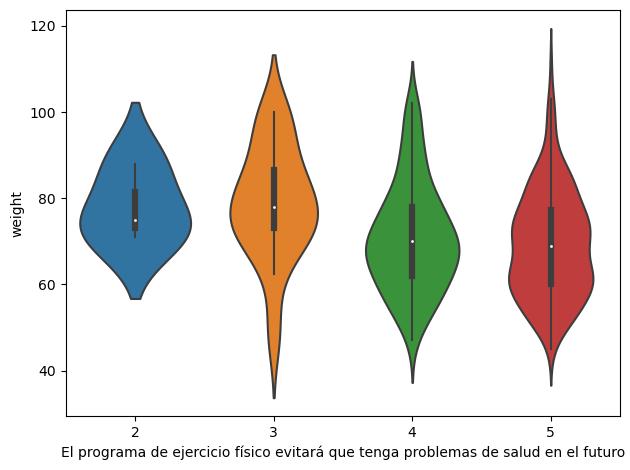

In [530]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[10], 'weight')

In [531]:
posthocDunn

2    3    4    5
2 1.00 0.92 0.35 0.32
3 0.92 1.00 0.01 0.00
4 0.35 0.01 1.00 0.36
5 0.32 0.00 0.36 1.00

In [532]:
descr

count  mean   std   min   25%   50%   75%    max
2   3.00 78.00  8.89 71.00 73.00 75.00 81.50  88.00
3  30.00 78.80 13.14 47.00 73.20 78.00 86.50 100.00
4 111.00 70.94 12.52 47.00 62.00 70.00 78.00 102.00
5 220.00 69.25 12.36 45.00 60.00 69.00 77.25 111.00

There are significant differences between height for responses:
* 3 and 4 (p = 0.01), median respectively 78 (IQR 73.2 - 86.5) and 70 (IQR 62 - 78),
* 3 and 5 (p < 0.005), median respectively 78 (IQR 73.2 - 86.5) and 69 (IQR 60 - 77.25).

* **BMI**

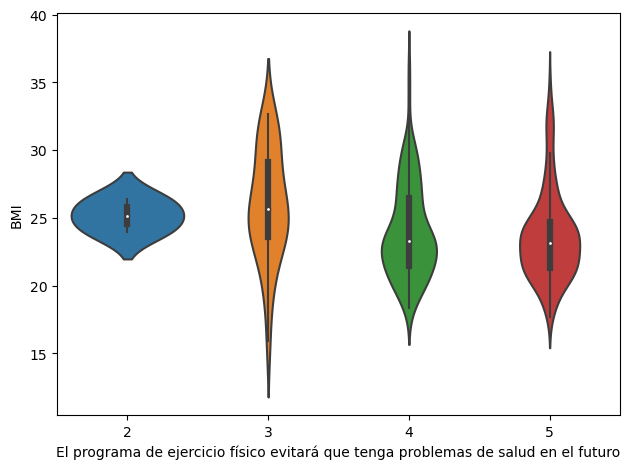

In [533]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[10], 'BMI')

In [534]:
posthocDunn

2    3    4    5
2 1.00 0.85 0.34 0.34
3 0.85 1.00 0.01 0.00
4 0.34 0.01 1.00 0.51
5 0.34 0.00 0.51 1.00

In [535]:
descr

count  mean  std   min   25%   50%   75%   max
2   3.00 25.17 1.23 23.94 24.55 25.17 25.78 26.40
3  30.00 25.93 4.06 15.89 23.59 25.67 29.16 32.65
4 111.00 23.98 3.42 18.31 21.46 23.29 26.46 36.14
5 220.00 23.61 3.29 17.65 21.30 23.17 24.68 35.03

There are significant differences between height for responses:
* 3 and 4 (p = 0.01), median respectively 25.67 (IQR 23.59 - 29.16) and 23.29 (IQR 21.46 - 26.46),
* 3 and 5 (p < 0.005), median respectively 25.67 (IQR 23.59 - 29.16) and 23.17 (IQR 21.3 - 24.68).

* **total_sessions**

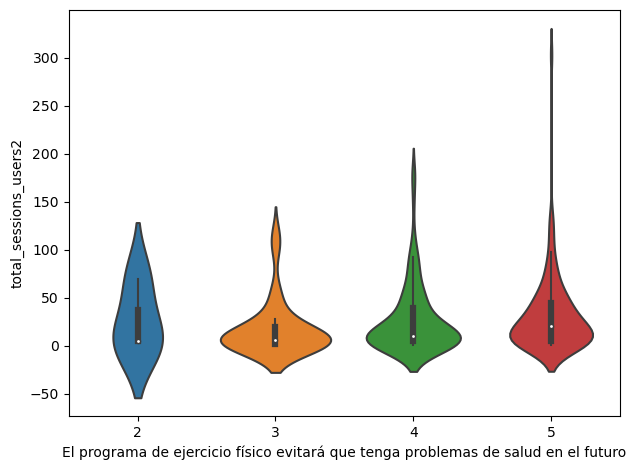

In [536]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[10], 'total_sessions_users2')

In [537]:
posthocDunn

2    3    4    5
2 1.00 0.82 0.99 0.90
3 0.82 1.00 0.21 0.03
4 0.99 0.21 1.00 0.21
5 0.90 0.03 0.21 1.00

In [538]:
descr

count  mean   std  min  25%   50%   75%    max
2   3.00 26.33 36.95 5.00 5.00  5.00 37.00  69.00
3  30.00 17.63 28.48 1.00 2.00  6.00 19.50 116.00
4 111.00 26.95 35.68 1.00 4.50 10.00 39.50 178.00
5 220.00 31.74 40.71 1.00 5.00 20.00 44.25 303.00

There are significant differences between height for responses:
* 3 and 5 (p = 0.03), median respectively 6 (IQR 2 - 19.5) and 20 (IQR 5 - 44.25).

* **total_reps**

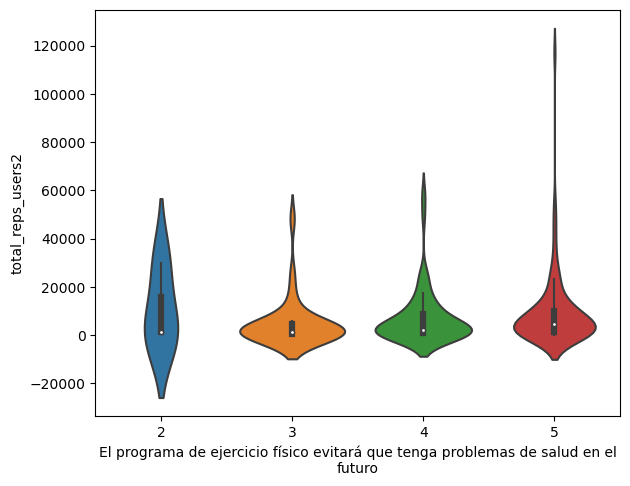

In [539]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[10], 'total_reps_users2')

In [540]:
posthocDunn

2    3    4    5
2 1.00 0.68 0.86 0.86
3 0.68 1.00 0.21 0.03
4 0.86 0.21 1.00 0.17
5 0.86 0.03 0.17 1.00

In [541]:
descr

count     mean      std    min     25%     50%      75%       max
2   3.00 10694.33 16634.40 794.00 1092.00 1390.00 15644.50  29899.00
3  30.00  4822.27  9824.63 107.00  479.50 1399.00  4465.50  48251.00
4 111.00  7202.55 11290.16  18.00  812.00 2304.00  8690.00  58468.00
5 220.00  9215.92 14807.80   8.00 1162.75 4589.50  9978.50 117137.00

There are significant differences between variable by responses:
* 3 and 5 (p = 0.03), median respectively 1399 (IQR 479.5 - 4465.5) and 2589.5 (IQR 1162.75 - 9978.5).

* **total_time**

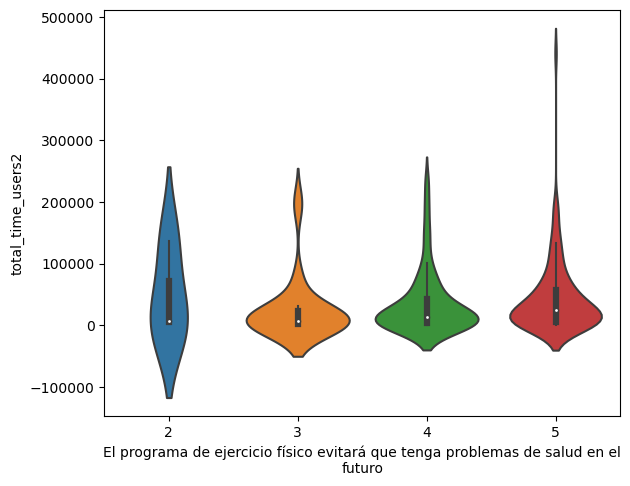

In [542]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[10], 'total_time_users2')

In [543]:
posthocDunn

2    3    4    5
2 1.00 0.74 0.89 0.89
3 0.74 1.00 0.20 0.03
4 0.89 0.20 1.00 0.18
5 0.89 0.03 0.18 1.00

In [544]:
descr

count     mean      std     min     25%      50%      75%       max
2   3.00 48688.50 75546.13 3869.00 5077.50  6286.00 71098.25 135910.50
3  30.00 25506.22 50333.67  570.00 1849.25  6440.00 22862.85 203712.00
4 111.00 36359.39 51720.59  238.00 3511.00 14047.00 43005.00 232835.00
5 220.00 43835.15 59538.89   18.00 5263.50 25213.00 57640.25 441454.00

There are significant differences between total time for responses:
* 3 and 5 (p = 0.03), median respectively 6440 (IQR 1849.25 - 22862.85) seconds and 25213 (IQR 5263.5 - 576400.25) seconds.

* **exercises per user**

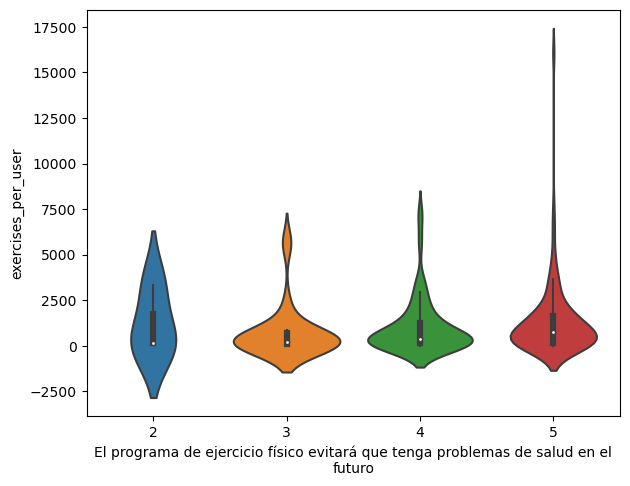

In [545]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[10], 'exercises_per_user')

In [546]:
posthocDunn

2    3    4    5
2 1.00 0.85 0.99 0.87
3 0.85 1.00 0.20 0.03
4 0.99 0.20 1.00 0.18
5 0.87 0.03 0.18 1.00

In [547]:
descr

count    mean     std    min    25%    50%     75%      max
2   3.00 1214.00 1847.32 129.00 147.50 166.00 1756.50  3347.00
3  30.00  743.77 1438.36  23.00  75.25 185.00  717.50  5828.00
4 111.00 1048.14 1516.05  16.00 136.00 371.00 1266.00  7326.00
5 220.00 1314.73 1995.44  15.00 166.00 743.00 1641.25 16069.00

There are significant differences between variable for responses:
* 3 and 5 (p = 0.03), median respectively 185 (IQR 75.25 - 717.5) and 743 (IQR 166 - 1641.25).

* **exercises per user without rest**

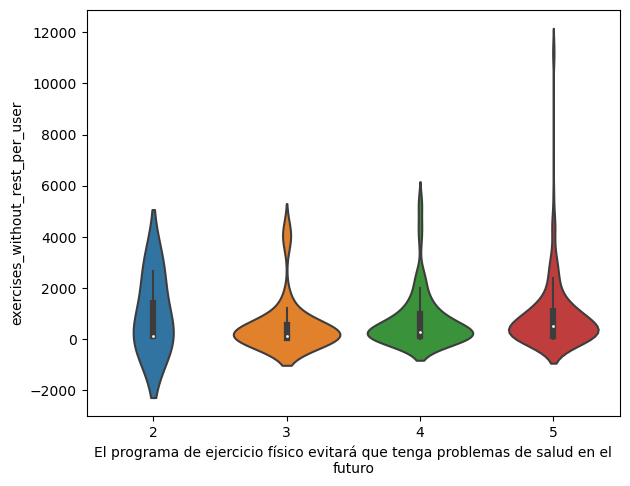

In [548]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[10], 'exercises_without_rest_per_user')

In [549]:
posthocDunn

2    3    4    5
2 1.00 0.83 0.97 0.83
3 0.83 1.00 0.15 0.02
4 0.97 0.15 1.00 0.15
5 0.83 0.02 0.15 1.00

In [550]:
descr

count   mean     std    min    25%    50%     75%      max
2   3.00 962.67 1487.26 101.00 104.00 107.00 1393.50  2680.00
3  30.00 528.77 1024.11  13.00  50.00 109.50  556.50  4264.00
4 111.00 739.72 1072.78   9.00 108.50 276.00  976.00  5324.00
5 220.00 916.04 1396.30   8.00 125.00 525.50 1116.50 11211.00

There are significant differences between variable for responses:
* 3 and 5 (p = 0.02), median respectively 109.5 (IQR 50 - 556.5) and 525.5 (IQR 125 - 1116.5).

* **body_type**

In [551]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[10], 'body_type')

(2, 3): corrected p_value: 0.467416 (ns)
(2, 4): corrected p_value: 0.288553 (ns)
(2, 5): corrected p_value: 0.288553 (ns)
(3, 4): corrected p_value: 0.054829 (ns)
(3, 5): corrected p_value: 0.054829 (ns)
(4, 5): corrected p_value: 0.844954 (ns)


In [552]:
crstab

body_type                                           mid  strong  thin
El programa de ejercicio físico evitará que ten...                   
2                                                     3       0     0
3                                                    18       6     6
4                                                    51       8    52
5                                                   104      19    97

There are no significant differences in gender after post-hoc chi-square test with Hochberg-Bonferonni correction.

### Q12

In [553]:
inf_analysis(df_questionnaire, df_questionnaire.columns[11])

Statistics p-value
Test            Variable                                          
Kruskall-Wallis                                                   
                Height                                2.01    0.73
                Weight                                4.72    0.32
                Body fat                              2.34    0.67
                BMI                                   8.13    0.09
                Total sessions                        4.70    0.32
                Total reps                            4.70    0.32
                Total time                            5.33    0.25
                Reps per session                     11.43    0.02
                Total calories                        5.86    0.21
                Calories per session                  7.34    0.12
                Age                                   4.19    0.38
                Exercises per user                    4.86    0.30
                Exercises without rest per user       5.21    0.27
Chi-square                                                        
                Gender                                1.13    0.89
                Activity level                       25.40    0.00
                Goal                                  8.75    0.36
                Body type                             1.97    0.98
                Notifications seeing                  8.60    0.07
                Newsletter subscription               7.49    0.11

* **reps_per_session**

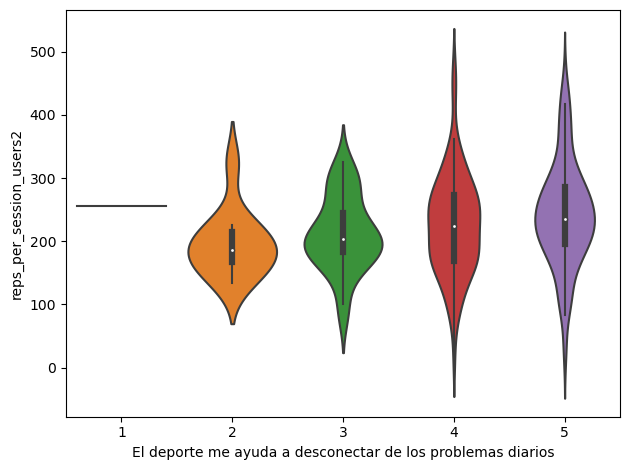

In [554]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[11], 'reps_per_session_users2')

In [555]:
posthocDunn

1    2    3    4    5
1 1.00 0.53 0.53 0.59 0.69
2 0.53 1.00 0.53 0.28 0.16
3 0.53 0.53 1.00 0.53 0.16
4 0.59 0.28 0.53 1.00 0.21
5 0.69 0.16 0.16 0.21 1.00

In [556]:
descr

count   mean   std    min    25%    50%    75%    max
1   1.00 256.14   NaN 256.14 256.14 256.14 256.14 256.14
2  11.00 195.84 52.00 134.00 166.93 185.87 214.54 325.20
3  30.00 212.07 58.48  83.00 182.81 203.72 244.03 325.20
4  95.00 225.58 79.08  18.00 169.42 224.62 272.46 473.11
5 227.00 242.63 83.38   8.00 196.00 235.62 286.08 474.76

There are no significant changes between responses, even though KW test shows significance. The reason is that the adjustment for multiple comparisons is such that a 'raw' p value may be significant, but after controlling for the number of comparisons, the adjusted p value is not significant.

* **body_type**

In [557]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[11], 'body_type')

(1, 2): corrected p_value: 0.991229 (ns)
(1, 3): corrected p_value: 0.991229 (ns)
(1, 4): corrected p_value: 0.991229 (ns)
(1, 5): corrected p_value: 0.991229 (ns)
(2, 3): corrected p_value: 0.991229 (ns)
(2, 4): corrected p_value: 0.991229 (ns)
(2, 5): corrected p_value: 0.991229 (ns)
(3, 4): corrected p_value: 0.991229 (ns)
(3, 5): corrected p_value: 0.991229 (ns)
(4, 5): corrected p_value: 0.991229 (ns)


In [558]:
crstab

body_type                                           mid  strong  thin
El deporte me ayuda a desconectar de los proble...                   
1                                                     1       0     0
2                                                     5       1     5
3                                                    13       3    14
4                                                    44      10    41
5                                                   113      19    95

There are no significant differences in gender after post-hoc chi-square test with Hochberg-Bonferonni correction.

### Q13

In [559]:
inf_analysis(df_questionnaire, df_questionnaire.columns[12])

Statistics p-value
Test            Variable                                          
Kruskall-Wallis                                                   
                Height                                3.29    0.51
                Weight                                1.89    0.76
                Body fat                              5.38    0.25
                BMI                                   5.40    0.25
                Total sessions                        3.86    0.43
                Total reps                            3.86    0.43
                Total time                            5.28    0.26
                Reps per session                      9.88    0.04
                Total calories                        5.11    0.28
                Calories per session                  3.80    0.43
                Age                                   0.52    0.97
                Exercises per user                    4.84    0.30
                Exercises without rest per user       4.27    0.37
Chi-square                                                        
                Gender                                2.67    0.61
                Activity level                       14.62    0.07
                Goal                                 12.09    0.15
                Body type                             7.94    0.44
                Notifications seeing                  7.48    0.11
                Newsletter subscription               2.97    0.56

* **reps_per_session**

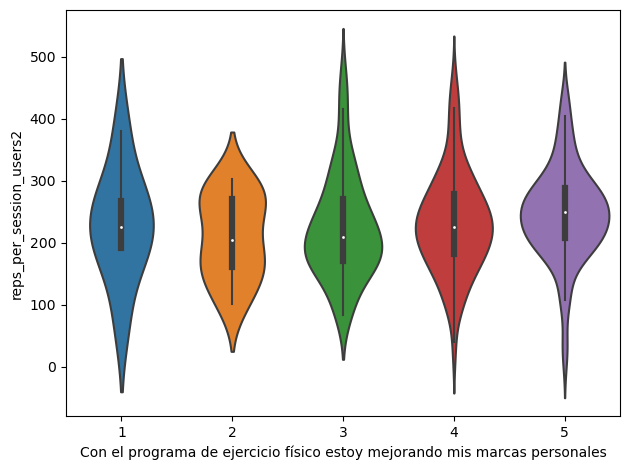

In [560]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[12], 'reps_per_session_users2')

In [561]:
posthocDunn

1    2    3    4    5
1 1.00 0.81 0.81 0.98 0.80
2 0.81 1.00 0.81 0.64 0.16
3 0.81 0.81 1.00 0.64 0.06
4 0.98 0.64 0.64 1.00 0.16
5 0.80 0.16 0.06 0.16 1.00

In [562]:
descr

count   mean   std    min    25%    50%    75%    max
1   8.00 229.06 88.37  76.00 191.89 226.07 267.62 380.67
2  18.00 209.50 67.45 100.33 161.62 205.03 270.35 303.05
3  76.00 224.45 84.62  83.00 170.71 209.60 270.84 474.76
4 146.00 232.84 82.22  18.00 182.16 226.00 278.00 473.11
5 116.00 246.74 75.38   8.00 207.22 249.91 288.15 433.32

There are no significant changes between responses, even though KW test shows significance. The reason is that the adjustment for multiple comparisons is such that a 'raw' p value may be significant, but after controlling for the number of comparisons, the adjusted p value is not significant.

### Q14

In [563]:
inf_analysis(df_questionnaire, df_questionnaire.columns[13])

Statistics p-value
Test            Variable                                          
Kruskall-Wallis                                                   
                Height                               17.73    0.00
                Weight                                8.58    0.07
                Body fat                              3.18    0.53
                BMI                                   3.34    0.50
                Total sessions                        3.88    0.42
                Total reps                            3.88    0.42
                Total time                            4.69    0.32
                Reps per session                      8.74    0.07
                Total calories                        5.81    0.21
                Calories per session                 15.63    0.00
                Age                                   4.57    0.33
                Exercises per user                    4.00    0.41
                Exercises without rest per user       3.61    0.46
Chi-square                                                        
                Gender                               14.35    0.01
                Activity level                        9.93    0.27
                Goal                                 11.57    0.17
                Body type                             7.78    0.45
                Notifications seeing                  4.11    0.39
                Newsletter subscription               7.66    0.10

* **height**

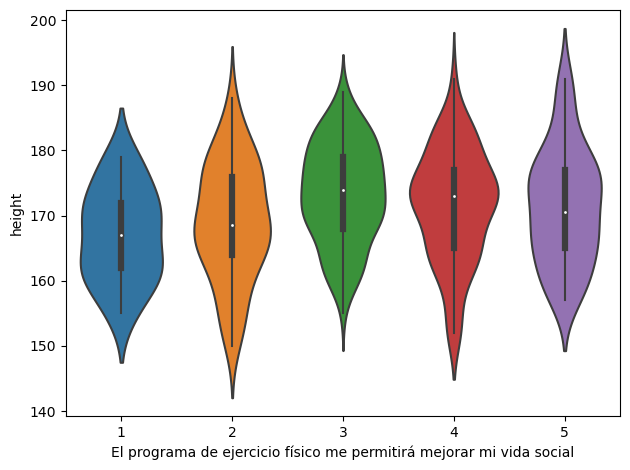

In [564]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[13], 'height')

In [565]:
posthocDunn

1    2    3    4    5
1 1.00 0.27 0.01 0.04 0.08
2 0.27 1.00 0.01 0.16 0.27
3 0.01 0.01 1.00 0.25 0.16
4 0.04 0.16 0.25 1.00 0.70
5 0.08 0.27 0.16 0.70 1.00

In [566]:
descr

count   mean  std    min    25%    50%    75%    max
1  25.00 167.00 7.15 155.00 162.00 167.00 172.00 179.00
2  58.00 169.03 8.96 150.00 164.00 168.50 176.00 188.00
3 136.00 173.34 7.62 155.00 168.00 174.00 179.00 189.00
4  81.00 171.56 8.57 152.00 165.00 173.00 177.00 191.00
5  64.00 171.47 8.87 157.00 165.00 170.50 177.00 191.00

There are significant differences between height for responses:
* 1 and 3 (p = 0.01) median respectively 167 (IQR 162 - 172) and 174 (IQR 168 - 179),
* 1 and 4 (p = 0.04) median respectively 167 (IQR 162 - 172) and 173 (IQR 165 - 177),
* 2 and 3 (p = 0.01), median respectively 165.5 (IQR 156.25 - 170) and 174 (IQR 168 - 179).

* **calories per session**

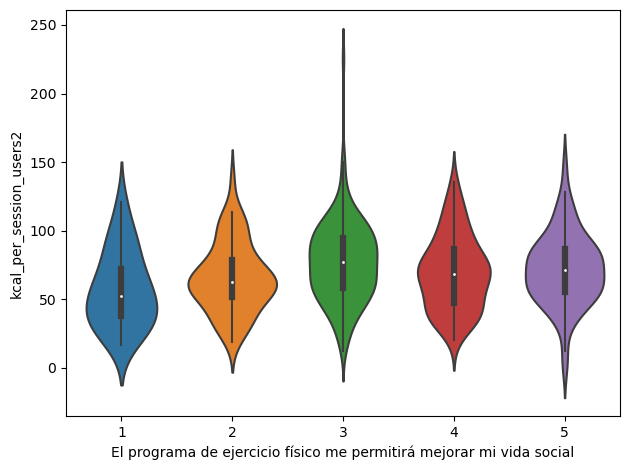

In [567]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[13], 'kcal_per_session_users2')

In [568]:
posthocDunn

1    2    3    4    5
1 1.00 0.28 0.01 0.10 0.05
2 0.28 1.00 0.04 0.45 0.25
3 0.01 0.04 1.00 0.10 0.37
4 0.10 0.45 0.10 1.00 0.48
5 0.05 0.25 0.37 0.48 1.00

In [569]:
descr

count  mean   std   min   25%   50%   75%    max
1  25.00 57.17 27.84 16.58 37.48 52.04 71.78 120.88
2  58.00 65.66 25.23 19.05 51.86 62.55 78.48 136.57
3 136.00 76.98 29.44 12.22 57.74 77.42 94.77 225.40
4  81.00 69.36 26.98 20.46 47.31 68.38 86.57 135.27
5  64.00 72.10 26.25  0.87 54.93 71.43 86.62 147.46

There are significant differences between height for responses:
* 1 and 3 (p = 0.01) median respectively 52.04 (IQR 37.48 - 71.78) and 77.42 (IQR 57.74 - 94.77),
* 1 and 5 (p = 0.05 - borderline) median respectively 52.04 (IQR 37.48 - 71.78) and 71.43 (IQR 54.93 - 86.62),
* 2 and 3 (p = 0.04), median respectively 62.55 (IQR 51.86 - 78.48) and 77.42 (IQR 57.74 - 94.77).

* **gender**

In [570]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[13], 'gender')

(1, 2): corrected p_value: 0.462332 (ns)
(1, 3): corrected p_value: 0.024817 (*)
(1, 4): corrected p_value: 0.105977 (ns)
(1, 5): corrected p_value: 0.258645 (ns)
(2, 3): corrected p_value: 0.067040 (ns)
(2, 4): corrected p_value: 0.294632 (ns)
(2, 5): corrected p_value: 0.549646 (ns)
(3, 4): corrected p_value: 0.462332 (ns)
(3, 5): corrected p_value: 0.258645 (ns)
(4, 5): corrected p_value: 0.646022 (ns)


In [571]:
crstab

gender                                              female  male
El programa de ejercicio físico me permitirá me...              
1                                                       16     9
2                                                       29    29
3                                                       41    95
4                                                       30    51
5                                                       27    37

There are differences in gender between people that gave the answers
* 1 and 3.

### Q15

In [572]:
inf_analysis(df_questionnaire, df_questionnaire.columns[14])

Statistics p-value
Test            Variable                                          
Kruskall-Wallis                                                   
                Height                                4.60    0.33
                Weight                                5.38    0.25
                Body fat                              4.15    0.39
                BMI                                   4.90    0.30
                Total sessions                        1.31    0.86
                Total reps                            1.31    0.86
                Total time                            1.60    0.81
                Reps per session                      4.69    0.32
                Total calories                        1.76    0.78
                Calories per session                  5.22    0.27
                Age                                   1.43    0.84
                Exercises per user                    1.41    0.84
                Exercises without rest per user       1.18    0.88
Chi-square                                                        
                Gender                                6.97    0.14
                Activity level                       16.06    0.04
                Goal                                  6.85    0.55
                Body type                             4.62    0.80
                Notifications seeing                 10.78    0.03
                Newsletter subscription               1.67    0.80

* **activity level**

In [573]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[14], 'activity_level')

(1, 2): corrected p_value: 0.923355 (ns)
(1, 3): corrected p_value: 0.322034 (ns)
(1, 4): corrected p_value: 0.231553 (ns)
(1, 5): corrected p_value: 0.231553 (ns)
(2, 3): corrected p_value: 0.049556 (*)
(2, 4): corrected p_value: 0.033546 (*)
(2, 5): corrected p_value: 0.033546 (*)
(3, 4): corrected p_value: 0.923355 (ns)
(3, 5): corrected p_value: 0.860034 (ns)
(4, 5): corrected p_value: 0.923355 (ns)


In [574]:
crstab

activity_level                                      active  sedentary  \
Compito mucho mejor siguiendo el programa de ej...                      
1                                                        8          8   
2                                                       12         15   
3                                                       76         33   
4                                                       59         23   
5                                                       57         23   

activity_level                                      very active  
Compito mucho mejor siguiendo el programa de ej...               
1                                                             1  
2                                                             1  
3                                                            16  
4                                                            15  
5                                                            17

There are differences in gender between people that gave the answers
* 2 and 3,
* 2 and 4,
* 2 and 5.

* **notification_setting**

In [575]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[14], 'notification_setting', plot = False)

In [576]:
crstab

There are differences in gender between people that gave the answers
* 1 and 3.

### Q16

In [577]:
inf_analysis(df_questionnaire, df_questionnaire.columns[15])

Statistics p-value
Test            Variable                                          
Kruskall-Wallis                                                   
                Height                                5.16    0.27
                Weight                               18.23    0.00
                Body fat                              8.35    0.08
                BMI                                  19.61    0.00
                Total sessions                       15.81    0.00
                Total reps                           15.81    0.00
                Total time                           19.79    0.00
                Reps per session                     25.18    0.00
                Total calories                       16.85    0.00
                Calories per session                  7.33    0.12
                Age                                   4.81    0.31
                Exercises per user                   18.54    0.00
                Exercises without rest per user      18.45    0.00
Chi-square                                                        
                Gender                                9.96    0.04
                Activity level                       15.48    0.05
                Goal                                  6.42    0.60
                Body type                             8.79    0.36
                Notifications seeing                  6.28    0.18
                Newsletter subscription               7.55    0.11

* **weight**

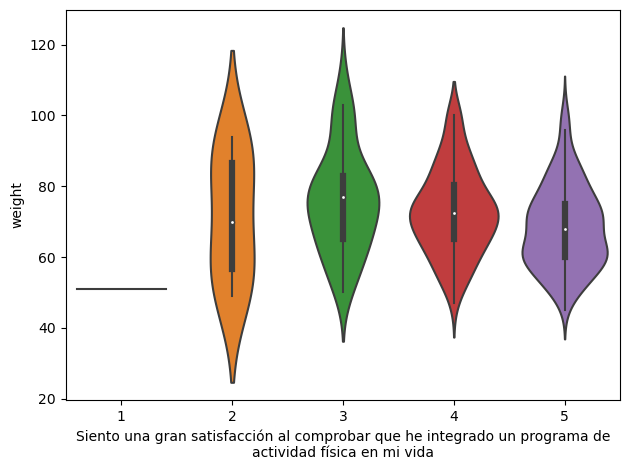

In [578]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[15], 'weight')

In [579]:
posthocDunn

1    2    3    4    5
1 1.00 0.25 0.17 0.18 0.25
2 0.25 1.00 0.48 0.64 0.64
3 0.17 0.48 1.00 0.48 0.01
4 0.18 0.64 0.48 1.00 0.01
5 0.25 0.64 0.01 0.01 1.00

In [580]:
descr

count  mean   std   min   25%   50%   75%    max
1   1.00 51.00   NaN 51.00 51.00 51.00 51.00  51.00
2   7.00 71.29 18.00 49.00 56.50 70.00 86.50  94.00
3  43.00 75.93 14.63 50.00 65.00 77.00 83.00 111.00
4 104.00 72.91 12.18 47.00 65.00 72.50 80.25 100.00
5 209.00 68.47 11.84 45.00 60.00 68.00 75.00 103.00

There are significant differences between weight for responses:
* 3 and 5 (p = 0.01), median respectively 77 (IQR 65 - 83) and 68 (IQR 60 - 75),
* 4 and 5 (p = 0.01), median respectively 72.5 (IQR 65 - 80.25) and 68 (IQR 60 - 75).

* **BMI**

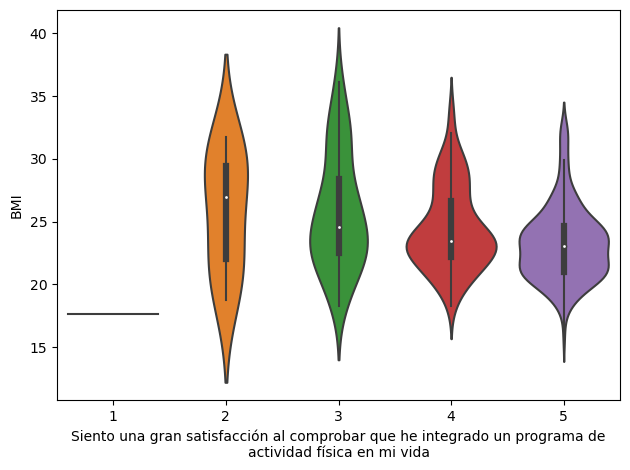

In [581]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[15], 'BMI')

In [582]:
posthocDunn

1    2    3    4    5
1 1.00 0.12 0.12 0.12 0.20
2 0.12 1.00 0.98 0.64 0.20
3 0.12 0.98 1.00 0.31 0.01
4 0.12 0.64 0.31 1.00 0.02
5 0.20 0.20 0.01 0.02 1.00

In [583]:
descr

count  mean  std   min   25%   50%   75%   max
1   1.00 17.65  NaN 17.65 17.65 17.65 17.65 17.65
2   7.00 25.78 4.85 18.78 22.04 27.01 29.41 31.77
3  43.00 25.72 4.58 18.31 22.50 24.57 28.38 36.14
4 104.00 24.48 3.33 18.31 22.21 23.50 26.62 33.87
5 209.00 23.25 2.94 15.89 21.01 23.10 24.62 32.51

There are significant differences between BMI for responses:
* 3 and 5 (p = 0.01), median respectively 24.57 (IQR 22.5 - 28.38) and 23.1 (IQR 21.01 - 24.62),
* 4 and 5 (p = 0.02), median respectively 23.5 (IQR 22.21 - 26.62) and 23.1 (IQR 21.01 - 24.62)).

* **total_sessions**

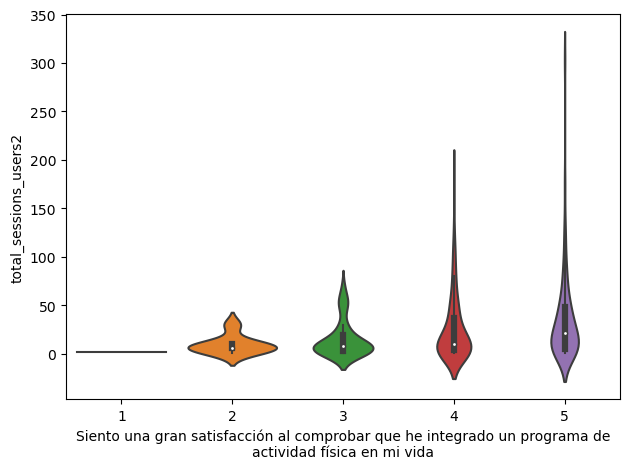

In [584]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[15], 'total_sessions_users2')

In [585]:
posthocDunn

1    2    3    4    5
1 1.00 0.52 0.47 0.43 0.38
2 0.52 1.00 0.75 0.47 0.30
3 0.47 0.75 1.00 0.38 0.02
4 0.43 0.47 0.38 1.00 0.09
5 0.38 0.30 0.02 0.09 1.00

In [586]:
descr

count  mean   std  min  25%   50%   75%    max
1   1.00  2.00   NaN 2.00 2.00  2.00  2.00   2.00
2   7.00  9.71  9.48 1.00 5.50  6.00 10.00  30.00
3  43.00 15.02 18.16 1.00 3.00  8.00 19.00  69.00
4 104.00 26.03 33.62 1.00 4.00 10.00 36.50 184.00
5 209.00 34.25 43.08 1.00 5.00 21.00 48.00 303.00

There are significant differences between the variable for responses:
* 3 and 5 (p = 0.02), median respectively 8 (IQR 3 - 19) and 21 (IQR 5 - 48).

* **total_reps**

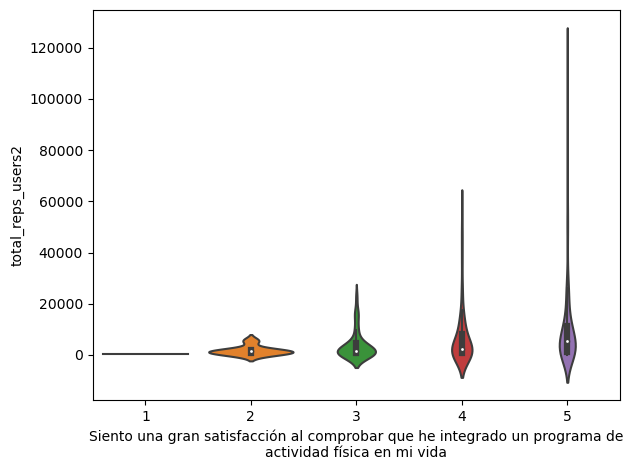

In [587]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[15], 'total_reps_users2')

In [588]:
posthocDunn

1    2    3    4    5
1 1.00 0.63 0.53 0.41 0.33
2 0.63 1.00 0.64 0.40 0.14
3 0.53 0.64 1.00 0.33 0.00
4 0.41 0.40 0.33 1.00 0.04
5 0.33 0.14 0.00 0.04 1.00

In [589]:
descr

count    mean      std    min     25%     50%      75%       max
1   1.00  448.00      NaN 448.00  448.00  448.00   448.00    448.00
2   7.00 1786.57  1774.41 108.00  933.50 1405.00  1775.00   5576.00
3  43.00 3719.00  5276.30  76.00  597.50 1445.00  4489.50  22612.00
4 104.00 7164.53 11106.81  18.00  711.50 2377.00  8292.00  55761.00
5 209.00 9979.68 15537.42   8.00 1333.00 5352.00 11287.00 117137.00

There are significant differences between variable by responses:
* 3 and 5 (p < 0.005), median respectively 1445 (IQR 597.5 - 4489.5) and 5352 (IQR 1333 - 11287),
* 4 and 5 (p = 0.04), median respectively 2377 (IQR 711.5 - 8292) and 5352 (IQR 1333 - 11287).

* **total_time**

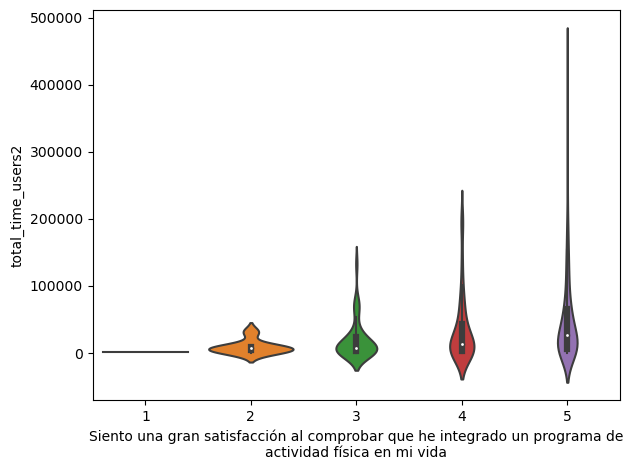

In [590]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[15], 'total_time_users2')

In [591]:
posthocDunn

1    2    3    4    5
1 1.00 0.65 0.59 0.43 0.36
2 0.65 1.00 0.65 0.36 0.14
3 0.59 0.65 1.00 0.24 0.00
4 0.43 0.36 0.24 1.00 0.06
5 0.36 0.14 0.00 0.06 1.00

In [592]:
descr

count     mean      std     min     25%      50%      75%       max
1   1.00  2279.00      NaN 2279.00 2279.00  2279.00  2279.00   2279.00
2   7.00  9388.36 10211.34  391.00 4532.00  7479.00  8614.00  31556.50
3  43.00 18883.86 27576.37  306.00 2973.50  7047.00 24448.40 133026.00
4 104.00 35299.37 49407.66  306.00 3511.00 13848.25 43338.62 203712.00
5 209.00 48037.03 63539.36   18.00 6286.00 26909.00 65061.00 441454.00

There are significant differences between total time for responses:
* 3 and 5 (p < 0.005), median respectively 7047 (IQR 2973.5 - 24448.4) seconds and 26909 (IQR 6286 - 65061) seconds.

* **reps_per_session**

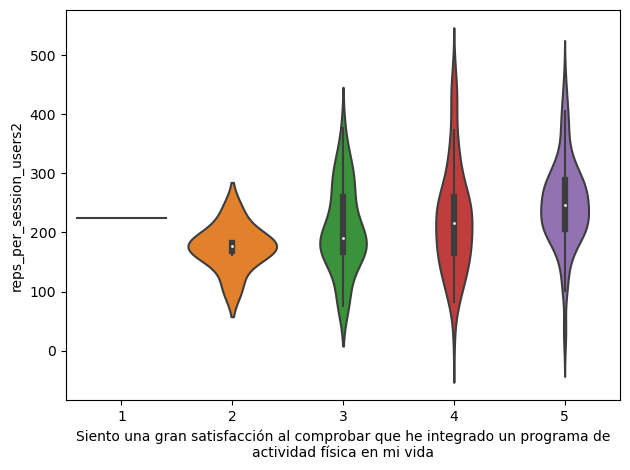

In [593]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[15], 'reps_per_session_users2')

In [594]:
posthocDunn

1    2    3    4    5
1 1.00 0.68 0.90 0.96 0.90
2 0.68 1.00 0.39 0.17 0.01
3 0.90 0.39 1.00 0.51 0.00
4 0.96 0.17 0.51 1.00 0.00
5 0.90 0.01 0.00 0.00 1.00

In [595]:
descr

count   mean   std    min    25%    50%    75%    max
1   1.00 224.00   NaN 224.00 224.00 224.00 224.00 224.00
2   7.00 174.37 37.24 108.00 168.10 176.83 182.71 234.17
3  43.00 205.79 72.28  76.00 167.50 190.50 259.65 377.27
4 104.00 223.24 90.32  18.00 164.64 216.03 260.08 474.76
5 209.00 247.70 74.72   8.00 206.13 246.00 289.00 473.11

There are significant differences between variable for responses:
* 2 and 5 (p = 0.01), median respectively 176.83 (IQR 168.1 - 182.71) and 246 (IQR 206.13 - 289),
* 3 and 5 (p < 0.005), median respectively 190.5 (IQR 167.5 - 259.65) and 246 (IQR 206.13 - 289),
* 4 and 5 (p < 0.005), median respectively 216.03 (IQR 164.64 - 260.08) and 246 (IQR 206.13 - 289).

* **total calories**

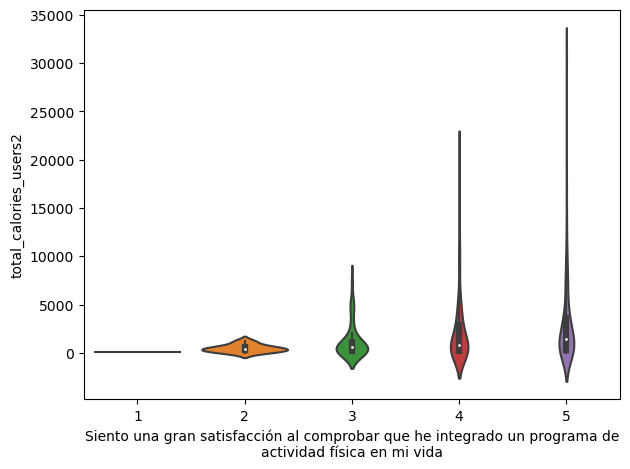

In [597]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[15], 'total_calories_users2')

In [598]:
posthocDunn

1    2    3    4    5
1 1.00 0.51 0.41 0.31 0.29
2 0.51 1.00 0.51 0.29 0.13
3 0.41 0.51 1.00 0.29 0.02
4 0.31 0.29 0.29 1.00 0.13
5 0.29 0.13 0.02 0.13 1.00

In [599]:
descr

count    mean     std   min    25%     50%     75%      max
1   1.00   85.01     NaN 85.01  85.01   85.01   85.01    85.01
2   7.00  480.66  386.27 29.59 242.70  391.56  631.79  1194.53
3  43.00 1209.04 1729.58 19.05 187.31  562.96 1135.47  7445.02
4 104.00 2217.33 3350.48 22.04 160.95  814.27 2929.06 20341.14
5 209.00 2952.69 4297.09  0.87 290.22 1396.15 3586.70 30715.99

There are significant differences between variable for responses:
* 3 and 5 (p = 0.02), median respectively 562.96 (IQR 187.31 - 1135.47) and 1396.15 (IQR 290.22 - 3586.7).

* **exercises per user**

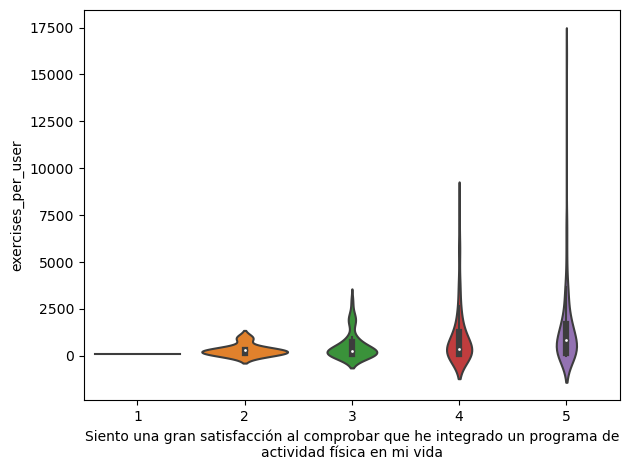

In [600]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[15], 'exercises_per_user')

In [601]:
posthocDunn

1    2    3    4    5
1 1.00 0.58 0.52 0.42 0.33
2 0.58 1.00 0.73 0.42 0.21
3 0.52 0.73 1.00 0.33 0.01
4 0.42 0.42 0.33 1.00 0.06
5 0.33 0.21 0.01 0.06 1.00

In [602]:
descr

count    mean     std   min    25%    50%     75%      max
1   1.00   74.00     NaN 74.00  74.00  74.00   74.00    74.00
2   7.00  314.00  301.69 24.00 145.50 294.00  320.00   949.00
3  43.00  536.60  700.18 19.00 103.50 237.00  734.00  2911.00
4 104.00 1059.03 1564.83 20.00 110.50 373.50 1266.00  8039.00
5 209.00 1416.52 2071.38 15.00 178.00 837.00 1682.00 16069.00

There are significant differences between variable for responses:
* 3 and 5 (p = 0.01), median respectively 237 (IQR 103.5 - 734) and 837 (IQR 178 - 1682).

* **exercises per user without rest**

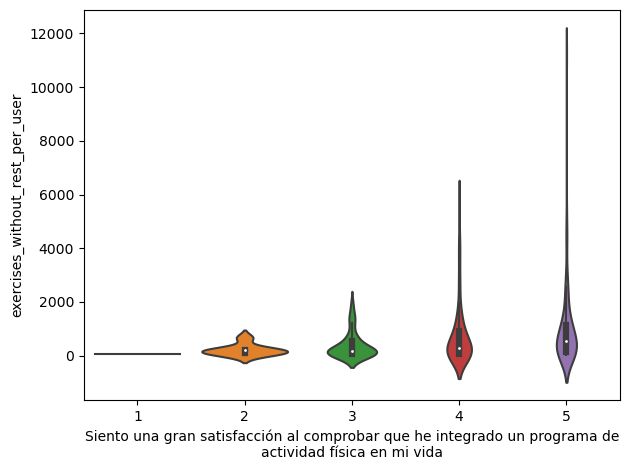

In [603]:
posthocDunn, descr = post_hoc_check(df_questionnaire, df_questionnaire.columns[15],
                                    'exercises_without_rest_per_user')

In [604]:
posthocDunn

1    2    3    4    5
1 1.00 0.57 0.51 0.44 0.32
2 0.57 1.00 0.75 0.44 0.23
3 0.51 0.75 1.00 0.32 0.01
4 0.44 0.44 0.32 1.00 0.06
5 0.32 0.23 0.01 0.06 1.00

In [605]:
descr

count   mean     std   min    25%    50%     75%      max
1   1.00  51.00     NaN 51.00  51.00  51.00   51.00    51.00
2   7.00 223.14  210.13 24.00 111.00 195.00  226.50   668.00
3  43.00 376.65  478.08 13.00  78.00 174.00  541.00  1942.00
4 104.00 746.91 1098.11 13.00  71.00 282.50  929.25  5665.00
5 209.00 989.95 1457.01  8.00 132.00 556.00 1149.00 11211.00

There are significant differences between variable for responses:
* 3 and 5 (p = 0.01), median respectively 174 (IQR 78 - 541) and 556 (IQR 132 - 1149).

* **gender**

In [606]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[15], 'gender')

(1, 2): corrected p_value: 1.000000 (ns)
(1, 3): corrected p_value: 0.978778 (ns)
(1, 4): corrected p_value: 0.978778 (ns)
(1, 5): corrected p_value: 1.000000 (ns)
(2, 3): corrected p_value: 0.978778 (ns)
(2, 4): corrected p_value: 0.978778 (ns)
(2, 5): corrected p_value: 0.978778 (ns)
(3, 4): corrected p_value: 0.978778 (ns)
(3, 5): corrected p_value: 0.978778 (ns)
(4, 5): corrected p_value: 0.108461 (ns)


In [607]:
crstab

gender                                              female  male
Siento una gran satisfacción al comprobar que h...              
1                                                        1     0
2                                                        4     3
3                                                       15    28
4                                                       30    74
5                                                       93   116

There are no significant differences in gender after post-hoc chi-square test with Hochberg-Bonferonni correction.

* **activity_level**

In [608]:
crstab = post_hoc_check(df_questionnaire, df_questionnaire.columns[15], 'activity_level')

(1, 2): corrected p_value: 0.826565 (ns)
(1, 3): corrected p_value: 0.554637 (ns)
(1, 4): corrected p_value: 0.474866 (ns)
(1, 5): corrected p_value: 0.407473 (ns)
(2, 3): corrected p_value: 0.407473 (ns)
(2, 4): corrected p_value: 0.304766 (ns)
(2, 5): corrected p_value: 0.103271 (ns)
(3, 4): corrected p_value: 0.658329 (ns)
(3, 5): corrected p_value: 0.304766 (ns)
(4, 5): corrected p_value: 0.474866 (ns)


In [609]:
crstab

activity_level                                      active  sedentary  \
Siento una gran satisfacción al comprobar que h...                      
1                                                        0          1   
2                                                        1          5   
3                                                       20         16   
4                                                       58         32   
5                                                      133         48   

activity_level                                      very active  
Siento una gran satisfacción al comprobar que h...               
1                                                             0  
2                                                             1  
3                                                             7  
4                                                            14  
5                                                            28

There are no significant differences in activity_level after post-hoc chi-square test with Hochberg-Bonferonni correction.

### Correlation

#### Spearman

In [650]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [659]:
# Correlation plots and table definition

def corr_heatmap_p(df, second_plot = True, table = False):
    rho, p = stats.spearmanr(df)
    
    rho = pd.DataFrame(rho).set_index(pd.Index(df.columns))
    rho.columns = df.columns
    
    p = pd.DataFrame(p).set_index(pd.Index(df.columns))
    p.columns = df.columns
    
    plt.figure(figsize=(12,7))
    heatmap = sns.heatmap(rho, vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    plt.tight_layout()
    
    if second_plot == True:
        s = set_title = np.vectorize(lambda ax,rho2: ax.title.set_text(
                                            '$\\rho$ = ' + 
                                            "{:.2f}".format(rho2)) if ax!=None else None
                                )      

        rho2 = df.corr(method="spearman")
    
        g = sns.PairGrid(df,corner=True)
        g.map_diag(plt.hist,color="yellow")
        g.map_lower(sns.scatterplot,color="magenta")
        set_title(g.axes,rho2)
        plt.subplots_adjust(hspace = 0.6)
        plt.show()
    
    if table == True:
    
        for col in rho.columns:
            rho[col] = np.where((p[col] <= 0.05) & (p[col] > 0.01) & (col != rho.index),
                                              rho[col].round(2).astype('str') + '*', 
                                              np.where((p[col] <= 0.01) & (p[col] > 0.001) & (col != rho.index),
                                              rho[col].round(2).astype('str') + '**', 
                                              np.where((p[col] <= 0.001) & (col != rho.index),
                                              rho[col].round(2).astype('str') + '***', 
                                              rho[col])))
        
    

    return(rho)

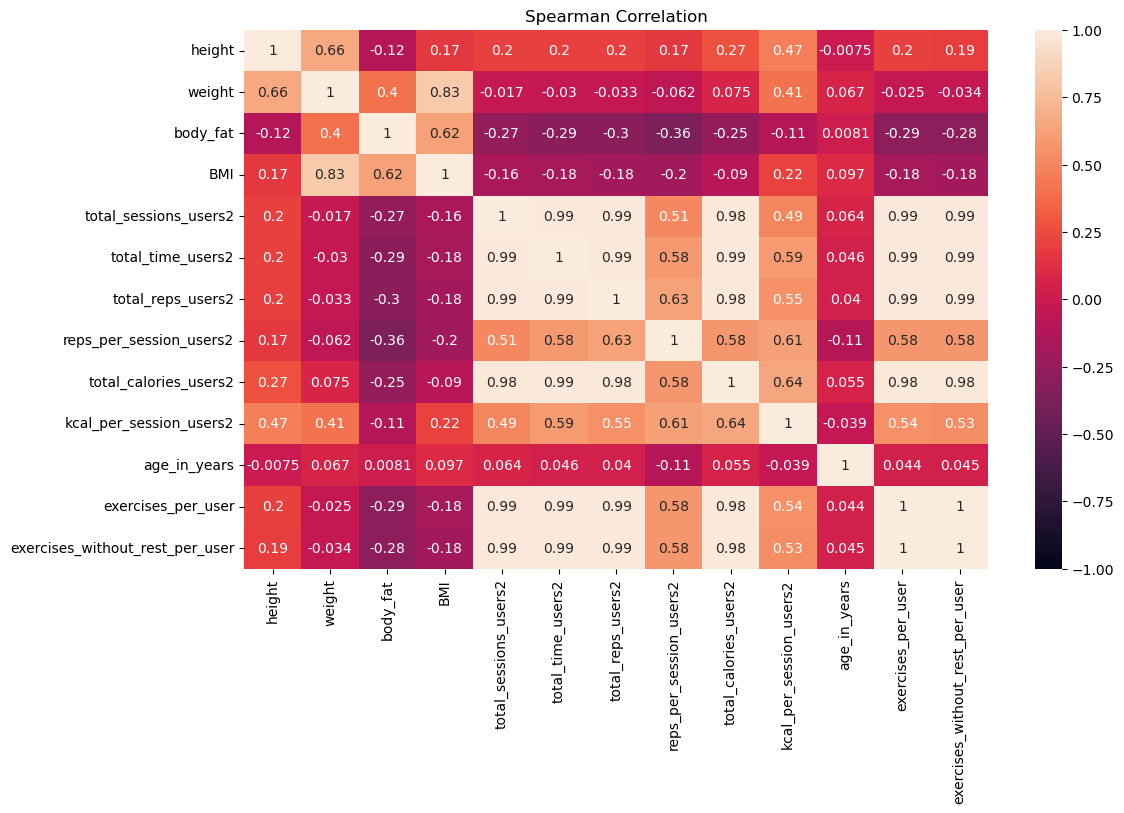

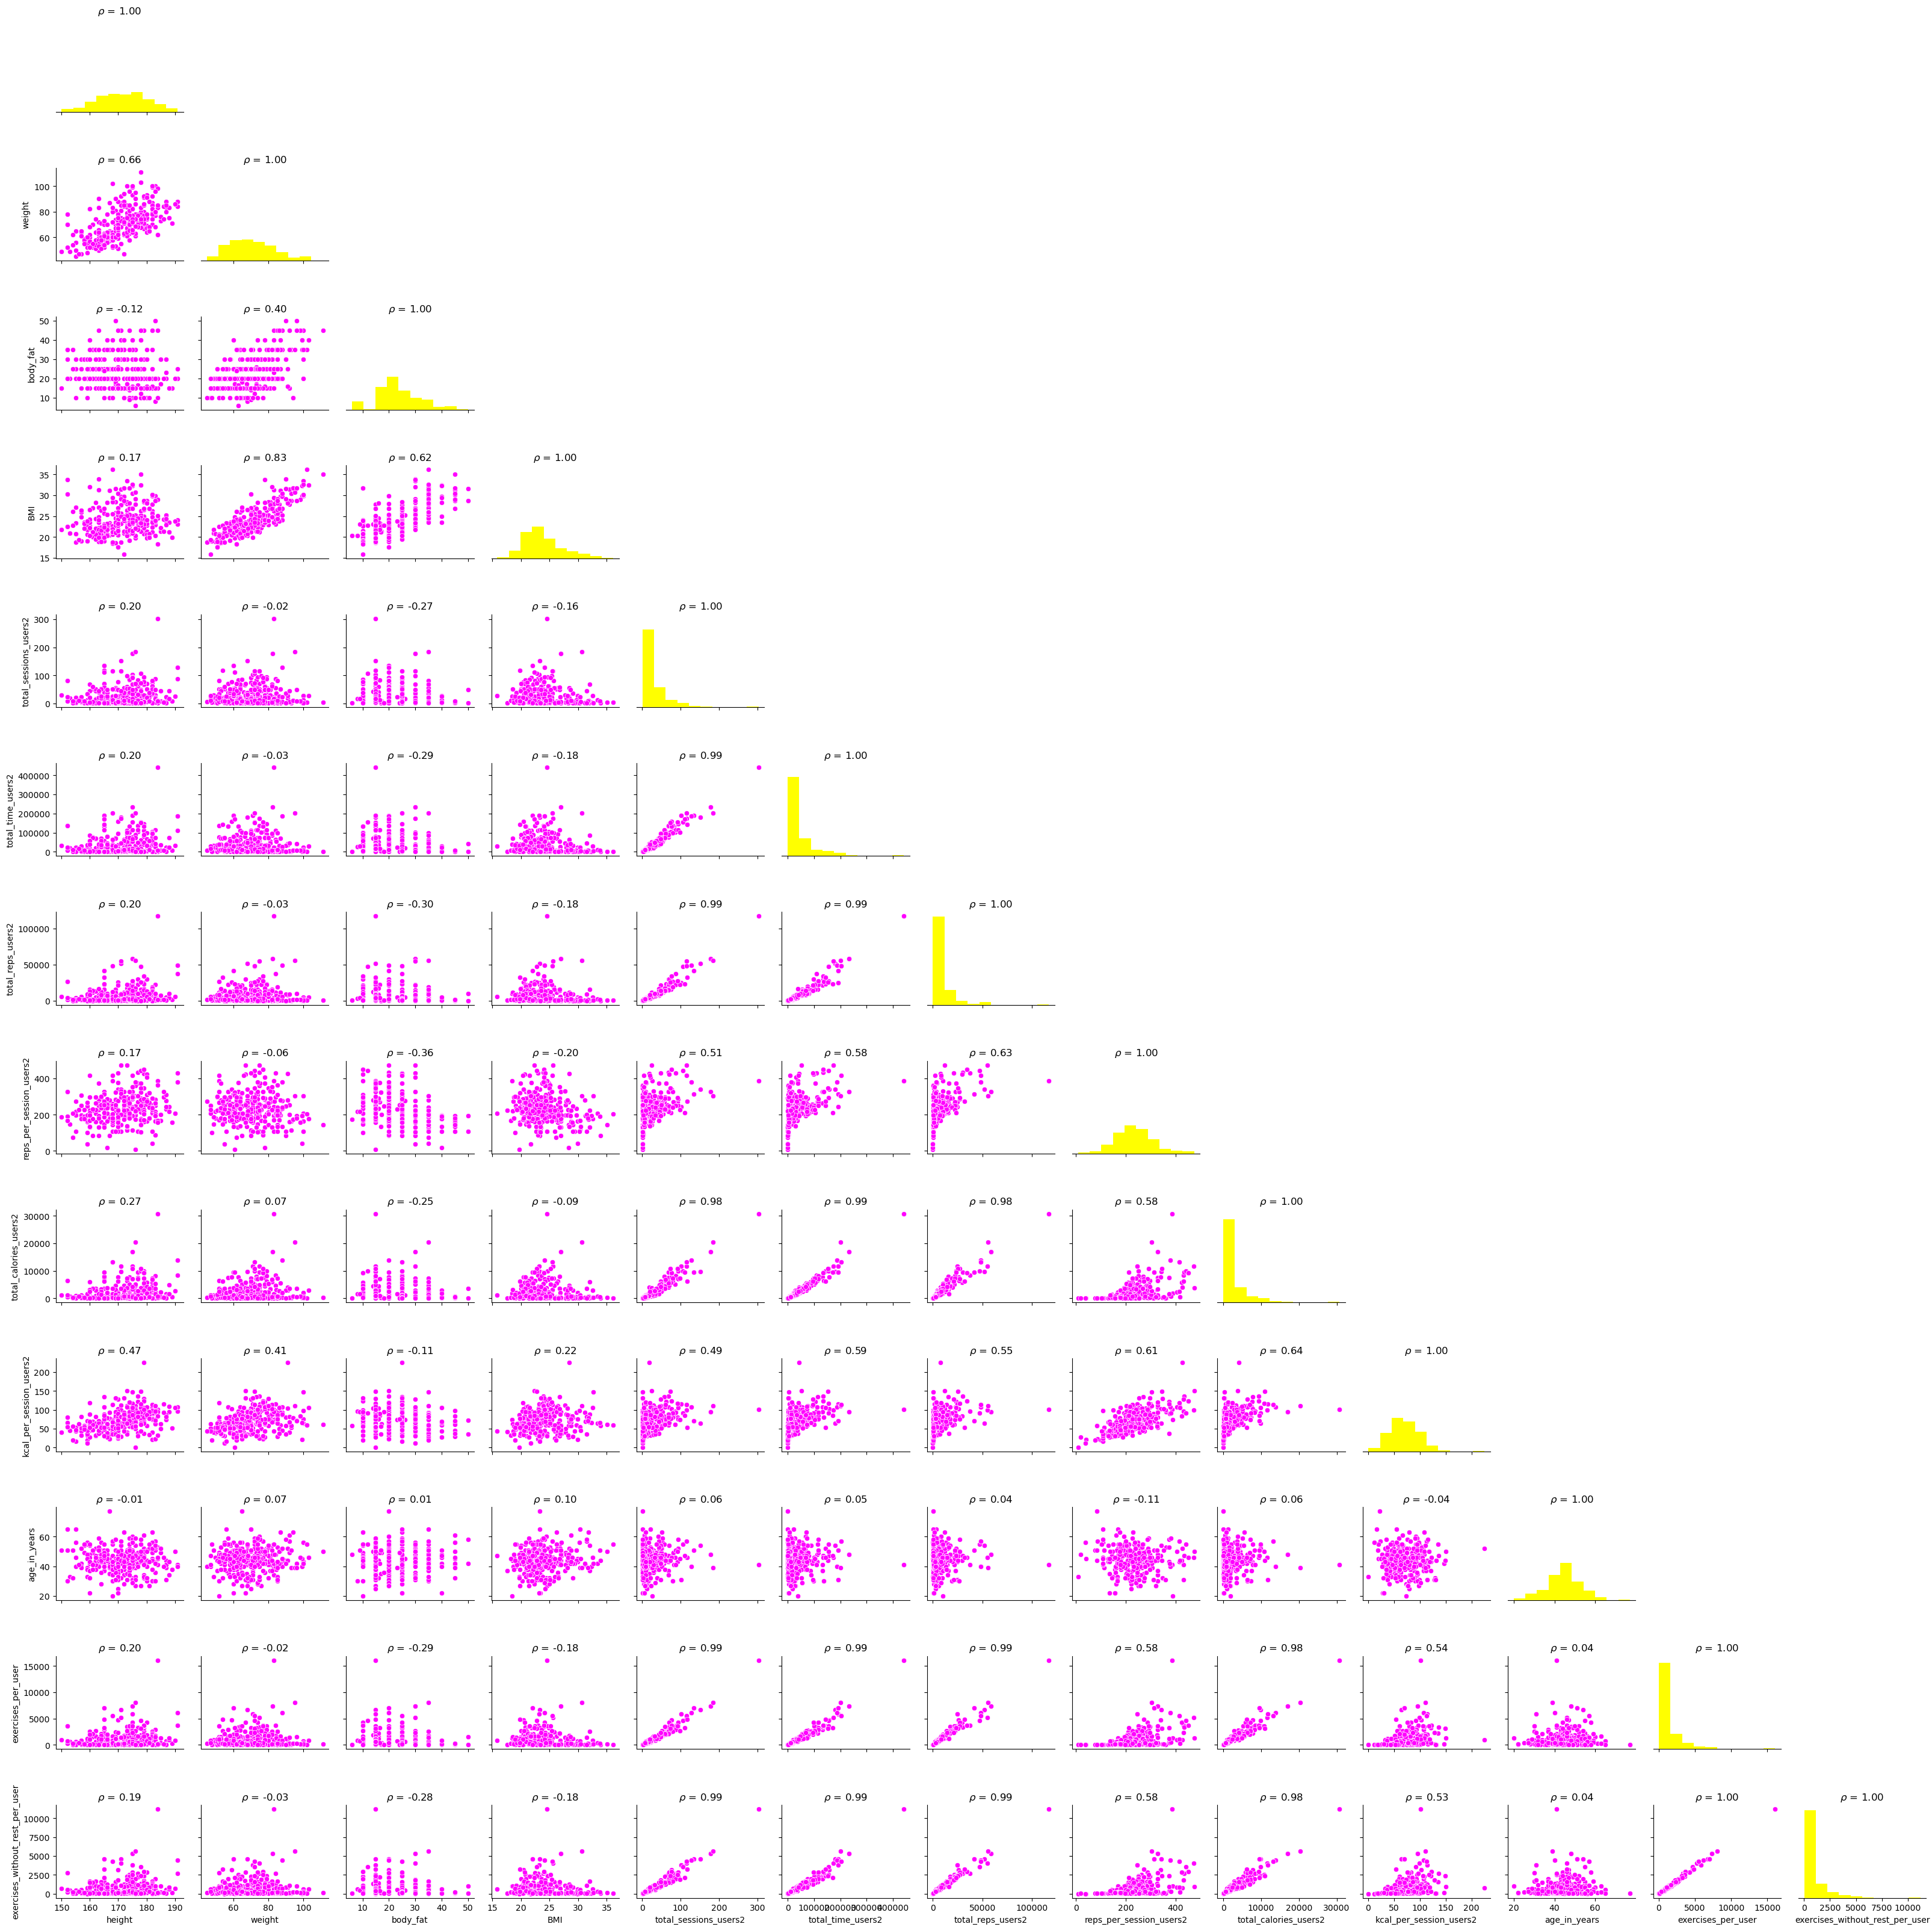

height  weight  body_fat   BMI  \
height                             1.00    0.66     -0.12  0.17   
weight                             0.66    1.00      0.40  0.83   
body_fat                          -0.12    0.40      1.00  0.62   
BMI                                0.17    0.83      0.62  1.00   
total_sessions_users2              0.20   -0.02     -0.27 -0.16   
total_time_users2                  0.20   -0.03     -0.29 -0.18   
total_reps_users2                  0.20   -0.03     -0.30 -0.18   
reps_per_session_users2            0.17   -0.06     -0.36 -0.20   
total_calories_users2              0.27    0.07     -0.25 -0.09   
kcal_per_session_users2            0.47    0.41     -0.11  0.22   
age_in_years                      -0.01    0.07      0.01  0.10   
exercises_per_user                 0.20   -0.02     -0.29 -0.18   
exercises_without_rest_per_user    0.19   -0.03     -0.28 -0.18   

                                 total_sessions_users2  total_time_users2  \
height                                            0.20               0.20   
weight                                           -0.02              -0.03   
body_fat                                         -0.27              -0.29   
BMI                                              -0.16              -0.18   
total_sessions_users2                             1.00               0.99   
total_time_users2                                 0.99               1.00   
total_reps_users2                                 0.99               0.99   
reps_per_session_users2                           0.51               0.58   
total_calories_users2                             0.98               0.99   
kcal_per_session_users2                           0.49               0.59   
age_in_years                                      0.06               0.05   
exercises_per_user                                0.99               0.99   
exercises_without_rest_per_user                   0.99               0.99   

                                 total_reps_users2  reps_per_session_users2  \
height                                        0.20                     0.17   
weight                                       -0.03                    -0.06   
body_fat                                     -0.30                    -0.36   
BMI                                          -0.18                    -0.20   
total_sessions_users2                         0.99                     0.51   
total_time_users2                             0.99                     0.58   
total_reps_users2                             1.00                     0.63   
reps_per_session_users2                       0.63                     1.00   
total_calories_users2                         0.98                     0.58   
kcal_per_session_users2                       0.55                     0.61   
age_in_years                                  0.04                    -0.11   
exercises_per_user                            0.99                     0.58   
exercises_without_rest_per_user               0.99                     0.58   

                                 total_calories_users2  \
height                                            0.27   
weight                                            0.07   
body_fat                                         -0.25   
BMI                                              -0.09   
total_sessions_users2                             0.98   
total_time_users2                                 0.99   
total_reps_users2                                 0.98   
reps_per_session_users2                           0.58   
total_calories_users2                             1.00   
kcal_per_session_users2                           0.64   
age_in_years                                      0.06   
exercises_per_user                                0.98   
exercises_without_rest_per_user                   0.98   

                                 kcal_per_session_users2  age_in_years  \
height               

In [654]:
corr_heatmap_p(num_data)

In [642]:
questions = df_questionnaire.iloc[:, 0:16]

In [662]:
questions.rename(columns = {questions.columns[0]: 'Q1',
                            questions.columns[1]: 'Q2',
                           questions.columns[2]: 'Q3',
                           questions.columns[3]: 'Q4',
                           questions.columns[4]: 'Q5',
                           questions.columns[5]: 'Q6',
                           questions.columns[6]: 'Q7',
                           questions.columns[7]: 'Q8',
                           questions.columns[8]: 'Q9',
                           questions.columns[9]: 'Q10',
                           questions.columns[10]: 'Q11',
                           questions.columns[11]: 'Q12',
                           questions.columns[12]: 'Q13',
                           questions.columns[13]: 'Q14',
                           questions.columns[14]: 'Q15',
                           questions.columns[15]: 'Q16'},
                inplace = True)

In [647]:
questions.head()

Cuando hago una sesión de alta intensidad y acabo cansado, esto me anima a seguir realizando sesiones posteriores  \
0                                                  5                                                                  
1                                                  4                                                                  
2                                                  5                                                                  
3                                                  4                                                                  
4                                                  5                                                                  

  El programa de ejercicio físico me ayuda a mejorar mi aspecto físico  \
0                                                  5                     
1                                                  5                     
2                                                  4                     
3                                                  5                     
4                                                  4                     

  Disfruto alcanzando los retos y metas que me propone el programa de ejercicio físico   \
0                                                  5                                      
1                                                  4                                      
2                                                  4                                      
3                                                  4                                      
4                                                  4                                      

  El programa de ejercicio físico me permite prevenir futuras lesiones  \
0                                                  5                     
1                                                  5                     
2                                                  3                     
3                                                  3                     
4                                                  4                     

  Disfruto cada momento de mi tiempo dedicado al ejercicio físico   \
0                                                  5                 
1                                                  2                 
2                                                  4                 
3                                                  3                 
4                                                  4                 

  No soy capaz de imaginar mi vida sin practicar deporte  \
0                                                  5       
1                                                  5       
2                                                  4       
3                                                  4       
4                                                  4       

  El programa de ejercicio físico me permite mantener un peso adecuado  \
0                                                  5                     
1                                                  5                     
2                                                  4                     
3                                                  3                     
4                                                  3                     

  El programa de ejercicio físico me proporciona una mejor imagen hacia los demás  \
0                                                  5                                
1                                                  5                                
2                                                  3                                
3                                                  3                                
4                                                  3                                

  El programa de ejercicio físico me permite mejorar mi salud  \
0                                              

Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9  Q10  Q11  Q12  Q13  Q14  \
Q1  1.00 0.32 0.40 0.19 0.47 0.34 0.25 0.23 0.15 0.19 0.20 0.28 0.29 0.28   
Q2  0.32 1.00 0.40 0.25 0.24 0.19 0.44 0.51 0.39 0.26 0.22 0.22 0.34 0.27   
Q3  0.40 0.40 1.00 0.27 0.41 0.24 0.21 0.29 0.27 0.24 0.25 0.26 0.34 0.27   
Q4  0.19 0.25 0.27 1.00 0.25 0.19 0.26 0.24 0.39 0.33 0.42 0.23 0.33 0.31   
Q5  0.47 0.24 0.41 0.25 1.00 0.47 0.30 0.20 0.08 0.19 0.15 0.32 0.40 0.39   
Q6  0.34 0.19 0.24 0.19 0.47 1.00 0.28 0.17 0.17 0.19 0.14 0.39 0.31 0.25   
Q7  0.25 0.44 0.21 0.26 0.30 0.28 1.00 0.52 0.34 0.24 0.29 0.21 0.29 0.34   
Q8  0.23 0.51 0.29 0.24 0.20 0.17 0.52 1.00 0.33 0.33 0.27 0.16 0.34 0.44   
Q9  0.15 0.39 0.27 0.39 0.08 0.17 0.34 0.33 1.00 0.29 0.46 0.17 0.24 0.17   
Q10 0.19 0.26 0.24 0.33 0.19 0.19 0.24 0.33 0.29 1.00 0.33 0.31 0.29 0.43   
Q11 0.20 0.22 0.25 0.42 0.15 0.14 0.29 0.27 0.46 0.33 1.00 0.22 0.22 0.25   
Q12 0.28 0.22 0.26 0.23 0.32 0.39 0.21 0.16 0.17 0.31 0.22 1.00 0.32 0.28   
Q13 0.29 0.34 0.34 0.33 0.40 0.31 0.29 0.34 0.24 0.29 0.22 0.32 1.00 0.43   
Q14 0.28 0.27 0.27 0.31 0.39 0.25 0.34 0.44 0.17 0.43 0.25 0.28 0.43 1.00   
Q15 0.27 0.28 0.30 0.41 0.32 0.30 0.31 0.39 0.21 0.29 0.24 0.30 0.61 0.51   
Q16 0.32 0.40 0.41 0.31 0.38 0.25 0.30 0.32 0.37 0.30 0.27 0.29 0.43 0.29   

     Q15  Q16  
Q1  0.27 0.32  
Q2  0.28 0.40  
Q3  0.30 0.41  
Q4  0.41 0.31  
Q5  0.32 0.38  
Q6  0.30 0.25  
Q7  0.31 0.30  
Q8  0.39 0.32  
Q9  0.21 0.37  
Q10 0.29 0.30  
Q11 0.24 0.27  
Q12 0.30 0.29  
Q13 0.61 0.43  
Q14 0.51 0.29  
Q15 1.00 0.39  
Q16 0.39 1.00

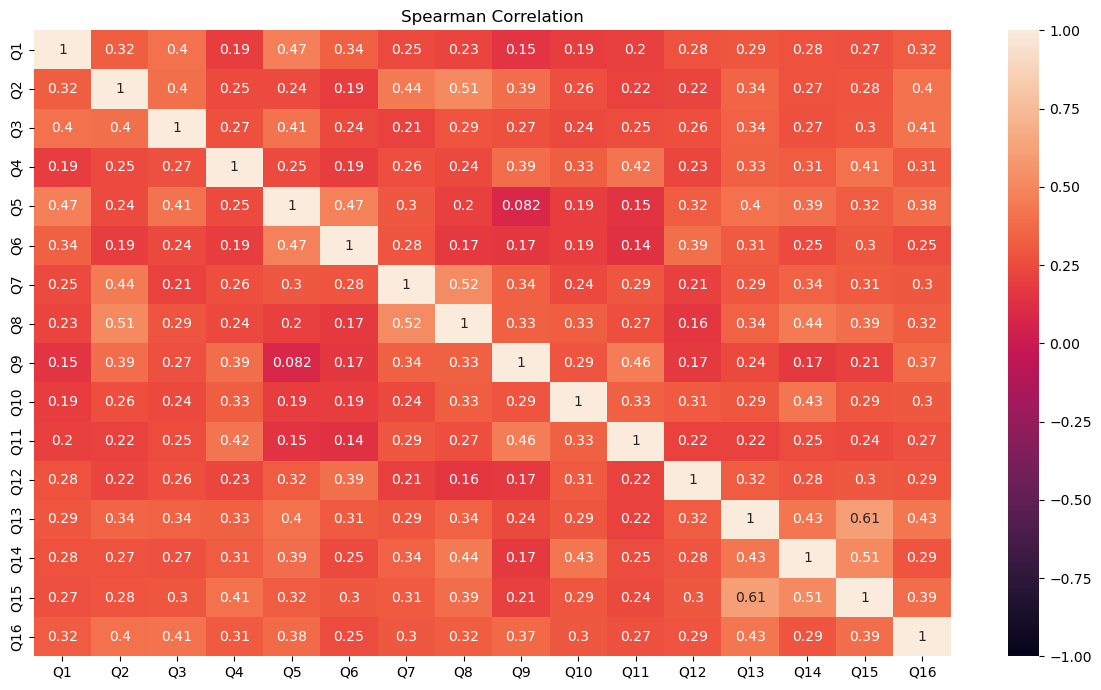

In [663]:
corr_heatmap_p(questions, second_plot = False)

#### Polychronic

## Levene test

In [347]:
from scipy.stats import levene

In [614]:
stat, p = levene(df_questionnaire.iloc[:,0], df_questionnaire.iloc[:,1], 
                 df_questionnaire.iloc[:,2], df_questionnaire.iloc[:,3],
                 df_questionnaire.iloc[:,4], df_questionnaire.iloc[:,5],
                 df_questionnaire.iloc[:,6], df_questionnaire.iloc[:,7],
                 df_questionnaire.iloc[:,8], df_questionnaire.iloc[:,9],
                 df_questionnaire.iloc[:,10], df_questionnaire.iloc[:,11],
                 df_questionnaire.iloc[:,12], df_questionnaire.iloc[:,13],
                 df_questionnaire.iloc[:,14], df_questionnaire.iloc[:,15])

In [615]:
p

7.721204530981915e-66

In [616]:
stat

24.17019747714883